status: publish
title: EXP_25: Pairwise competition
tags: competition
categories: Multispecies
# Experiment outline

## Goals/Questions: 

- Measure the competitive outcome between all species trios

## Experimental design:

- Grow each trio of species (8 choose 3) species.
- Initial total OD is 10^-4.
- Start from 3 initial compositions for each pair: (.90, .05, .05), (.05, .90, .05) & (.05, .05, .90).
- Growth conditions:
    - In Cockroach at 25c
    - Not shaken.
    - 48hrs tansfers
    - Dilution factor of 1500 each transfer
    - Plate parafilmed around edge.
- Characterize communities by measuring OD on Varioskan at the end of each transfer & by plating after transferand 5.
- Pairs + 8 species communities plated after each tansfer.

# Conclusions






# Results

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# from PlateReaderTools import PRPlate, iControlParser, VarioskanParser
from GoreUtilities import plot_heat_map
from GoreUtilities.graph import plot_ndpanel, set_pretty_defaults, array2colors
from itertools import product, combinations, permutations
from ipywidgets import interact, fixed

import pandas as pd
import pysurvey as ps
import glob
import string

set_pretty_defaults(xlabelsize=20, ylabelsize=20, fontsize=20)

In [3]:
species = [ 'Ea', 'Pa', 'Pch', 'Pci', 'Pf', 'Pp' , 'Pv', 'Sm']
clabels =  species +  [ '3sp']*4

In [4]:
def get_platereader_data(files):
    n = len(files)
    
    ods = pd.Panel(zeros((n, 8, 12)), items=arange(n)+1,
                     minor_axis=arange(12)+1, 
                     major_axis=list(string.uppercase[:8]))

    bg = .035
#     bg = 0
    for f in files:
        t = f.split('.')[-3][-1]
        od = PRPlate.from_file('tmp', f, VarioskanParser).data.squeeze() - bg
        ods.values[int(t)-1] = od
    return ods

In [5]:
files = glob.glob('../data/plate_reader/*EXP_34*.P%d.txt'%1)
ods1 = get_platereader_data(files)
files = glob.glob('../data/plate_reader/*EXP_34*.P%d.txt'%2)
ods2 = get_platereader_data(files)

ods_combined = pd.Panel4D({p:get_platereader_data(glob.glob('../data/plate_reader/*EXP_34*.P%d.txt'%p)) for p in range(1,9)})

NameError: global name 'PRPlate' is not defined

In [6]:
init_OD = 1e-4*1500
ods_combined.loc[:,0] = init_OD
ods_combined = ods_combined.sort_index(axis=1, )
ods_combined

NameError: name 'ods_combined' is not defined

## Varioskan data

### Time trajectories

Each dot represents the OD at the end of a transfer.

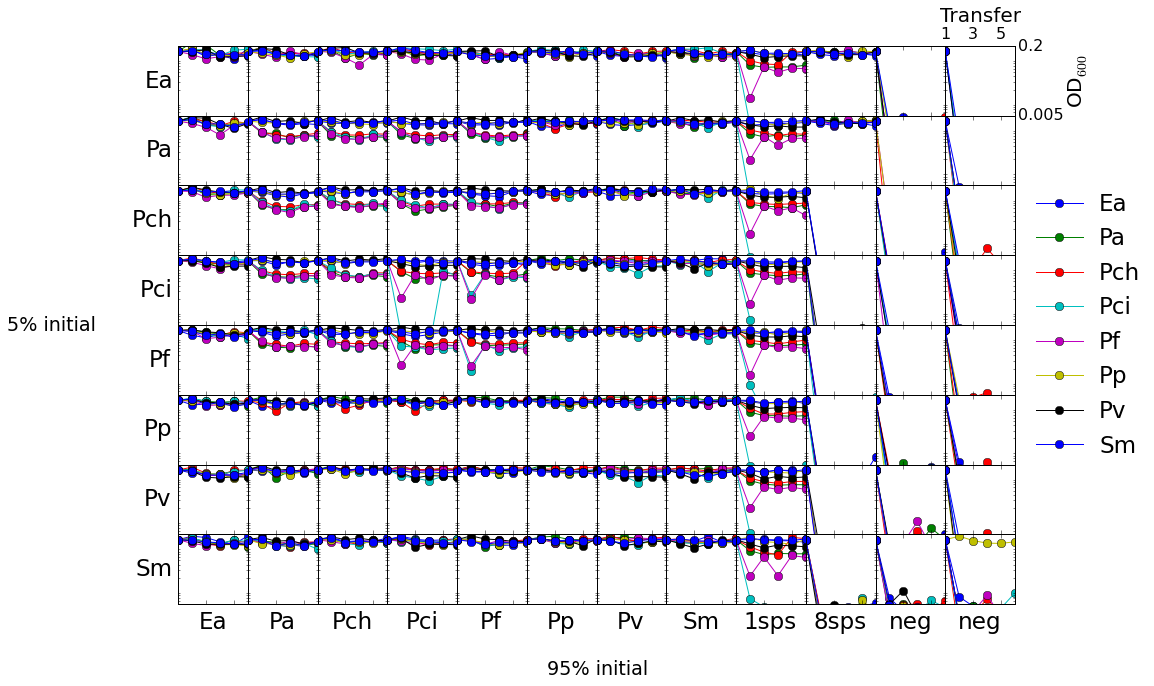

In [403]:
clabels =  species +  [ '1sps', '8sps'] + ['neg']*2
# init = ['OD .004', 'OD .0004']
# rlabels = ['$\phi$'] + list(repeat(init, 3)) + ['$\phi$']

lim = [5e-3, 0.2]
fig, ax = subplots(figsize=(15,10))
def my_plot(x, **kwargs):
    semilogy(x.T, '-o', ms=8, lw=1)
    ylim(lim)
ax_main, axs = plot_ndpanel(ods_combined, my_plot, col_labels=clabels, row_labels=species, ylim=lim)

e =.02
ax = axs[0,0]
ax = ax_main

ax.text(-.1, .5, '5% initial', fontsize='large',
        va='center', ha='right',
        transform=ax.transAxes)

ax.text(0.5, -.1, '95% initial', fontsize='large',
        va='top', ha='center',
        transform=ax.transAxes)

axs[3,-1].legend(species, numpoints=1, fontsize='x-large',
                 bbox_to_anchor = (1.01, 0), loc=6,
                 frameon=False)

xticks = array([1,3,5])-1
yticks = lim
for ax in axs.flatten():
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

ax = axs[0,-1]
xticks = array([1,3,5])-1
yticks = lim
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
ax.set_xticklabels(axs[0,-1].get_xticks()+1, fontsize='medium', visible=True)
ax.set_yticklabels(axs[0,-1].get_yticks(), fontsize='medium', visible=True)
ax.tick_params(labelright=True, labelleft=False, labeltop=True, labelbottom=False)

ax.set_ylabel('OD$_{600}$', size=20)
ax.yaxis.set_label_position('right')

ax.set_xlabel('Transfer', size=20)
ax.xaxis.set_label_position('top')

#### Pairs only

In [7]:
ods_pairs1 = pd.Panel(zeros((6,8, 8)),
                     items = arange(6),
                     minor_axis = arange(8)+1, 
                     major_axis = list(string.uppercase[:8]))

ods_pairs2 = ods_pairs1.copy()

for t in arange(6):
    for s in arange(8):
        vals = ods_combined.iloc[s,t,s,:8].values
        ods_pairs1.iloc[t,:,s] = vals
        
        vals = ods_combined.iloc[s,t,:8, s].values
        ods_pairs2.iloc[t,:,s] = vals
ods_pairs = pd.Panel4D({1: ods_pairs1, 2: ods_pairs2})

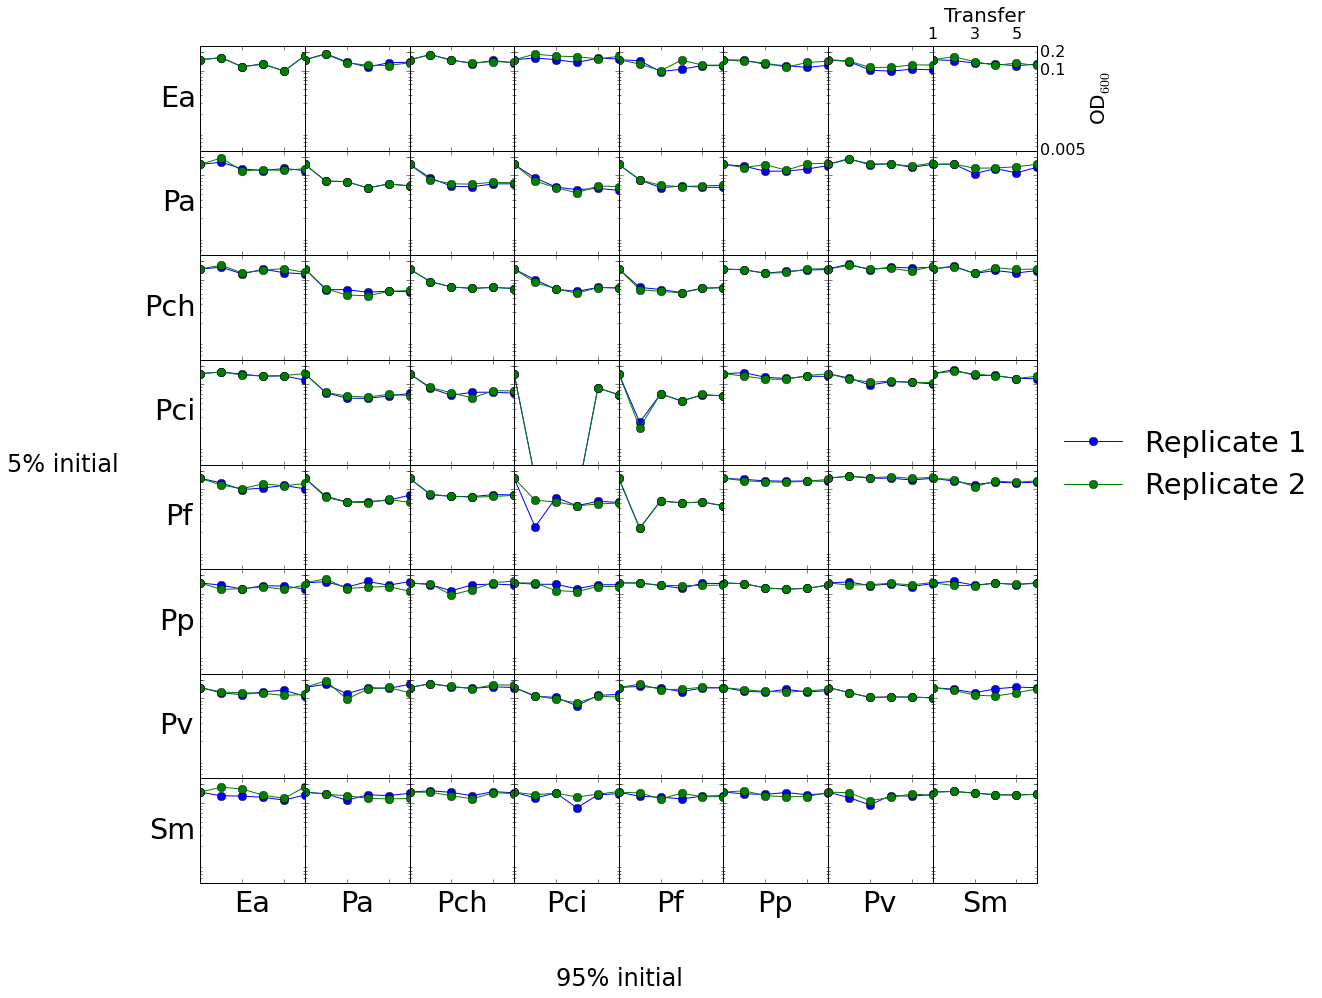

In [9]:
lim = [1e-2, 0.25]
fig, ax = subplots(figsize=(15,15))
def my_plot(x, **kwargs):
    semilogy(x.T, '-o', ms=8, lw=1)
#     ylim(lim)
ax_main, axs = plot_ndpanel(ods_pairs, my_plot, col_labels=species, row_labels=species, ylim=lim)

e =.02
ax = axs[0,0]
ax = ax_main

ax.text(-.1, .5, '5% initial', fontsize='large',
        va='center', ha='right',
        transform=ax.transAxes)

ax.text(0.5, -.1, '95% initial', fontsize='large',
        va='top', ha='center',
        transform=ax.transAxes)

axs[3,-1].legend(['Replicate 1','Replicate 2'], numpoints=1, fontsize='x-large',
                 bbox_to_anchor = (1.01, 0), loc=6,
                 frameon=False)

xticks = array([1,3,5])-1
yticks = [5e-3, .1, 0.2]
for ax in axs.flatten():
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

ax = axs[0,-1]
xticks = array([1,3,5])-1
yticks = [5e-3, .1, 0.2]
ax.set_xticks(xticks)
ax.set_yticks(yticks)  
ax.set_xticklabels(axs[0,-1].get_xticks()+1, fontsize='medium', visible=True)
ax.set_yticklabels(axs[0,-1].get_yticks(), fontsize='medium', visible=True)
ax.tick_params(labelright=True, labelleft=False, labeltop=True, labelbottom=False)

ax.set_ylabel('OD$_{600}$', size=20)
ax.yaxis.set_label_position('right')

ax.set_xlabel('Transfer', size=20)
ax.xaxis.set_label_position('top')

#### Single species

In [8]:
ods_singles = ods_combined.iloc[:,:,:,8]
ods_singles.items = species
ods_singles.loc['Pch', 4, ['A','H']] = nan
ods_singles.loc['Pch', 5, ['A','H']] = nan

ods_singles.to_pickle('2015-05-21.EXP_34-Trio_competition/ODs_single_species.pick')

In [9]:
ods_singles.loc['Pch']

A        B        C        D        E        F        G        H
0  0.15000  0.15000  0.15000  0.15000  0.15000  0.15000  0.15000  0.15000
1  0.09220  0.09394  0.08170  0.09363  0.08896  0.09761  0.09721  0.10269
2  0.07745  0.08090  0.07604  0.08242  0.08132  0.07233  0.08075  0.07785
3  0.07463  0.06993  0.07305  0.07647  0.07344  0.07212  0.07383  0.06678
4      NaN  0.07759  0.07633  0.08361  0.08182  0.07869  0.08143      NaN
5      NaN  0.07488  0.07866  0.08190  0.08970  0.08225  0.08185      NaN

(0.001, 0.2)

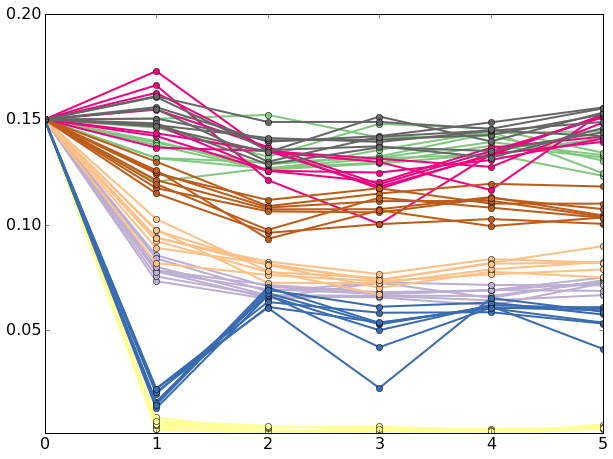

In [10]:
species_colors = array2colors(arange(8), cmap=cm.Accent)
fig, ax = subplots(figsize=(10,7.5))
for i in range(8):
    ods_singles.iloc[i,:,:].plot(legend=False, ax=ax, color=species_colors[i], lw=2, marker='o')
# ax.set_yscale('log')
ax.set_ylim(1e-3,.2)

/host/home/yonatanf/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


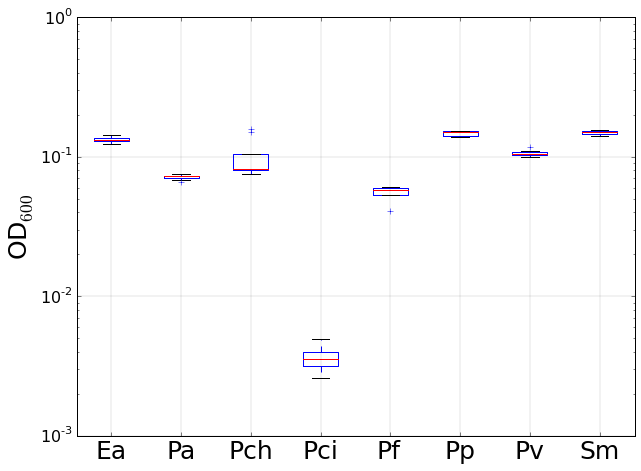

In [11]:
fig, ax = subplots(figsize=(10,7.5))

out = ods_combined.iloc[:,-1,:,8].boxplot(ax=ax)


fs = 25
ax.set_xticklabels(species, fontsize=fs);
ax.set_ylim(1e-3, 1)
ax.set_ylabel('OD$_{600}$', fontsize=fs);
ax.grid(ls='-', lw=.1)

ax.set_yscale('log')

/host/home/yonatanf/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


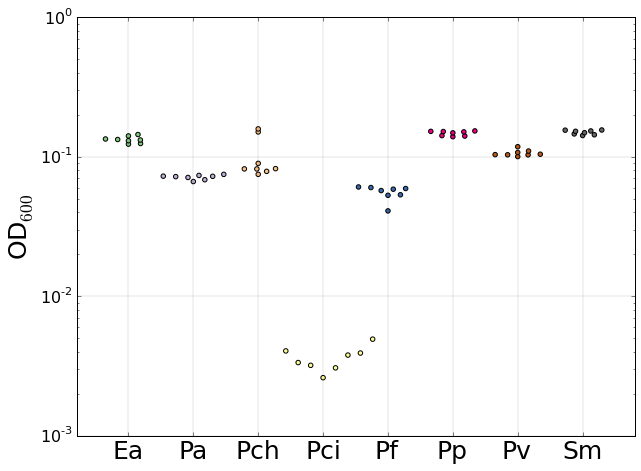

In [12]:
from beeswarm import beeswarm
species_colors = array2colors(arange(8), cmap=cm.Accent)
fig, ax = subplots(figsize=(10,7.5))
bs, ax = beeswarm(ods_combined.iloc[:,-1,:,8].T.values, ax=ax, col=species_colors, s=10**2)
ax.set_yscale('log')
ax.set_xticklabels(species, fontsize=fs);
ax.set_ylim(1e-3, 1)
ax.set_ylabel('OD$_{600}$', fontsize=fs);
ax.grid(ls='-', lw=.1)

## Count data

### Initial Densities

In [13]:
counts0 = pd.Series([174, 169, 271, 231, 94, 172, 214, 331], index=species)
fracs0 = 1.*counts0/counts0.sum()

### Last time point

In [14]:
xls = pd.ExcelFile('../data/colony_counts/2015-05-21_EXP34_counts.xlsx')

plates = arange(1,9)
t = 5
last_counts_d = {}
for p in plates:
    tmp = xls.parse('T%d_P%d'%(t,p), index_col=None, na_values=['na'], parse_cols=9).fillna(0)
    ind = tmp.applymap(lambda x:x=='na')
    tmp[ind] = nan
    row, col = zip( *[(ind[0], int(ind[1:])) for ind in tmp.index] )
    tmp['Row'] = row
    tmp['Col'] = col
    last_counts_d[p] = tmp.set_index(['Row','Col']).to_panel().transpose(1,2,0)
#     pair_counts_tmp[p] = pd.Panel4D(tmp_d).swapaxes(1,2).swapaxes(2,3).iloc[:,:,:9]
last_counts = pd.Panel4D(last_counts_d)
last_counts

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 8 (labels) x 8 (items) x 9 (major_axis) x 8 (minor_axis)
Labels axis: 1 to 8
Items axis: A to H
Major_axis axis: 1 to 10
Minor_axis axis: Ea to Sm

In [15]:
def norm_fun(x):
    if x.sum()==0:
        return 0*x
    else:
        return 1.*x/x.sum()

In [16]:
last_fracs = last_counts.apply(norm_fun, axis=3, )

In [17]:
## add error estimates
def dir_std(a):
    a0 = a.sum()
    dir_var = a*(a0-a)/a0**2/(a0+1)
    return dir_var**0.5

last_fracs_std = last_counts.apply(dir_std, axis=3)

110.0 90.0 75.0 97.5217391304 35.442690502 33.0


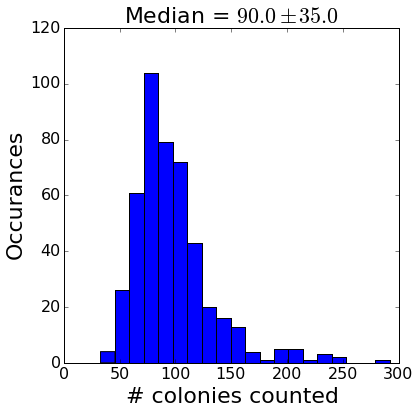

In [19]:
fig, ax = subplots(figsize=(6,6))
tot_counts = last_counts.sum(axis=3).to_frame().values
pos_tot = tot_counts[tot_counts>0]
med = median(pos_tot)
q75, q50, q25 = percentile(pos_tot, [75 ,50, 25])
iqr = q75 - q25

ax.hist(pos_tot, bins=20)
ax.set_title('Median = $%.1f \pm%.1f$'%(q50,iqr), size=22)
ax.set_xlabel('# colonies counted', size=22)
ax.set_ylabel('Occurances', size=22)

print q75, q50, q25, pos_tot.mean(), pos_tot.std(), pos_tot.min()

### 8 species time series

In [22]:
xls = pd.ExcelFile('../data/colony_counts/2015-05-21_EXP34_counts.xlsx')

times = arange(2,6)
rows = ['A','B','C','D','E','F','G','H']
multi_counts = pd.Panel4D(labels=[1,2], items=times, major_axis=arange(1,9), minor_axis=species)
for p in [1,2]:    
    for t in times[:-1]:
        tmp = xls.parse('T%d_P%d'%(t,p), index_col=None, na_values=['na'], parse_cols=9).fillna(0)
        ind = tmp.applymap(lambda x:x=='na')
        tmp[ind] = nan
        if p==1:
            r1 = [r+'9' for r in rows[::2]]
            multi_counts.loc[1,t,1:4] = tmp.ix[r1].values
            
            r2 = [r+'9' for r in rows[1::2]]
            multi_counts.loc[2,t,1:4] = tmp.ix[r2].values
            
        if p==2:
            r1 = [r+'9' for r in rows[::2]]
            multi_counts.loc[1,t,5:8] = tmp.ix[r1].values
            
            r2 = [r+'9' for r in rows[1::2]]
            multi_counts.loc[2,t,5:8] = tmp.ix[r2].values
            
multi_counts

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 2 (labels) x 4 (items) x 8 (major_axis) x 8 (minor_axis)
Labels axis: 1 to 2
Items axis: 2 to 5
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm

In [23]:
## add last time point
for p in last_counts.labels:
    multi_counts.loc[1,5,p] = last_counts.loc[p,'A',10].values
    multi_counts.loc[2,5,p] = last_counts.loc[p,'B',10].values
    

In [24]:
multi_fracs = multi_counts.apply(norm_fun, axis=3, )
multi_fracs_std = multi_fracs.apply(dir_std, axis=3)

In [27]:
## add first time point
multi0 = pd.concat([fracs0]*8, axis=1).T  * (ones((8,8))+diag([65/5.-1]*8) )
multi_fracs.loc[1,0] = multi0.apply(norm_fun, axis=1).values
multi_fracs.loc[2,0] = multi0.apply(norm_fun, axis=1).values
multi_fracs = multi_fracs.sort_index(axis=1)

/host/home/yonatanf/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


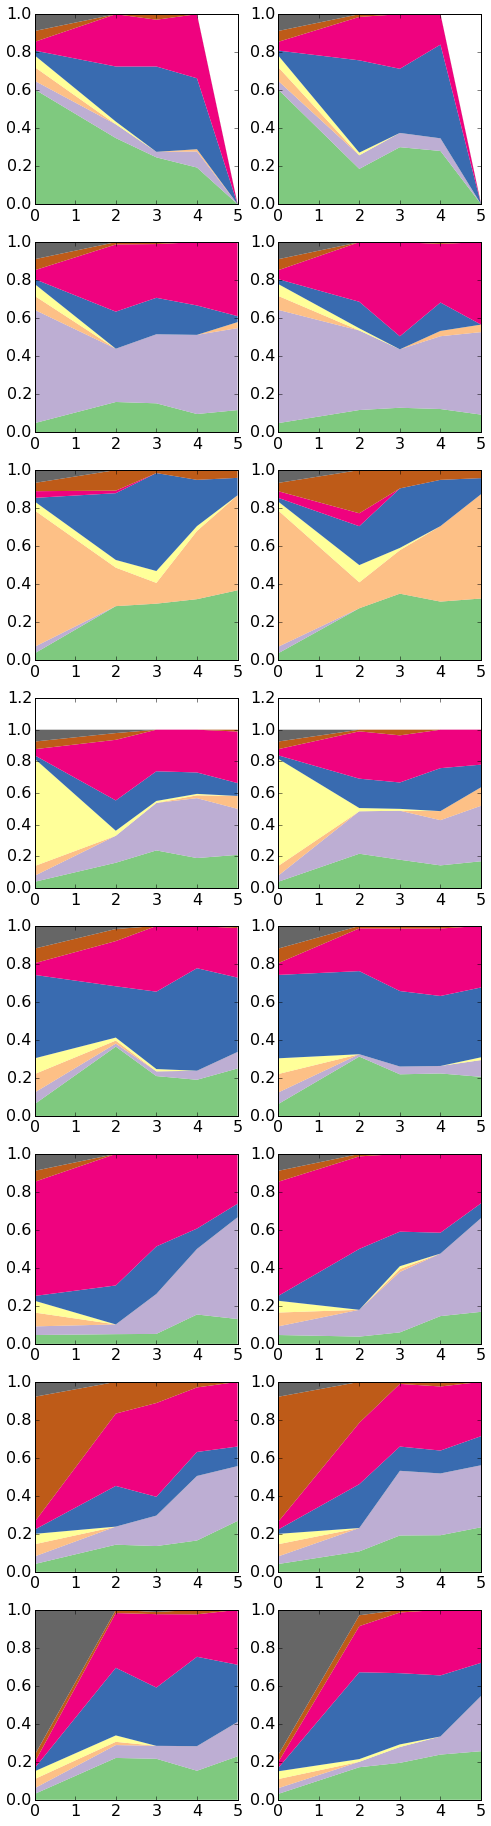

In [21]:
rows = multi_fracs.major_axis
n = len(rows) 
fig, axs = subplots(n,2, figsize=(2*4,n*4))
for r in range(n):
    for i in range(2):
        (multi_fracs.iloc[i,:,r]).T.plot(kind='area',
                    lw=.01, ax=axs[r,i], colormap=cm.Accent,
                    legend=False)

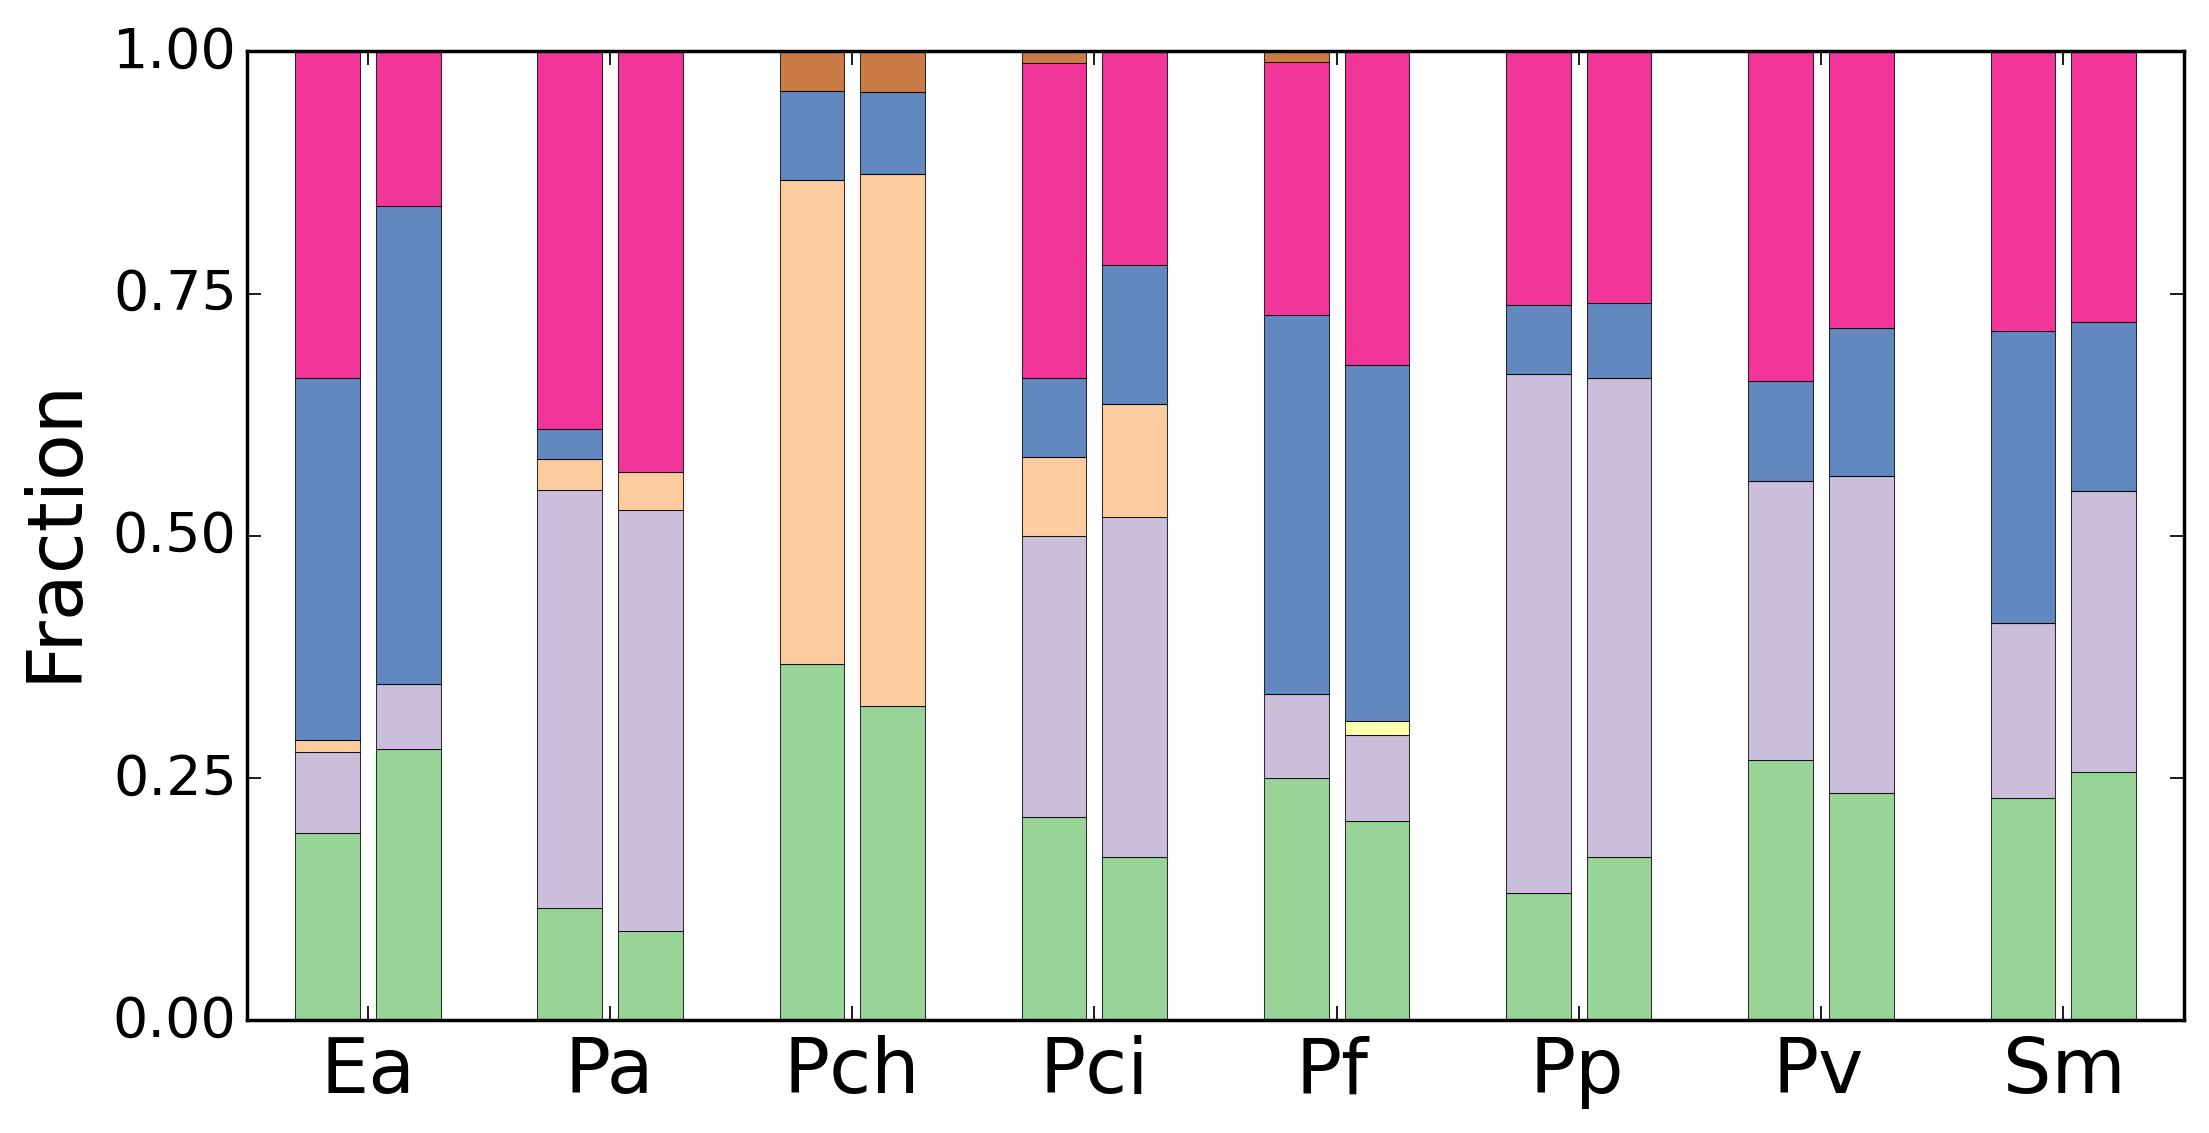

In [23]:
from pysurvey.plotting.Bars import multibar

cmap = cm.Accent
n = 8
space = 3

fig, ax = subplots(figsize=(10,5))
bars_1 = multibar(arange(n)*space, multi_fracs.iloc[0,-1], cmap=cmap, ax=ax)
bars_2 = multibar(space/3.+arange(n)*space, multi_fracs.iloc[1,-1], cmap=cmap, ax=ax)

ax.set_xlim(-1,(n-1)*space+space/3.+1)
xtcks = ax.set_xticks(arange(n)*space+space/6.)
xtcklbls = ax.set_xticklabels(species, size=22)

ax.set_yticks([0,0.25,.5, .75, 1])
ax.set_ylabel('Fraction', size=22)

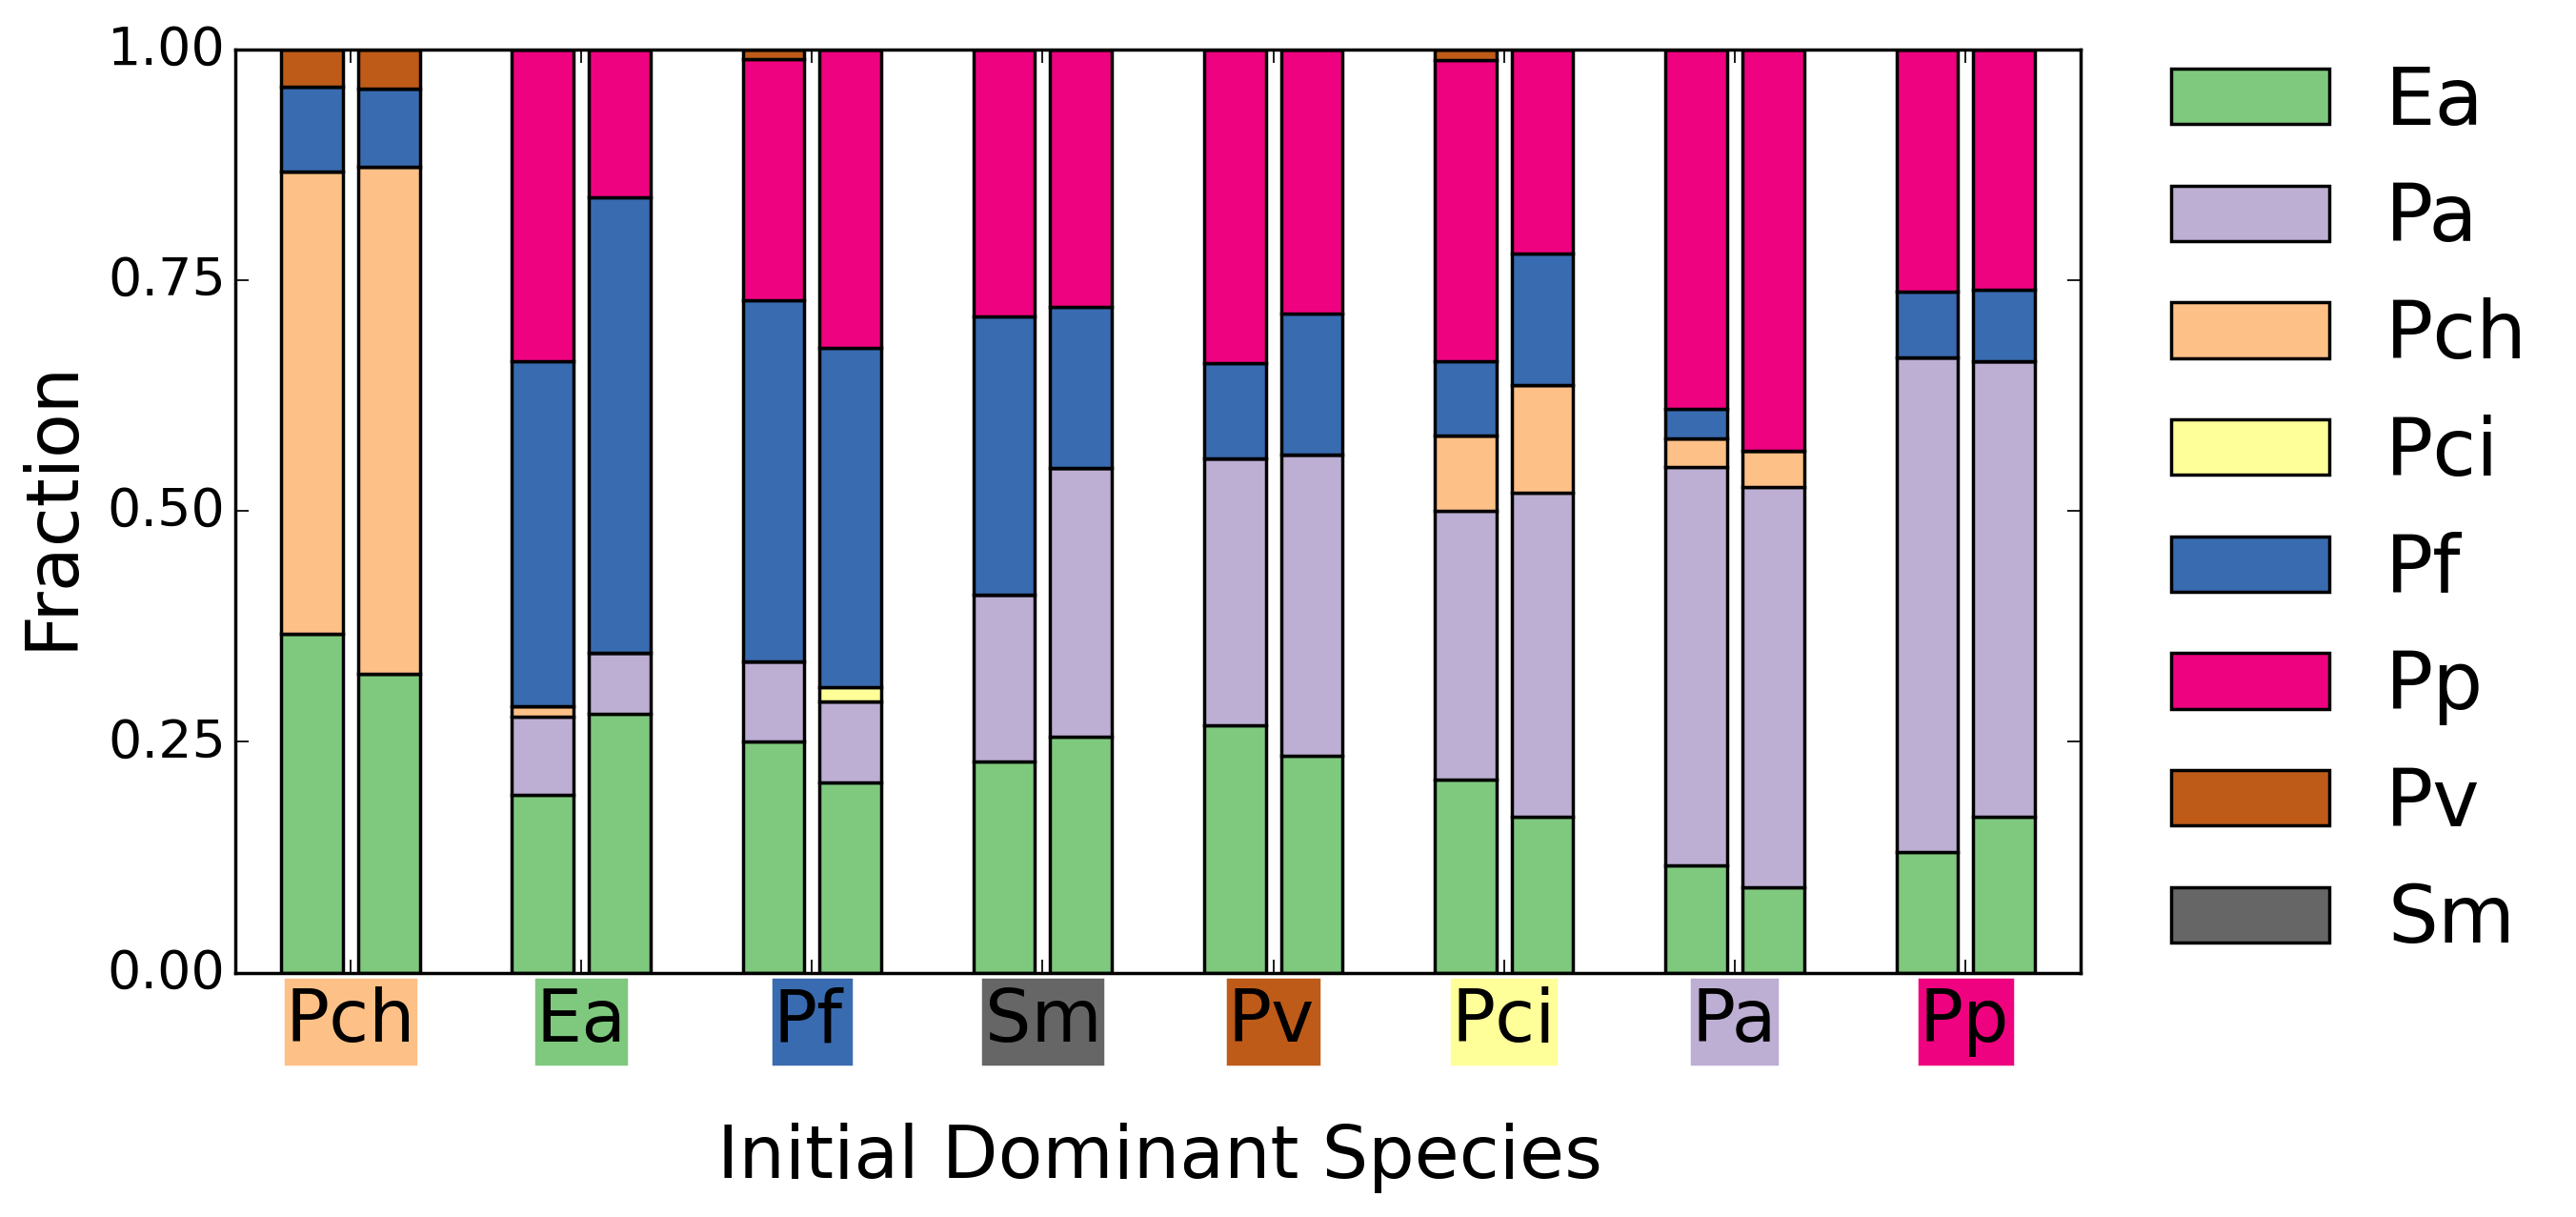

In [24]:
rc("savefig", dpi=250)
cmap = cm.Accent

species_colors_d = {species[i]:species_colors[i] for i in range(8) }

n = 8
space = 3

to_plot1 = multi_fracs.iloc[0,-1]
to_plot1.iloc[0,:] = multi_fracs.iloc[0,-2].iloc[0,:]
to_plot1.sort(['Pa'], inplace=True)

to_plot2 = multi_fracs.iloc[1,-1]
to_plot2.iloc[0,:] = multi_fracs.iloc[1,-2].iloc[0,:]
to_plot2 = to_plot2.reindex_like(to_plot1)

fig, ax = subplots(figsize=(10,5))
bars_1 = multibar(arange(n)*space, to_plot1, cmap=cmap, ax=ax, alpha=1, lw=1)
bars_2 = multibar(space/3.+arange(n)*space, to_plot2, cmap=cmap, ax=ax, alpha=1, lw=1)

ax.set_xlim(-1,(n-1)*space+space/3.+1)
xtcks = ax.set_xticks(arange(n)*space+space/6.)
xlbls = [species[i-1] for i in to_plot1.index]
xtcklbls = ax.set_xticklabels(xlbls, size=22)

for xtck in xtcklbls:
    xtck.set_backgroundcolor(species_colors_d[xtck.get_text()])
    

ax.set_yticks([0,0.25,.5, .75, 1])
ax.set_ylabel('Fraction', size=22)

xlbl = ax.set_xlabel('Initial Dominant Species', size=22, labelpad=20)

ax.legend(species, loc=6, bbox_to_anchor=(1.01,0.5), frameon=False)

### Pairs

In [18]:
xls = pd.ExcelFile('../data/colony_counts/2015-05-21_EXP34_counts.xlsx')

pair_counts_tmp = {}
for p in [1,2]:
    sheets = [s for s in filter(lambda s:s[-1]==str(p), xls.sheet_names)]
#     times = [int(s[1]) for s in sheets]
    times = arange(1,5)
    tmp_d = {}
    for t in times:
        tmp = xls.parse('T%d_P%d'%(t,p), index_col=None, na_values=['na'], parse_cols=9).fillna(0)
        ind = tmp.applymap(lambda x:x=='na')
        tmp[ind] = nan
        row, col = zip( *[(ind[0
                               ], int(ind[1:])) for ind in tmp.index] )
        tmp['Row'] = row
        tmp['Col'] = col
        tmp_d[t] = tmp.set_index(['Row','Col']).to_panel()
    pair_counts_tmp[p] = pd.Panel4D(tmp_d).swapaxes(1,2).swapaxes(2,3).iloc[:,:,:8]
pair_counts_tmp

{1: <class 'pandas.core.panelnd.Panel4D'>
 Dimensions: 4 (labels) x 8 (items) x 8 (major_axis) x 8 (minor_axis)
 Labels axis: 1 to 4
 Items axis: A to H
 Major_axis axis: 1 to 8
 Minor_axis axis: Ea to Sm, 2: <class 'pandas.core.panelnd.Panel4D'>
 Dimensions: 4 (labels) x 8 (items) x 8 (major_axis) x 8 (minor_axis)
 Labels axis: 1 to 4
 Items axis: A to H
 Major_axis axis: 1 to 8
 Minor_axis axis: Ea to Sm}

In [19]:
## rearange pairs
from copy import deepcopy
pair_counts = deepcopy(pair_counts_tmp)
for i in range(8):
    p,r = divmod(i,4)
    vals1 = pair_counts_tmp[p+1].iloc[:,r*2,:,:].values
    vals2 = pair_counts_tmp[p+1].iloc[:,r*2+1,:,:].values
    pair_counts[1].iloc[:,:,i,:] = vals1
    pair_counts[2].iloc[:,:,i,:] = vals2
pair_counts

{1: <class 'pandas.core.panelnd.Panel4D'>
 Dimensions: 4 (labels) x 8 (items) x 8 (major_axis) x 8 (minor_axis)
 Labels axis: 1 to 4
 Items axis: A to H
 Major_axis axis: 1 to 8
 Minor_axis axis: Ea to Sm, 2: <class 'pandas.core.panelnd.Panel4D'>
 Dimensions: 4 (labels) x 8 (items) x 8 (major_axis) x 8 (minor_axis)
 Labels axis: 1 to 4
 Items axis: A to H
 Major_axis axis: 1 to 8
 Minor_axis axis: Ea to Sm}

In [20]:
## add last time point
rows = ['A','B','C','D','E','F','G','H']

for p in last_counts.labels:
    row = rows[p-1]
    pair_counts[1].loc[5, :8, p] = last_counts.loc[p, row,:8].values
    pair_counts[2].loc[5, :, p] = last_counts.loc[p, :, p].values.T

In [21]:
def norm_fun(x):
    if x.sum()==0:
        return 0*x
    else:
        return 1.*x/x.sum()

pair_fracs = {p:c.apply(norm_fun, axis=3, ) for p,c in pair_counts.iteritems()}

In [22]:
## add first time point
def add_first(data, data0, kind):
    pairs0 = 0*data[1].iloc[0].copy()
    n = len(species)
    for i in range(n):
        for j in range(n):
            s1 = species[i]
            s2 = species[j]
            t = data0.copy()
            t[~t.index.isin([s1,s2])] = 0
            t[s1]*= .95
            t[s2]*= .05
            pairs0.iloc[j,i] = t.values
    if kind is 'fracs':
        data[1].loc[0] = pairs0.apply(norm_fun, axis=2).values
        data[2].loc[0] = pairs0.apply(norm_fun, axis=2).values
    elif kind is 'counts':
        data[1].loc[0] = pairs0.apply(lambda x: x.round()).values
        data[2].loc[0] = pairs0.apply(lambda x: x.round()).values
    data[1] = data[1].sort_index(axis=0)
    data[2] = data[2].sort_index(axis=0)
    return data

pair_counts = add_first(pair_counts, counts0, 'counts')
pair_fracs = add_first(pair_fracs, fracs0, 'fracs')

In [33]:
## set samples with no counts to nans
def mask_zeros(data):
    s = data.apply(lambda x:x.sum(), axis=3)
    ss = pd.Panel4D({sp:s for sp in data.minor_axis}).transpose(1,2,3,0)
    return data.where(ss>.99)

for p in [1,2]:
    pair_counts[p] = mask_zeros(pair_counts[p])
    pair_fracs[p] = mask_zeros(pair_fracs[p])

NotImplementedError: 

In [23]:
## add error estimates
def dir_std(a):
    a0 = a.sum()
    dir_var = a*(a0-a)/a0**2/(a0+1)
    return dir_var**0.5

pair_fracs_std = {p:c.apply(dir_std, axis=3, ) for p,c in pair_counts.iteritems()}

#### time series

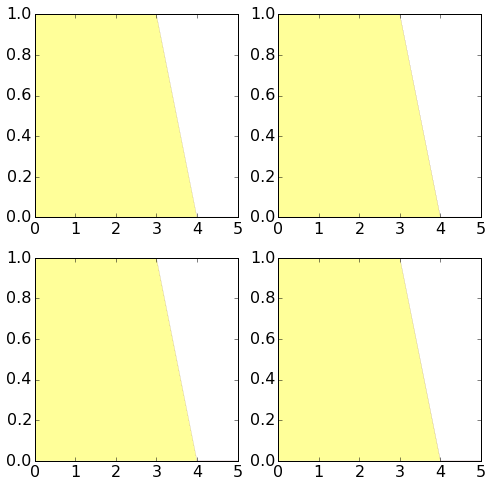

In [28]:
@interact(r=(0,7), c=(0,7))
def plot_species(r, c, ):
    fig, axs = subplots(2,2, figsize=(2*4,2*4))
    (pair_fracs[1].iloc[:,r,c]).T.plot(kind='area',
                lw=.01, ax=axs[0,0], colormap=cm.Accent,
                legend=False)
    (pair_fracs[1].iloc[:,c,r]).T.plot(kind='area',
                lw=.01, ax=axs[0,1], colormap=cm.Accent,
                legend=False)
    
    (pair_fracs[2].iloc[:,r,c]).T.plot(kind='area',
                lw=.01, ax=axs[1,0], colormap=cm.Accent,
                legend=False)
    (pair_fracs[2].iloc[:,c,r]).T.plot(kind='area',
                lw=.01, ax=axs[1,1], colormap=cm.Accent,
                legend=False)
#     axs[1,1].legend()

In [29]:
def line_plot(df, ax, cmap=cm.Accent, **kwargs):
    n_lines = df.shape[0]
    cs = array2colors(arange(n_lines), cmap=cmap)
    ax.set_color_cycle(cs)
    out = ax.plot(df.T, lw=3, marker='o', ms=10)
    return out

def errorbar_plot(df, er, ax, cmap=cm.Accent, **kwargs):
    n_lines = df.shape[0]
    cs = array2colors(arange(n_lines), cmap=cmap)
    
    kwargs.setdefault('lw',3)
    kwargs.setdefault('marker','o')
    kwargs.setdefault('ms',10)
    kwargs.setdefault('lw',3)
    kwargs.setdefault('ls','-')
    for i,(sp,y) in enumerate(df.iterrows()):
        x = asarray(y.index)
        yerr = er.ix[sp]
        out = ax.errorbar(x,y, yerr=yerr, color=cs[i], ecolor=cs[i], 
#                          lw=3, marker='o', ms=10, 
                         label=sp,
                         **kwargs)
    return out


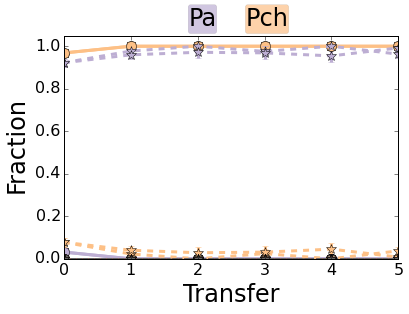

In [32]:
species_colors = array2colors(arange(8), cmap=cm.Accent)


# @interact(s1=(0,7), s2=(0,7))
def plot_species(s1, s2, ):
    fig, ax = subplots()
    f = pair_fracs[1].iloc[:,s1,s2]
    er = pair_fracs_std[1].iloc[:,s1,s2]
    out = errorbar_plot(f, er, ax)

    f = pair_fracs[2].iloc[:,s1,s2]
    er = pair_fracs_std[2].iloc[:,s1,s2]
    out = errorbar_plot(f, er, ax)

    f = pair_fracs[1].iloc[:,s2,s1]
    er = pair_fracs_std[1].iloc[:,s2,s1]
    out = errorbar_plot(f, er, ax, ls='--', marker='*')

    f = pair_fracs[2].iloc[:,s2,s1]
    er = pair_fracs_std[2].iloc[:,s2,s1]
    out = errorbar_plot(f, er, ax, ls='--', marker='*')
    
    ax.set_ylim(0,1.05)
    ax.set_xlabel('Transfer' , size=24)
    ax.set_ylabel('Fraction' , size=24)
    
    ## add title
    ax.text(.45, 1.02, species[s1], size=24, 
            ha='right', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s1], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )
    ax.text(.55, 1.02, species[s2], size=24, 
            ha='left', va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor=species_colors[s2], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
            )
    
s1,s2 = 1,2
plot_species(s1, s2, )

/host/home/yonatanf/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


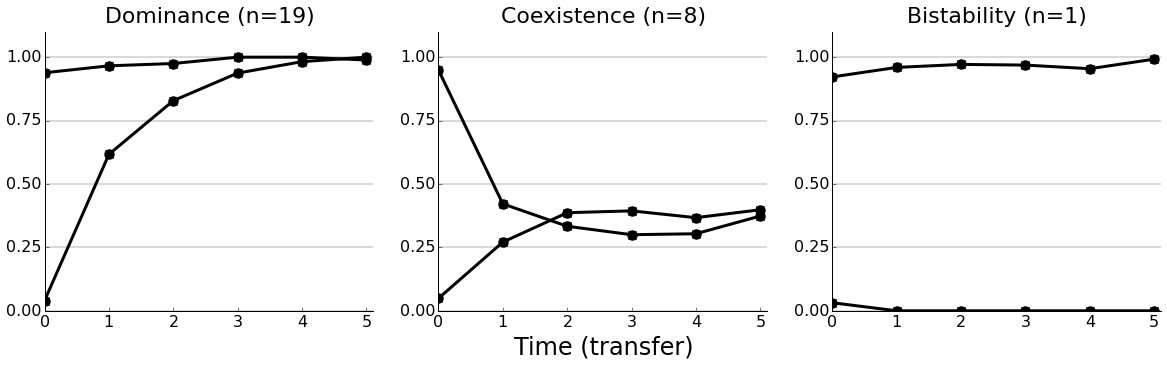

In [26]:
pairs = ((5,6),(1,5),(1,2))
titles = ('Dominance (n=19)', 'Coexistence (n=8)', 'Bistability (n=1)')
fig, axs = subplots(1,3, figsize=(20,5))
for i in range(3):
    ax = axs[i]
    s1,s2 = pairs[i]
    c = (pair_counts[2].iloc[:,s1,s2,[s1]] + pair_counts[1].iloc[:,s1,s2,[s1]])/2
    f = (pair_fracs[2].iloc[:,s1,s2,[s1]] + pair_fracs[1].iloc[:,s1,s2,[s1]])/2
    er = dir_std(c)
    out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)
    
    c = pair_counts[2].iloc[:,s2,s1,[s1]]
    f = pair_fracs[2].iloc[:,s2,s1,[s1]]
    er = dir_std(c)
    out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)
    
    ax.set_title(titles[i], size=22, va='bottom')

xlbl = axs[1].set_xlabel('Time (transfer)', size=24, va='top')
for ax in axs:
#     if not ax.is_first_col():
#         ax.set_yticks([])
#     else:
    ax.set_yticks([0, .25, .5, .75, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylim(0, 1.1)
    ax.set_xlim(0, 5.1)
    ax.grid(axis='y', ls='-', lw=.3)

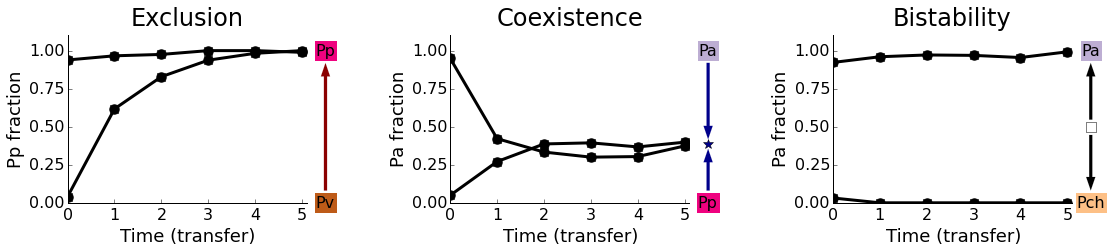

In [155]:
pairs = ((5,6),(1,5),(1,2))
i = 0

titles = ('Exclusion', 'Coexistence', 'Bistability')
fig, axs = subplots(1,3, figsize=(18,3))

for i,ax in enumerate(axs):
    pair = pairs[i]
    s1,s2 = pair
    c = (pair_counts[2].iloc[:,s1,s2,[s1]] + pair_counts[1].iloc[:,s1,s2,[s1]])/2
    f = (pair_fracs[2].iloc[:,s1,s2,[s1]] + pair_fracs[1].iloc[:,s1,s2,[s1]])/2
    f1 = f.iloc[0,-1]
    er = dir_std(c)
    out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)

    c = pair_counts[2].iloc[:,s2,s1,[s1]]
    f = pair_fracs[2].iloc[:,s2,s1,[s1]]
    f2 = f.iloc[0,-1]
    er = dir_std(c)
    out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)

    ax.set_title(titles[i], size='large', va='bottom')

    xlbl = ax.set_xlabel('Time (transfer)', size=18, va='top')
    ylbl = ax.set_ylabel('%s fraction'%species[s1], size=18)


    ax.set_yticks([0, .25, .5, .75, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylim(0, 1.1)
    ax.set_xlim(0, 5.1)

    if i==0:
        arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
                'length_includes_head': True, 'ec':'w', 'linewidth':.1,
                'color':'DarkRed'}

        origin = {'x':5.5, 'y':0.08}
        target = {'x':5.5, 'y':.92}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)
    
    elif i==1:
        arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
            'length_includes_head': True, 'ec':'w', 'linewidth':.1,
            'color':'DarkBlue'}
        
        f_avg = (f1+f2)/2
        origin = {'x':5.5, 'y':0.08}
        target = {'x':5.5, 'y':f_avg-.03}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        origin = {'x':5.5, 'y':0.92}
        target = {'x':5.5, 'y':f_avg+.03}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        ax.plot(5.5, f_avg, '*', ms=10, c='DarkBlue', clip_on=False)
    else:
        arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
            'length_includes_head': True, 'ec':'w', 'linewidth':.1,
            'color':'k'}

        f_avg = (f1+f2)/2
        target = {'x':5.5, 'y':0.08}
        origin = {'x':5.5, 'y':f_avg-.05}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        target = {'x':5.5, 'y':0.92}
        origin = {'x':5.5, 'y':f_avg+.05}
        ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
                 clip_on=False, **arrow_opt)

        ax.plot(5.5, f_avg, 'ks', ms=10, c='w', clip_on=False)

    ax.text(5.5, 1.0, species[s1], size=16,
            ha='center', va='center', backgroundcolor=species_colors[s1])
    ax.text(5.5, .0, species[s2], size=16,
            ha='center', va='center', backgroundcolor=species_colors[s2])
    
subplots_adjust(wspace=.6)

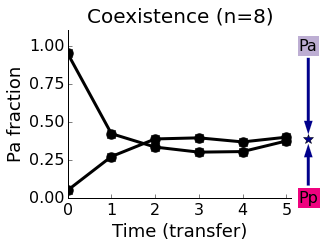

In [136]:
pairs = ((5,6),(1,5),(1,2))
i = 1
pair = pairs[i]
titles = ('Exclusion (n=19)', 'Coexistence (n=8)', 'Bistability (n=1)')
fig, ax = subplots(1,1, figsize=(4,3))

s1,s2 = pair
c = (pair_counts[2].iloc[:,s1,s2,[s1]] + pair_counts[1].iloc[:,s1,s2,[s1]])/2
f = (pair_fracs[2].iloc[:,s1,s2,[s1]] + pair_fracs[1].iloc[:,s1,s2,[s1]])/2
f1 = f.iloc[0,-1]
er = dir_std(c)
out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)

c = pair_counts[2].iloc[:,s2,s1,[s1]]
f = pair_fracs[2].iloc[:,s2,s1,[s1]]
f2 = f.iloc[0,-1]
er = dir_std(c)
out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)

ax.set_title(titles[i], size='medium', va='bottom')

xlbl = ax.set_xlabel('Time (transfer)', size=18, va='top')
ylbl = ax.set_ylabel('%s fraction'%species[s1], size=18)

ax.set_yticks([0, .25, .5, .75, 1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 5.1)

arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
        'length_includes_head': True, 'ec':'w', 'linewidth':.1,
        'color':'DarkBlue'}

f_avg = (f1+f2)/2
origin = {'x':5.5, 'y':0.08}
target = {'x':5.5, 'y':f_avg-.03}
ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
         clip_on=False, **arrow_opt)

origin = {'x':5.5, 'y':0.92}
target = {'x':5.5, 'y':f_avg+.03}
ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
         clip_on=False, **arrow_opt)

ax.plot(5.5, f_avg, '*', ms=10, c='DarkBlue', clip_on=False)

ax.text(5.5, 1.0, species[s1], size=16,
        ha='center', va='center', backgroundcolor=species_colors[s1])
ax.text(5.5, .0, species[s2], size=16,
        ha='center', va='center', backgroundcolor=species_colors[s2])

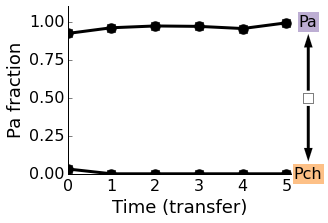

In [33]:
pairs = ((5,6),(1,5),(1,2))
i = 2
pair = pairs[i]
titles = ('Exclusion (n=19)', 'Coexistence (n=8)', 'Bistability (n=1)')
fig, ax = subplots(1,1, figsize=(4,3))

s1,s2 = pair
c = (pair_counts[2].iloc[:,s1,s2,[s1]] + pair_counts[1].iloc[:,s1,s2,[s1]])/2
f = (pair_fracs[2].iloc[:,s1,s2,[s1]] + pair_fracs[1].iloc[:,s1,s2,[s1]])/2
f1 = f.iloc[0,-1]
er = dir_std(c)
out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)

c = pair_counts[2].iloc[:,s2,s1,[s1]]
f = pair_fracs[2].iloc[:,s2,s1,[s1]]
f2 = f.iloc[0,-1]
er = dir_std(c)
out = errorbar_plot(f, er, ax, cmap=cm.Greys_r)

# ax.set_title(titles[i], size='medium', va='bottom')

xlbl = ax.set_xlabel('Time (transfer)', size=18, va='top')
ylbl = ax.set_ylabel('%s fraction'%species[s1], size=18)

ax.set_yticks([0, .25, .5, .75, 1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 5.1)

arrow_opt = {'head_width': 0.2, 'head_length': 0.09, 'width': 0.07,
        'length_includes_head': True, 'ec':'w', 'linewidth':.1,
        'color':'k'}

f_avg = (f1+f2)/2
target = {'x':5.5, 'y':0.08}
origin = {'x':5.5, 'y':f_avg-.05}
ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
         clip_on=False, **arrow_opt)

target = {'x':5.5, 'y':0.92}
origin = {'x':5.5, 'y':f_avg+.05}
ax.arrow(origin['x'], origin['y'], target['x']-origin['x'], target['y']-origin['y'], 
         clip_on=False, **arrow_opt)

ax.plot(5.5, f_avg, 'ks', ms=10, c='w', clip_on=False)

ax.text(5.5, 1.0, species[s1], size=16,
        ha='center', va='center', backgroundcolor=species_colors[s1])
ax.text(5.5, .0, species[s2], size=16,
        ha='center', va='center', backgroundcolor=species_colors[s2])

#### Last time point

In [35]:
from pysurvey.plotting.Bars import multibar
species_colors = array2colors(arange(8), cmap=cm.Accent)

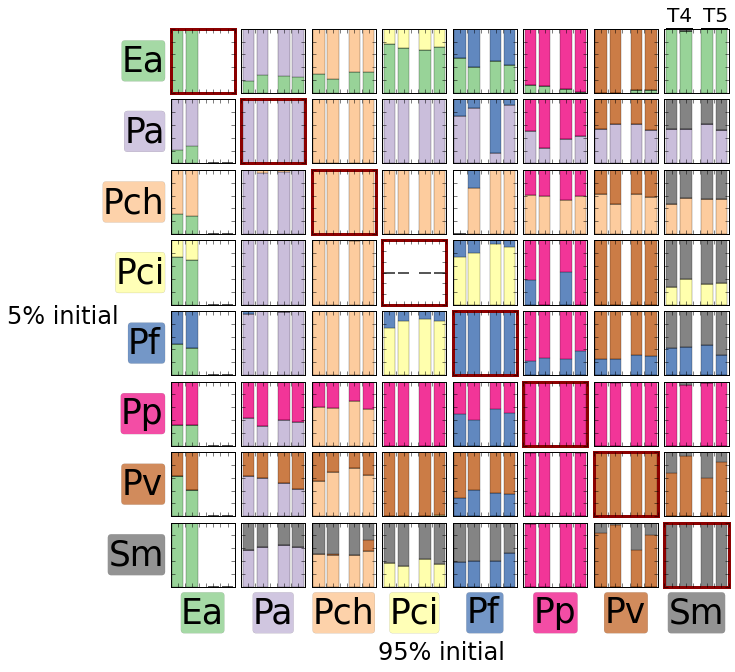

In [29]:
from pysurvey.plotting.Bars import multibar
species_colors = array2colors(arange(8), cmap=cm.Accent)


species_inds = arange(8)
n_species = len(species_inds)
nr = n_species
nc = n_species
s = 1

n = 2
space = 1
time_space= .5*space
cmap = cm.Accent

fig, axs = subplots(nr, nc, figsize=(10, 10), squeeze=False)
for i,r in enumerate(species_inds):
    for j,c in enumerate(species_inds):
        ax = axs[i,j]
        fracs_14   = pair_fracs[1][4].iloc[r,c]
        fracs_24   = pair_fracs[2][4].iloc[r,c]
        fracs_15 = pair_fracs[1][5].iloc[r,c]
        fracs_25 = pair_fracs[2][5].iloc[r,c]
        fracs_t4 = pd.concat([fracs_14, fracs_24], axis=1)
        fracs_t5 = pd.concat([fracs_15, fracs_25], axis=1)
        bars_t4 = multibar(arange(n)*space, fracs_t4.T, ax=ax, cmap=cmap)
        bars_t5 = multibar(arange(n)*space+n*space+time_space, fracs_t5.T, ax=ax, cmap=cmap)
        ax.set_xlim(-.5,4)
        
        
        
## add row/col labels and mark diagonal        
for (i,j), ax in ndenumerate(axs):
    r = species_inds[i]
    c = species_inds[j]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if r==c:
        for sp in ax.spines.values():
            sp.set_color('DarkRed')
            sp.set_linewidth(3)
    
    if j==0:
        ax.set_ylabel(species[r], size='xx-large', rotation=0, ha='right', va='center', 
                      bbox=dict(facecolor=species_colors[r], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
                      )
    if i==(nr-1):
        ax.set_xlabel(species[c], size='xx-large', 
                      bbox=dict(facecolor=species_colors[c], alpha=0.7, lw=0.1, boxstyle='round,pad=.1'),
                      )
## Annotate times        
ax = axs[0,-1]
w = .8
x0 = -w/2
x1 = x0 + w + space
ax.plot([x0,x1], [1.02]*2, 'k', lw=1,  clip_on=False)

x0 = 2*space+time_space - w/2
x1 = x0 + w + space
ax.plot([x0,x1], [1.02]*2, 'k', lw=1,  clip_on=False)

ax.text(space/2., 1.05, 'T4', rotation=0, 
    va='bottom', ha='center')
ax.text(2.5*space+time_space, 1.05, 'T5', rotation=0,
    va='bottom', ha='center')
ax.set_ylim(0,1)

## Annotate initial densities
fig.text(0.05, .5, '5% initial', fontsize='large',
        va='center', ha='right',
#         transform=ax.transAxes
        )

fig.text(0.5, .05, '95% initial', fontsize='large',
        va='top', ha='center',
#         transform=ax.transAxes
        )

subplots_adjust(hspace=.1, wspace=.1)

In [30]:
colors = array2colors(arange(8), cmap=cm.Accent)
def pie_plot(x, ax=None, **kwargs):
    if ax is None:
        ax = gca()
    if any(isnan(x)):
        ax.text(0.5, 0.5, 'NA', fontsize='large',
        va='center', ha='center',
        transform=ax.transAxes)
#         erase_axes(ax)
    else:
        if sum(x)==0:
            ax.plot([0.5], [0.5], 'o', c='w', mec='gray', mew=.5, ms=50) 
        else:
            wedges, texts = ax.pie(x, radius=0.95, colors=colors)
            setp(wedges, linewidth=0)

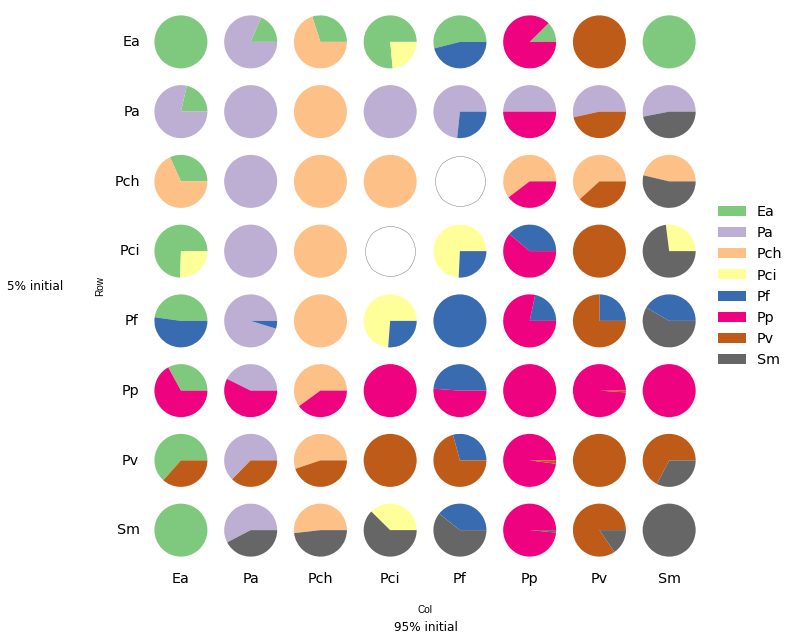

In [820]:
lim = [0, 1]
fig, ax = subplots(figsize=(10,10))
ax_main, axs = plot_ndpanel(pair_fracs[1].ix[4,:,:8].transpose(2,0,1), pie_plot, 
                            col_labels=species, row_labels=species,
                            xlim=(0,1), ylim=(0,1),
                                    )

leg = axs[3,-1].legend(species, numpoints=1, fontsize='x-large',
                       bbox_to_anchor = (1.01, 0), loc=6,
                       frameon=False)
#remove spines
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

ax = ax_main

ax.text(-.15, .5, '5% initial', fontsize='large',
        va='center', ha='right',
        transform=ax.transAxes)

ax.text(0.5, -.1, '95% initial', fontsize='large',
        va='top', ha='center',
        transform=ax.transAxes)

#### Qualitative outcomes

In [26]:
## Set contaminated and missing samples to nans
pair_layout = 0*pair_counts[1].iloc[0].copy()
for i in range(8):
    for j in range(8):
        pair_layout.iloc[i,j, [i,j]] = 1
        pair_layout.iloc[j,i, [i,j]] = 1
pair_layout = pair_layout==1

In [27]:
def mask_data(data, layout):
    data = data.copy()
    print data
    n,m = data.shape[:2]
    for i in range(n):
        for j in range(m):
            sps_in = nonzero(layout.iloc[i,j])[0]
            s_in = data.iloc[i, j, sps_in].sum()
            
            sps_out = nonzero(~layout.iloc[i,j])[0]
            s_out = data.iloc[i, j, sps_out].sum()
            
            if (s_in==0) or (s_out>0):
                data.iloc[i,j] = nan            
    return data

pair_counts_masked = {p:c.apply(lambda x: mask_data(x, pair_layout), axis=[1,2]) for p,c in pair_counts.iteritems()}
pair_fracs_masked = {p:f.apply(lambda x: mask_data(x, pair_layout), axis=[1,2]) for p,f in pair_fracs.iteritems()}

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: A to H
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm
<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: A to H
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm
<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: A to H
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm
<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: A to H
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm
<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: A to H
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm
<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: A to H
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm
<class 'pandas.core.panel.Panel'>
Dimensions: 

In [38]:
for k,v in pair_fracs_masked.items():
    w = pd.ExcelWriter('2015-05-21.EXP_34-Trio_competition/pair.fracs.time_series.replicate_%s.xlsx'%k)
    for s1 in range(8):
        for s2 in range(8):
            if s1==s2:
                label = species[s1]
            else:
                label = '_'.join([species[s2], species[s1]])
            v.iloc[:,s1,s2].to_excel(w, label, na_rep='NA')
    w.save()

In [39]:
import cPickle as pickle

pair_counts_masked_dict = {}
for i in pair_counts_masked.keys():
    pair_counts_masked_dict[i] = {}
    for j in  pair_counts_masked[1].labels:
        pair_counts_masked_dict[i][j] = pair_counts_masked[i][j]

# t = pair_counts_masked[1][0]
# pair_counts_masked_dict.to_pickle('temp.pick')


f = open('2015-05-21.EXP_34-Trio_competition/pair_counts_masked.pick','w')

pickle.dump(pair_counts_masked_dict, f)
f.close()


In [40]:
from itertools import combinations_with_replacement, combinations, product

In [55]:
def classify_outcome(m, th=.01):
    outcomes = pd.DataFrame(columns=species, index=species)
    for i,j in combinations_with_replacement(range(8),2):
        f1 = m.iloc[i,j,i]
        f2 = m.iloc[j,i,i]
        
        if isnan(f1) and isnan(f2):
            outcomes.iloc[i,j] = nan
            continue
        
        if isnan(f1):
            f1=f2
        if isnan(f2):
            f2=f1
        fs, fl = sorted((f1,f2))
        
        if (fl>1-th) and (fs<th):
            o = 'BIS'
        elif (f1>1-th) and (f2>1-th):
            o = species[i]
        elif (f1<th) and (f2<th):
            o = species[j]
        elif (abs(f1-f2)<10*th):
            o = 'COX'
        else:
            o = 'OTHER'
        outcomes.iloc[i,j] = o
        outcomes.iloc[j,i] = o
    return outcomes

# classify_outcome(pair_fracs_masked[1].iloc[-1], th=.05)
all_outcomes = pd.Panel4D({p:f.apply(lambda x: classify_outcome(x), axis=[1,2]) for p,f in pair_fracs_masked.iteritems()})

##### merge outcomes

In [56]:
def outcome_merger(os):
    o1, o2 = os
    if o1==o2:
        return o1
    elif pd.isnull(o1) or o1=='OTHER':
        return o2
    elif pd.isnull(o2) or o2=='OTHER':
        return o1
    elif 'COX' in [o1,o2]:
        return 'COX'
    else:
        return 'inconclusive'

i,j = (0,6)
print all_outcomes.iloc[:,-1,i,j]
outcome_merger(all_outcomes.iloc[:,-1,i,j])

1    COX
2    COX
Name: Pv, dtype: object


'COX'

In [57]:
merged_outcomes = all_outcomes.apply(outcome_merger, axis=0)

# check for inconsistencies
inds = where(all_outcomes.iloc[0,-1]!=all_outcomes.iloc[1,-1])
for (i,j) in zip(*inds): 
    print species[i], species[j],all_outcomes.iloc[0,-1,i,j], all_outcomes.iloc[1,-1,i,j]

Ea Ea nan nan
Pa Pch OTHER BIS
Pa Pf OTHER COX
Pch Pa OTHER BIS
Pch Pp OTHER COX
Pch Pv OTHER COX
Pci Pci nan nan
Pci Pv Pv COX
Pci Sm OTHER COX
Pf Pa OTHER COX
Pf Sm COX OTHER
Pp Pch OTHER COX
Pp Pv Pp COX
Pv Pch OTHER COX
Pv Pci Pv COX
Pv Pp Pp COX
Sm Pci OTHER COX
Sm Pf COX OTHER


In [78]:
i,j = [0,1]
print pair_fracs[1][5].iloc[i,j, [i,j]], '\n'
print pair_fracs[2][5].iloc[i,j, [i,j]], '\n'
print pair_fracs[1][5].iloc[j,i, [i,j]], '\n'
print pair_fracs[2][5].iloc[j,i, [i,j]], '\n'

Ea    0.260163
Pa    0.739837
Name: 2, dtype: float64 

Ea    0.256198
Pa    0.743802
Name: 2, dtype: float64 

Ea    0
Pa    0
Name: 1, dtype: float64 

Ea    0
Pa    0
Name: 1, dtype: float64 



In [115]:
i,j = [0,1]
c11 = pair_counts_masked[1][5].iloc[i,j, [i,j]]
c12 = pair_counts_masked[2][5].iloc[i,j, [i,j]]
c21 = pair_counts_masked[1][5].iloc[j,i, [i,j]]
c22 = pair_counts_masked[2][5].iloc[j,i, [i,j]]

c1 = pd.concat((c11, c12), axis=1).sum(axis=1)
c2 = pd.concat((c21, c22), axis=1).sum(axis=1)
c_tot = pd.concat((c1,c2), axis=1)
f_tot = c_tot.apply(norm_fun, axis=0)
c22


# f_tot.median()

Ea   NaN
Pa   NaN
Name: 1, dtype: float64

In [94]:
def norm_fun(x):
    if x.sum()==0:
        return 0*x
    else:
        return 1.*x/x.sum()

th = .01
outcomes_tmp = pd.DataFrame(columns=species, index=species)
for i,j in combinations(range(3),2):
    c11 = pair_counts_masked[1][5].iloc[i,j, [i,j]]
    c12 = pair_counts_masked[2][5].iloc[i,j, [i,j]]
    c21 = pair_counts_masked[1][5].iloc[j,i, [i,j]]
    c22 = pair_counts_masked[2][5].iloc[j,i, [i,j]]
    
    c_tot = pd.concat((c1, c2, c3, c4), axis=1).sum(axis=1)
    f_tot = norm_fun(c_tot)
    f_med = f_tot.median()
    print f_tot
    
#     if isnan(f1) and isnan(f2):
#         outcomes.iloc[i,j] = nan
#         continue

#     if isnan(f1):
#         f1=f2
#     if isnan(f2):
#         f2=f1
#     fs, fl = sorted((f1,f2))

#     if (fl>1-th) and (fs<th):
#         o = 'BIS'
#     elif (f1>1-th) and (f2>1-th):
#         o = species[i]
#     elif (f1<th) and (f2<th):
#         o = species[j]
#     elif (abs(f1-f2)<10*th):
#         o = 'COX'
#     else:
#         o = 'OTHER'
#     outcomes.iloc[i,j] = o
#     outcomes.iloc[j,i] = o


Ea    0.258197
Pa    0.741803
dtype: float64
Ea     0.326425
Pch    0.673575
dtype: float64
Pa     0.505543
Pch    0.494457
dtype: float64


In [58]:
 merged_outcomes[5]

Ea   Pa  Pch  Pci     Pf     Pp   Pv   Sm
Ea   nan  COX  COX  COX    COX    COX  COX   Ea
Pa   COX   Pa  BIS   Pa    COX    COX  COX  COX
Pch  COX  BIS  Pch  Pch    Pch    COX  COX  COX
Pci  COX   Pa  Pch  nan    COX     Pp  COX  COX
Pf   COX  COX  Pch  COX     Pf  OTHER  COX  COX
Pp   COX  COX  COX   Pp  OTHER     Pp  COX  COX
Pv   COX  COX  COX  COX    COX    COX   Pv  COX
Sm    Ea  COX  COX  COX    COX    COX  COX   Sm

In [53]:
outcomes_34 = pd.read_pickle('2015-05-21.EXP_34-Trio_competition/pair_outcomes.pick')
outcomes_34

Ea   Pa  Pch  Pci   Pf   Pp   Pv   Sm
Ea    Ea  COX  COX  COX  COX  COX  COX   Ea
Pa   COX   Pa  BIS   Pa  COX  COX  COX  COX
Pch  COX  BIS  Pch  Pch  Pch  COX  COX  COX
Pci  COX   Pa  Pch  Pci  COX   Pp   Pv  COX
Pf   COX  COX  Pch  COX   Pf  COX  COX  COX
Pp   COX  COX  COX   Pp  COX   Pp   Pp   Pp
Pv   COX  COX  COX   Pv  COX   Pp   Pv  COX
Sm    Ea  COX  COX  COX  COX   Pp  COX   Sm

In [59]:
outcomes_34== merged_outcomes[5]

Ea    Pa   Pch    Pci     Pf     Pp     Pv     Sm
Ea   False  True  True   True   True   True   True   True
Pa    True  True  True   True   True   True   True   True
Pch   True  True  True   True   True   True   True   True
Pci   True  True  True  False   True   True  False   True
Pf    True  True  True   True   True  False   True   True
Pp    True  True  True   True  False   True  False  False
Pv    True  True  True  False   True  False   True   True
Sm    True  True  True   True   True  False   True   True

In [40]:
outcomes = merged_outcomes.iloc[-1]
outcomes.iloc[0,0] = 'Ea'
outcomes.iloc[3,3] = 'Pci'
outcomes
outcomes.to_pickle('2015-05-21.EXP_34-Trio_competition/pair_outcomes.pick')

In [41]:
## compute fractions of outcomes
n_outcomes = pd.Series(zeros(3), index=['Coexistance', 'Bistability', 'Dominnace'])
for s1,s2 in combinations(species,2):
    o = outcomes.ix[s1,s2]
    if not isinstance(o, str):
        continue
    elif o=='COX': 
        n_outcomes['Coexistance'] += 1
    elif o=='BIS': 
        n_outcomes['Bistability'] += 1
    else:
        n_outcomes['Dominnace'] += 1
        
n_outcomes/n_outcomes.sum()

Coexistance    0.678571
Bistability    0.035714
Dominnace      0.285714
dtype: float64

In [42]:
## Dominance = win + lose
outcomes_per_species = pd.DataFrame(0, index=outcomes.index, columns=['Coexistance', 'Bistability', 'win', 'lose'])
n = len(outcomes.index)
for sp in outcomes.index:
    os = outcomes[sp]
    cox = (os=='COX').sum()
    bis = (os=='BIS').sum()
    win = (os==sp).sum() - 1
    outcomes_per_species.loc[sp, 'Coexistance'] = cox
    outcomes_per_species.loc[sp, 'Bistability'] = bis
    outcomes_per_species.loc[sp, 'win'] = win
    outcomes_per_species.loc[sp, 'lose'] =  n - 1 - cox - bis - win
    
outcomes_per_species['Dominnace'] = outcomes_per_species['win'] + outcomes_per_species['lose']
outcomes_per_species

Coexistance  Bistability  win  lose  Dominnace
Ea             6            0    1     0          1
Pa             5            1    1     0          1
Pch            4            1    2     0          2
Pci            3            0    0     4          4
Pf             6            0    0     1          1
Pp             4            0    3     0          3
Pv             5            0    1     1          2
Sm             5            0    0     2          2

##### Outcome vs phylo distance

In [41]:
frac_diff = pd.read_pickle('16S.total.percent_diff.pick')
v4_diff = pd.read_pickle('16S.v4.percent_diff.pick')

In [42]:
bins = linspace(0,.2, 20)
outcomes_by_dist = pd.DataFrame(zeros((len(bins),3)), columns=['Coexistance', 'Bistability', 'Dominnace'])

for s1,s2 in combinations(species,2):
    o = outcomes.ix[s1,s2]
    f = frac_diff.ix[s1,s2]
    ind = where(bins<=f)[0][-1]
    if not isinstance(o, str):
        continue
    elif o=='COX': 
        outcomes_by_dist.ix[ind,'Coexistance'] += 1
    elif o=='BIS': 
        outcomes_by_dist.ix[ind,'Bistability'] += 1
    else:
        outcomes_by_dist.ix[ind,'Dominnace'] += 1
        
# outcomes_by_dist

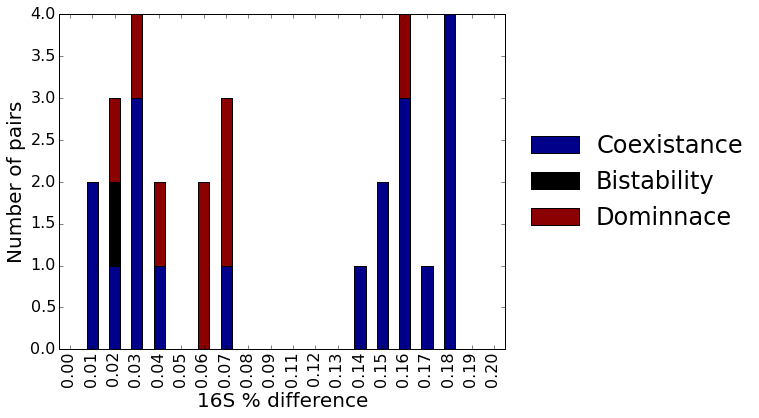

In [42]:
outcomes_frac_by_dist = outcomes_by_dist.apply(lambda x:1.*x/x.sum(), axis=1)
outcome_cmap = matplotlib.colors.ListedColormap(['DarkBlue', 'k', 'DarkRed'])

fig, ax = subplots(figsize=(8,6))
outcomes_by_dist.plot(kind='bar', stacked=True, legend=False, ax=ax, colormap=outcome_cmap)
ax.legend(bbox_to_anchor=(1.01, 0.5), loc=6, frameon=False)
xticks = ax.set_xticklabels(['%.2f'%b for b in bins])
ax.set_xlabel('16S % difference', size=20)
ax.set_ylabel('Number of pairs', size=20)

##### outcome based similarity

In [43]:
## similarity is based on whether two speices interact with the other species in consistent ways.

In [44]:
def get_outcome_dist(outcomes, s1,s2):
    total = 0
    agree = 0
    for s in outcomes.index:
        if s in [s1,s2]:
            continue
        o1 = outcomes.ix[s1,s]
        o2 = outcomes.ix[s2,s]
        if all([isinstance(o, str) for o in (o1,o2)]):
            total+=1
            if o1==o2:
                agree+=1
    d = 1.*agree/total
    return d

In [45]:
n = len(species)
outcome_dist = pd.DataFrame(zeros((n,n)), index=species, columns=species)
for s1,s2 in combinations(species,2):
    d = get_outcome_dist(outcomes, s1,s2)
    outcome_dist.ix[s1,s2] = d
    outcome_dist.ix[s2,s1] = d
outcome_dist

Ea        Pa       Pch       Pci        Pf        Pp        Pv  \
Ea   0.000000  0.500000  0.333333  0.166667  0.666667  0.500000  0.500000   
Pa   0.500000  0.000000  0.666667  0.500000  0.666667  0.333333  0.500000   
Pch  0.333333  0.666667  0.000000  0.333333  0.666667  0.166667  0.333333   
Pci  0.166667  0.500000  0.333333  0.000000  0.500000  0.333333  0.666667   
Pf   0.666667  0.666667  0.666667  0.500000  0.000000  0.333333  0.500000   
Pp   0.500000  0.333333  0.166667  0.333333  0.333333  0.000000  0.666667   
Pv   0.500000  0.500000  0.333333  0.666667  0.500000  0.666667  0.000000   
Sm   0.833333  0.333333  0.166667  0.333333  0.500000  0.500000  0.666667   

           Sm  
Ea   0.833333  
Pa   0.333333  
Pch  0.166667  
Pci  0.333333  
Pf   0.500000  
Pp   0.500000  
Pv   0.666667  
Sm   0.000000

/host/home/yonatanf/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


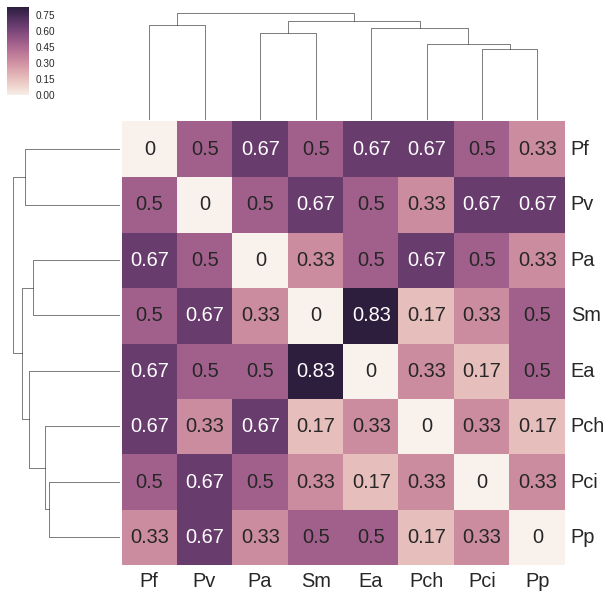

In [42]:
import seaborn as sns
cg = sns.clustermap(outcome_dist, annot=True)
setp(cg.ax_heatmap.get_xticklabels(), size=20);
setp(cg.ax_heatmap.get_yticklabels(), size=20);

In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


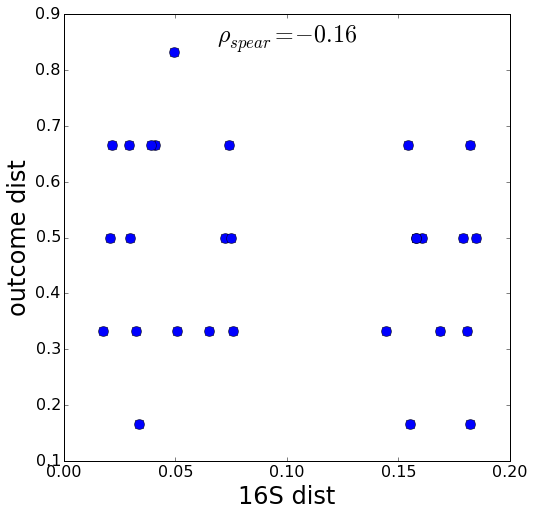

In [40]:
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

x = squareform(frac_diff.sort_index().sort_index(axis=1))
y = squareform(outcome_dist)

rho, pval = spearmanr(x,y)

fig, ax = subplots(figsize=(8,8))
ax.plot(x,y, 'o', ms=10)

ax.text(0.5, 0.98, r'$\rho_{spear} = %.2f$'%rho,
         ha='center', va='top', size=24, transform=ax.transAxes,
#              bbox=dict(facecolor='lightgray', alpha=0.5, lw=0.1, boxstyle='round,pad=.1')
         )

ax.set_xlabel('16S dist', size=24)
ax.set_ylabel('outcome dist', size=24)

##### Network diagrams

In [43]:
tmp = pd.Panel4D(zeros((2,8,8,8)), items=species, major_axis=species, minor_axis=species)
tmp.iloc[0] = pair_fracs_masked[1].iloc[-1].values
tmp.iloc[1] = pair_fracs_masked[2].iloc[-1].values 
masked_avg = tmp.mean(axis=0)

masked_avg.to_pickle('2015-05-21.EXP_34-Trio_competition/pair_frac_avg.pick')

In [44]:
outcomes_flat = pd.DataFrame( zeros((26,4)), columns=['species 1', 'species 2', 'outcome', 'frac'] )
for i,pair in enumerate(combinations(species, 2)):
    sp1,sp2 = pair
    o = outcomes.loc[sp1,sp2]
    f1 = masked_avg.ix[sp1,sp2,sp1]
    f2 = masked_avg.ix[sp2,sp1,sp1]
    f = pd.Series([f1,f2]).mean()
    outcomes_flat.ix[i] = [sp1, sp2, o, f]
outcomes_flat.to_csv('2015-05-21.EXP_34-Trio_competition/pair_outcomes_flat.txt', index=False)

In [45]:
outcomes4Ali = pd.DataFrame( zeros((15,4)), columns=['species 1', 'species 2', 'frac1', 'frac2'] )
species4Ali = ('Ea', 'Pch', 'Pf', 'Pp', 'Pv', 'Sm')
for i,pair in enumerate(combinations(species4Ali, 2)):
    sp1,sp2 = pair
    f1 = masked_avg.ix[sp1,sp2,sp1]
    f2 = masked_avg.ix[sp2,sp1,sp1]
    f = pd.Series([f1,f2]).mean()
    outcomes4Ali.ix[i] = [sp1, sp2, f, 1-f]
outcomes4Ali.to_csv('2015-05-21.EXP_34-Trio_competition/pair_outcomes_Ali.txt', index=False)

In [46]:
s1 = 0
for s2 in range(8):
    f1 = masked_avg.ix[s1,s2,s1]
    f2 = masked_avg.ix[s2,s1,s1]
    print pd.Series([f1,f2]).mean()

nan
0.258180474367
0.326509778637
0.691489361702
0.470813397129
0.0386363636364
0.04779342723
0.996240601504


In [47]:
outcomes

Ea   Pa  Pch  Pci   Pf   Pp   Pv   Sm
Ea    Ea  COX  COX  COX  COX  COX  COX   Ea
Pa   COX   Pa  BIS   Pa  COX  COX  COX  COX
Pch  COX  BIS  Pch  Pch  Pch  COX  COX  COX
Pci  COX   Pa  Pch  Pci  COX   Pp   Pv  COX
Pf   COX  COX  Pch  COX   Pf  COX  COX  COX
Pp   COX  COX  COX   Pp  COX   Pp   Pp   Pp
Pv   COX  COX  COX   Pv  COX   Pp   Pv  COX
Sm    Ea  COX  COX  COX  COX   Pp  COX   Sm

In [48]:
# first and second dimension = species competing
# last dimension = spicies fractions
print masked_avg
print masked_avg.loc['Pa', 'Sm']
print masked_avg.loc['Sm', 'Pa']

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: Ea to Sm
Major_axis axis: Ea to Sm
Minor_axis axis: Ea to Sm
Ea     0.000000
Pa     0.573919
Pch    0.000000
Pci    0.000000
Pf     0.000000
Pp     0.000000
Pv     0.000000
Sm     0.426081
Name: Sm, dtype: float64
Ea     0.000000
Pa     0.634301
Pch    0.000000
Pci    0.000000
Pf     0.000000
Pp     0.000000
Pv     0.000000
Sm     0.365699
Name: Pa, dtype: float64


In [4]:
from itertools import combinations
import networkx as nx
from matplotlib import patches as mpatches
import matplotlib

def make_interaction_network(outcomes, pair_fracs, directed=False):
    '''
    outcomes : DataFrame
        Qualitative outcome matrix. Labels = species labels.
    '''
    if directed:
        net = nx.DiGraph()
    else:
        net = nx.Graph()
    net.add_nodes_from(outcomes.columns)
    for s1,s2 in combinations(net.nodes(), 2):
        o = outcomes.ix[s1,s2]
        if not isinstance(o, str):
            net.add_edge(s1, s2, outcome='NA',)
        elif o=='COX':
            f1 = pair_fracs.ix[s1,s2,s1]
            f2 = pair_fracs.ix[s2,s1,s1]
            frac = pd.Series([f1,f2]).mean()
            net.add_edge(s1, s2, outcome='coexistence', fraction=frac)
        elif o=='BIS': 
            net.add_edge(s1, s2, outcome='bistability',)
        else:
            winner = o
            loser  = s1 if s1!=o else s2
            net.add_edge(loser, winner, outcome=o,)
    return net


from matplotlib import colors as mcolors
c = mcolors.ColorConverter()
c1 = c.to_rgb('DarkRed')
c2 = c.to_rgb('DarkBlue')
cdict = {'red':   [(0.0,  0.0, c1[0]),
                   (1.0,  c2[0], c2[0])],

         'green': [(0.0,  0.0, c1[1]),
                   (1.0,  c2[1], c2[1])],

         'blue':  [(0.0,  0.0, c1[2]),
                   (1.0,  c2[2], c2[2])]}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

# sps = ['Ea','Pa', 'Pv']
# # sps = species
# tmp = outcome.reindex(sps,sps)
# net = make_interaction_network(tmp)
# plot_interaction_network(net)

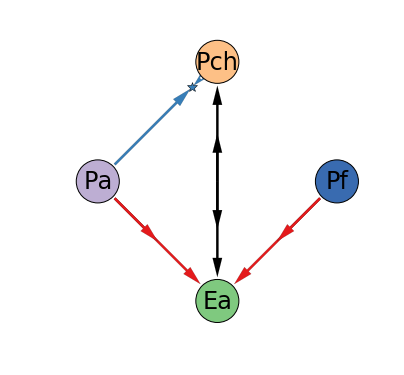

In [5]:
species_colors = array2colors(arange(8), cmap=cm.Accent)
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

class NetPloter(object):
        
    def __init__(self, ax=None, pos=None, scale=1, species_colors=None, net=None, arrow_opt=dict()):
        self.ax   = ax
        self.scale = scale
        self.species_colors = species_colors
        self.net = net
        
        if pos is None:
            self.verts = self.get_vertices()
        else:
            self.verts = pos
        
        opt = {'head_width': 0.04, 'head_length': 0.08, 'width': 0.01,
                'length_includes_head': True, 'ec':'w', 'linewidth':.1}
        
        for k,v in opt.iteritems():
            arrow_opt.setdefault(k,v)
        self.boundry_kwargs = {'dominance': dict(color='#e41a1c', **arrow_opt),
                               'coexistence': dict(color='#377eb8', **arrow_opt),
                               'bistability': dict(color='k', **arrow_opt),
                               'NA': dict(color='gray', linewidth=1),
                               }
#         self.boundry_kwargs = {'dominance': dict(color='#e41a1c', **arrow_opt),
#                    'coexistence': dict(color='#377eb8', **arrow_opt),
#                    'bistability': dict(color='#4daf4a', **arrow_opt),
#                    'NA': dict(color='gray', linewidth=1),
#                    }
    
    def get_vertices(self):
        pos = pd.DataFrame(nx.drawing.circular_layout(net)).T
        pos.columns=['x','y']
        return pos
    
    
    def _remove_axis(self, e=.2):
        ax = self.ax
        lim = (-e, self.scale+e)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.axis('off')
    
    
    def _plot_arrows(self, points, fs=None, n=4 ,**kwargs):
        '''
        points : DataFrame (2x2)
            First row is origin and second is target.
            Columns are x,y values.
        '''
        ax = self.ax
        if fs is None:
            fs = linspace(0,1,n+1)[:-1]
        origin = points.loc['origin']
        target = points.loc['target']
        for i,f in enumerate(fs):
            target_x = f*points.loc['origin','x'] + (1-f)*points.loc['target','x']
            target_y = f*points.loc['origin','y'] + (1-f)*points.loc['target','y']
            ax.arrow(origin['x'], origin['y'], target_x-origin['x'], target_y-origin['y'], **kwargs)
    
    def _make_points(self, origin, target, offsets=zeros(2)):
        points = pd.DataFrame([origin, target], index=['origin', 'target'])

        dx, dy = points.diff().iloc[-1]
        theta = arctan(dy/dx)
        ey = abs(sin(theta)*offsets)
        ex = abs(cos(theta)*offsets)
        snx = sign(dx)
        sny = sign(dy)

        points_offset = points.copy()

        points_offset.iloc[0,0] += snx*ex[0]
        points_offset.iloc[1,0] -= snx*ex[1]
        points_offset.iloc[0,1] += sny*ey[0]
        points_offset.iloc[1,1] -= sny*ey[1]
        return points_offset
    
    def plot_net_boundry(self, label_vertices=True, offset=.1):
        if self.ax is None:
            fig, ax = subplots(figsize=(6,6))
            self.ax = ax
        else:
            ax = self.ax
        net = self.net
        verts = self.verts
        labels = verts.index
        for s1,s2 in net.edges():
            edge = net[s1][s2]
            o =  edge['outcome']
            if o in labels: #if dominance
                origin = s2 if o==s1 else s1
                target = o
                n = 2
                offsets = array([offset]*2)
                points = self._make_points(verts.loc[origin], verts.loc[target], offsets=offsets)
                self._plot_arrows(points, n=n, **self.boundry_kwargs['dominance'])
            elif o=='bistability':
                middle = verts.loc[[s1,s2]].mean()
                n = 2
                offsets = array([0, offset])
                points = self._make_points(middle, verts.loc[s1], offsets=offsets)
                self._plot_arrows(points, n=n, **self.boundry_kwargs[o])
                points = self._make_points(middle, verts.loc[s2], offsets=offsets)
                self._plot_arrows(points, n=n, **self.boundry_kwargs[o])
            elif o=='coexistence':
                offsets = array([offset]*2)
                points = self._make_points(verts.loc[s1], verts.loc[s2], offsets=offsets)
                f = edge['fraction']
                fixed_point = f*points.iloc[0] + (1-f)*points.iloc[1]
                n = 1
                offsets = array([offset,0.01])
                points = self._make_points(verts.loc[s1], fixed_point, offsets=offsets)
                self._plot_arrows(points, n=n, **self.boundry_kwargs[o])
                points = self._make_points(verts.loc[s2], fixed_point, offsets=offsets)
                self._plot_arrows(points, n=n, **self.boundry_kwargs[o])
                ax.plot(fixed_point['x'], fixed_point['y'], '*k', ms=10, c=self.boundry_kwargs[o]['color'])          
            else:
                ax.plot(verts.loc[(s1,s2), 'x'], verts.loc[(s1,s2), 'y'], **self.boundry_kwargs[o])
        if label_vertices:
            self.label_vertices(labels)
        self._remove_axis()
        
    def label_vertices(self, labels):
        n = len(labels)
        verts = self.verts
        ax = self.ax
#         if self.species_colors is not None:
#             bboxes=[dict(facecolor=self.species_colors[l], alpha=0.7, lw=0.1, boxstyle='round,pad=.1') for l in labels]
#         else:
#             bboxes = [None]*n
        bboxes = [None]*n
        for i in range(n):
            props = dict()
            props.setdefault('facecolor', self.species_colors[labels[i]])
            props.setdefault('edgecolor', 'k')
            props.setdefault('linewidth', 1)
            props.setdefault('radius', .09)
            ax.text(verts.iloc[i,0], verts.iloc[i,1], labels[i], va='center', ha='center', 
                    color='k', size='large', bbox=bboxes[i])
            patch = mpatches.Circle(verts.iloc[i].values, **props)
            ax.add_artist(patch)
        
net = nx.Graph()
# net.add_nodes_from(tmp.columns)
net.add_edge('Ea', 'Pa', outcome='Ea',)
net.add_edge('Ea', 'Pch', outcome='bistability',)
net.add_edge('Pch', 'Pa', outcome='Pa')
net.add_edge('Pch', 'Pa', outcome='coexistence', fraction=.9)
net.add_edge('Ea', 'Pf', outcome='Ea',)
# net.add_edge('Pa', 'Pf', outcome='coexistence',)

opt = {'head_width': .04, 'head_length': 0.08, 'width': 0.01,
        'length_includes_head': True, 'ec':'k', 'linewidth':.1}

np = NetPloter(net=net, species_colors=species_colors_d, arrow_opt=opt)
np.plot_net_boundry(offset=.1)

NameError: name 'outcomes' is not defined

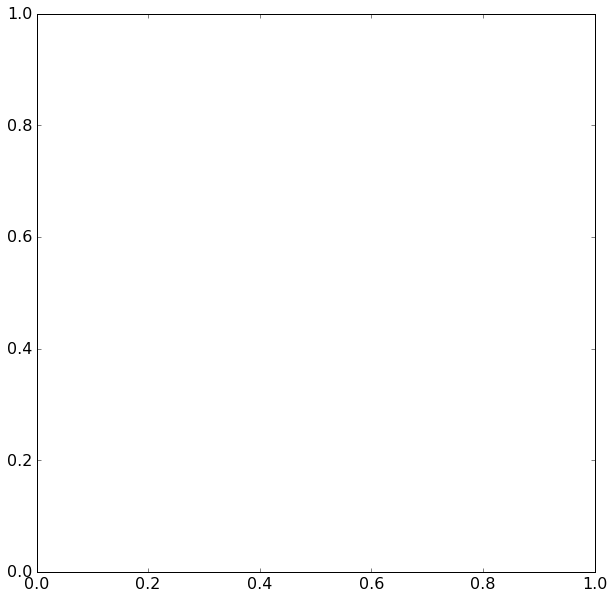

In [6]:
fig, ax = subplots(figsize=(10,10))
sps = species
# sps = ['Sm','Pch', 'Pp']
# sps = ['Pa','Pch', 'Ea']
# sps = ['Ea','Pch', 'Pv', 'Pp']
# sps = ['Ea','Pa', 'Pv', 'Pp', 'Sm']

tmp = outcomes.reindex(sps,sps)
net = make_interaction_network(tmp, masked_avg)
np = NetPloter(net=net, species_colors=species_colors_d, ax=ax)
np.plot_net_boundry()

t = 1.1
ax.set_xlim(-t,t)
ax.set_ylim(-t,t)

# opt = {'head_width': .02, 'head_length': 0.04, 'width': 0.01,
#         'length_includes_head': True, 'ec':'w', 'linewidth':.1}
# np = NetPloter(net=net, species_colors=species_colors_d, ax=ax, arrow_opt=opt)
# np.plot_net_boundry(offset=.1)

#### Relative yield

- Relative yield (RY) quantifies the influence of species j on the abundance of species i. It is the ratio of the abundance (OD) of species i in the presence of species j to its abundance in the absence of species j.     
- The RY of two species in the absence of additional species measures direct interactions between these species, whereas RY measured in the presence of additional species combines both direct and indirect interactions.  


$RY_{ij} = \frac{x_{i|j}}{x_i}$

$RY_{ij|k} = \frac{x_{i|jk}}{x_i|k}$


In [24]:
## get carrying capacities: medians and confidence intervals
k_all = ods_combined.iloc[:,-1,:,8]
k_all.columns = species
k_all.loc[ ['A','H'], 'Pch'] = nan #mask contaminated wells
k_quantiles = k_all.quantile([.25,.5,.75])
k_med = k_quantiles.loc[.5]
k_iqr = k_quantiles.loc[.75] - k_quantiles.loc[.25]

In [28]:
def get_partial_OD(fracs, ods):
    ods_panel = pd.Panel({s:ods for s in fracs.minor_axis}).transpose(1,2,0)
    partial_ods = fracs.mul(ods_panel)
    return partial_ods

pair_partial_OD = {}
for j in [1,2]:
    pair_partial_OD[j] = pd.Panel4D({i: get_partial_OD(pair_fracs_masked[j].iloc[i], ods_pairs[j].iloc[i]) for i in range(6)})

pairs_partial_OD_last = pd.Panel4D({i: pair_partial_OD[i].iloc[-1] for i in [1,2]})
pairs_partial_OD_avg = pairs_partial_OD_last.mean(axis=0)
pairs_partial_OD_avg

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: A to H
Major_axis axis: 1 to 8
Minor_axis axis: Ea to Sm

In [29]:
import cPickle as pickle

pair_partial_OD_dict = {}
for i in pair_partial_OD.keys():
    pair_partial_OD_dict[i] = {}
    for j in  pair_partial_OD[1].labels:
        pair_partial_OD_dict[i][j] = pair_partial_OD[i][j]

# t = pair_counts_masked[1][0]
# pair_counts_masked_dict.to_pickle('temp.pick')


f = open('2015-05-21.EXP_34-Trio_competition/pair_partial_OD.pick','w')

pickle.dump(pair_partial_OD_dict, f)
f.close()

In [30]:
trio_layout = 0*last_counts.copy()
for p in range(8):
    for i in range(8):
        for j in range(8):
            trio_layout.iloc[p,i,j, [i,j,p]] = 1
            trio_layout.iloc[p,j,i, [i,j,p]] = 1
trio_layout = trio_layout==1

In [31]:
last_counts_masked = last_counts.copy()
last_fracs_masked = last_fracs.copy()
n,m,k = last_counts_masked.shape[:-1]
for p in range(n):
    for i in range(m):
        for j in range(k):
            ind = trio_layout.iloc[p,i,j]
            s_in  =  last_counts.iloc[p,i,j][ind].sum()
            s_out =  last_counts.iloc[p,i,j][~ind].sum()
            if (s_in==0) or (s_out>0):
                if p and j<8:
#                     print p,i,j
                    print species[p], species[i], species[j]
                last_counts_masked.iloc[p,i,j] = nan 
                last_fracs_masked.iloc[p,i,j] = nan 

Pa Pp Pf
Pch Pci Pf
Pch Pf Pa
Pch Pp Pa
Pch Pp Pf
Pch Pv Pf
Pch Sm Ea
Pch Sm Pch
Pch Sm Pci
Pch Sm Pp
Pci Pci Pci
Pci Pf Ea
Pp Pp Pci


In [32]:
last_partial_OD = pd.Panel4D({i+1: get_partial_OD(last_fracs_masked.iloc[i], ods_combined.iloc[i,-1,:,:10]) for i in range(8)})

last_partial_OD

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 8 (labels) x 8 (items) x 10 (major_axis) x 8 (minor_axis)
Labels axis: 1 to 8
Items axis: A to H
Major_axis axis: 1 to 10
Minor_axis axis: Ea to Sm

In [33]:
import cPickle as pickle

last_partial_OD_dict = {}
for j in  last_partial_OD.labels:
    last_partial_OD_dict[j] = last_partial_OD[j]

f = open('2015-05-21.EXP_34-Trio_competition/last_partial_OD.pick','w')

pickle.dump(last_partial_OD_dict, f)
f.close()

(-1.0, -1.0, -1.0)

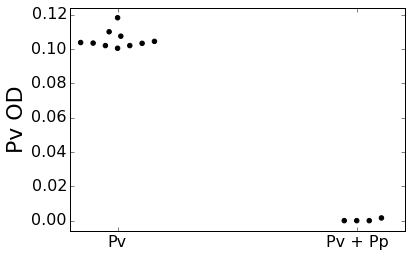

In [38]:
from numpy.random import choice
from beeswarm import beeswarm

@vectorize
def _get_RY(x,y, s_x=None, s_y=None, kind='dos'):
    ## calculate std?
    if (s_x is not None) and (s_y is not None):
        get_std = True
    else:
        get_std = False
    
    if not x+y: ## deal with both values being 0
        R = 0
        R_std = 0
    else:       ## calculate R, R_std
        if kind == 'ratio':
            R = (x - y)/y
            if get_std: R_std = x/y*( (s_x/x)**2 + (s_y/y)**2 )**0.5
        elif kind == 'dos':  
            R = (x - y)/(x + y)
            if get_std: R_std = 2/(x + y)**2*( (s_x*y)**2 + (s_y*x)**2 )**0.5
        else:
            raise ValueError, 'Invalid kind arg.'
    
    if get_std:
        return R, R_std
    else:
        return R

def _get_ODs_for_RY(s1,s2,s3, T='last', simulated=False):
    i = s1
    j = s2
    k = s3
    if s1==s2 or s3==s1 or s3==s2:
        return None, None
    
    if T is 'last':
        ods_mono = r_[k_all.iloc[:,i].values, pairs_partial_OD_last.iloc[0,i,i,i], 
                      pairs_partial_OD_last.iloc[1,i,i,i]]
    else:
        ods_mono = r_[ods_combined.iloc[:,T,:,8].iloc[:,i].values, pair_partial_OD[1][T].iloc[i,i,i], 
                      pair_partial_OD[2][T].iloc[i,i,i]]
    if s3 is None:
        ods_without = ods_mono
        if T is 'last':
            ods_with = r_[pairs_partial_OD_last.iloc[0,i,j,i], pairs_partial_OD_last.iloc[1,i,j,i],
                          pairs_partial_OD_last.iloc[1,j,i,i], pairs_partial_OD_last.iloc[0,j,i,i]]
        else:
            ods_with = r_[pair_partial_OD[1][T].iloc[i,j,i], pair_partial_OD[2][T].iloc[i,j,i],
                          pair_partial_OD[1][T].iloc[j,i,i], pair_partial_OD[2][T].iloc[j,i,i]]
    else:
        if T is 'last':
            ods_without = r_[pairs_partial_OD_last.iloc[0,i,k,i], pairs_partial_OD_last.iloc[1,i,k,i],
                             pairs_partial_OD_last.iloc[1,k,i,i], pairs_partial_OD_last.iloc[0,k,i,i]]
        else:
            raise NotImplementedError
        
        if simulated:
#             ind = [s1,s2,s3].index
            ods_with = trio_predict[(s1,s2,s3)][:,0]
        else:
            ods_with = r_[last_partial_OD.iloc[i,j,k,i], last_partial_OD.iloc[i,k,j,i],
                          last_partial_OD.iloc[j,i,k,i], last_partial_OD.iloc[j,k,i,i],
                          last_partial_OD.iloc[k,i,j,i], last_partial_OD.iloc[k,j,i,i],
                          ]
    return ods_without[~isnan(ods_without)], ods_with[~isnan(ods_with)]

# def plot_RY(s1,s2,s3, ods_without, ods_with):
#     i,j,k = s1,s2,s3
#     s1  = species[i]
#     s2  = species[j]
#     s3 = '' if k is None else species[k]
#     if s3 is None:
#         l1 = s1
#     else:
#         l1 = ', '.join([s1,s3])
#     l2 = l1 + ' + ' + s2
#     bs, ax = beeswarm([ods_without[~isnan(ods_without)], ods_with[~isnan(ods_with)]],
#                       s=10**2, labels=[l1, l2])
#     ax.set_ylabel(s1 + ' OD', size=22)
# #         ax.text(0.5, 1.01, 'RY=%.2f$\pm$%.2f'%(R,R_std),  size=20, 
# #                 transform=ax.transAxes, ha='center', va='bottom')

def get_RY(s1,s2, s3=None, kind='dos', T='last',
           bootstrap=True, nboots=1000, ddof=1, 
           plot=False, simulated=False):
    '''
    Get yield of species s1 in the presence of s2 compared to its yield in the absence of s2.
    Compute also the error in the relative yield, as assessed by propagating the variances 
    of the replicates used to compute it. 
    *This does not take into account the accuracy of the measurements. All measurements are weighted equally.*
    
    Inputs:
    -------
    s1 : int
        index of affected species
    s2 : int
        index of affecting species
    s3 : int | None
        index of additional species
    kind : 'dos'|'ratio'
        kind of relative yield to be computed
        'dos' = (with - without)/(with+without)
        'ratio' = (with - without)/(without)
    bootstrap : bool
        flag indicating whether mean and std are computed via bootstraping.
    nboots : int
        number of bootsrap iteration
        only ysed if bootstrap is True
    ddof : 0 | 1
        used in computing standard deviations. delta degrees of freedom. 
        only used if bootstrap is False 
    plot : bool
        flag for making hive plots of the mono/poly ODs.
    
    
    Returns:
    --------
    R : float  
        the relative yield
    R_se : float 
        the standard deviation of R.
    '''
    ods_without, ods_with = _get_ODs_for_RY(s1,s2,s3, simulated=simulated, T=T)
#     print ods_with
    
    if ods_without is None:
        return nan, nan, nan
    
    n_without = len(ods_without)
    n_with = len(ods_with)
#     if (n_without < 3) or (n_with < 3): print i,j, n_without, n_with 
    
    if bootstrap:
        x = choice(ods_with, nboots)
        y = choice(ods_without, nboots)
        R_boots = pd.Series(_get_RY(x,y, kind=kind))
#         R = R_boots.mean()
#         R_std = R_boots.std()
#         R = R_boots.mean()
        R = R_boots.median()
        R_low, R_high = R_boots.quantile([.33, .66])
        
#         print  R_boots.quantile([.25, .75])
    else:
        without_mean = mean(ods_without)
        with_mean = mean(ods_with)
        without_se = std(ods_without, ddof=ddof)/n_without**0.5
        with_se = std(ods_with, ddof=ddof)/n_with**0.5

#         print without_mean, with_mean
        R, R_std = _get_RY(with_mean, without_mean, with_se, without_se, kind=kind)
        R_low = R-R_std
        R_high = R+R_std
    
    if plot:
        sp1  = species[s1]
        sp2  = species[s2]
        sp3 = '' if s3 is None else species[s3]
        if s3 is None:
            l1 = sp1
        else:
            l1 = ', '.join([sp1,sp3])
        l2 = l1 + ' + ' + sp2
        bs, ax = beeswarm([ods_without[~isnan(ods_without)], ods_with[~isnan(ods_with)]],
                          s=10**2, labels=[l1, l2])
        ax.set_ylabel(sp1 + ' OD', size=22)
#         ax.text(0.5, 1.01, 'RY=%.2f$\pm$%.2f'%(R,R_std),  size=20, 
#                 transform=ax.transAxes, ha='center', va='bottom')
    return R, R_low, R_high



s1,s2, s3 = 6, 5, None
# s1,s2, s3 = 2, 6, None
# s1,s2, s3 = 6, 5, 2
# s1,s2,s3 = 0,1,2
get_RY(s1,s2, s3, plot=True, nboots=1000, simulated=True, kind='dos', T=5)

In [52]:
pair_ry = pd.Panel(zeros((5,8,8)), items=range(1,6), major_axis=species, minor_axis=species)
pair_ry_low = pair_ry.copy()
pair_ry_high = pair_ry.copy()

for t in range(1,6):
    for i in range(8):
        for j in range(8):
            R, R_low, R_high = get_RY(i,j, kind='dos', bootstrap=True, T=t)
            pair_ry.iloc[t-1,i,j] = R
            pair_ry_low.iloc[t-1,i,j] = R_low
            pair_ry_high.iloc[t-1,i,j] = R_high
pair_ry

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: 1 to 5
Major_axis axis: Ea to Sm
Minor_axis axis: Ea to Sm

In [54]:
x = pair_ry[5].copy()

# ## correct for new Pa strain
x.loc['Pa', 'Pch']=-1
x.loc['Pch', 'Pa']=0

x.to_csv('2015-05-21.EXP_34-Trio_competition/pair_ry.dos.median.final.csv')

[None, None, None, None, None, None, None, None]

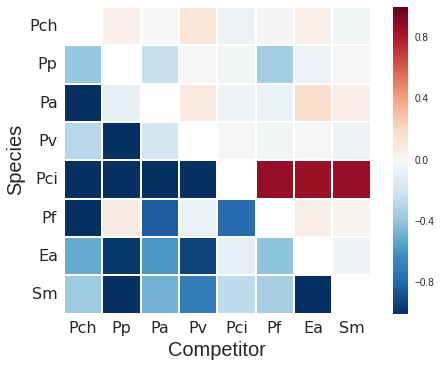

In [53]:
import seaborn as sns




rsum = x.sum(axis=1) +1
csum = x.sum(axis=0) +1

sort_by = (rsum - csum).sort_values(ascending=False)

to_plot = x.reindex(index=sort_by.index, columns=sort_by.index)

ax = sns.heatmap(to_plot, linewidths=.5, square=True)
ax.tick_params(labelsize=16)
ax.set_ylabel('Species', size=20)
ax.set_xlabel('Competitor', size=20)
setp(ax.get_yticklabels(), rotation=0)

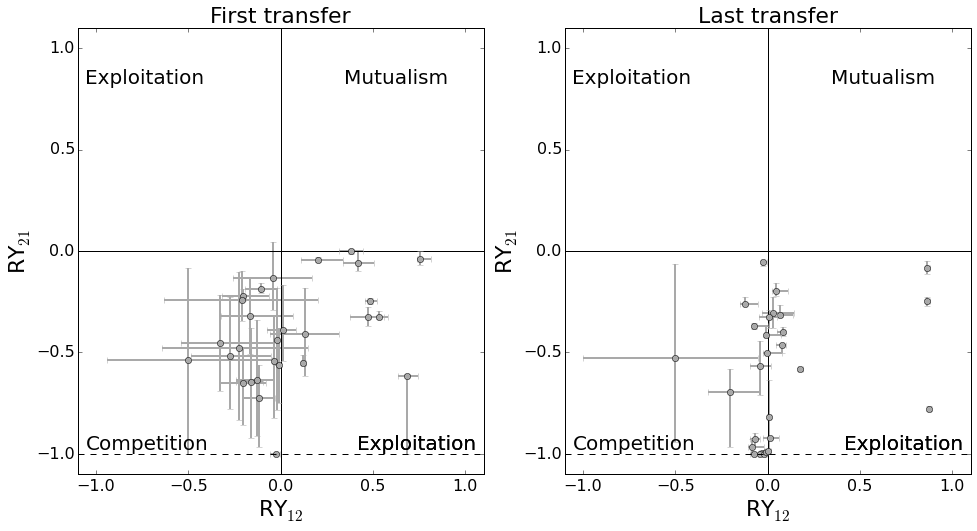

In [63]:
from pysurvey.plotting.Beautification import spine_placement

c = 'DarkGrey'
c2 = 'DarkRed'


def plot_RY(t,ax):
    for s1,s2 in combinations(species,2):
        if pair_ry.loc[t,s1,s2] > pair_ry.loc[t,s2,s1]:
            i,j = s1, s2
        else:
            i,j = s2,s1
        x, y = pair_ry.loc[t,i,j], pair_ry.loc[t,j,i]
    #     xerr, yerr = pair_ry_std.loc[i,j], pair_ry_std.loc[j,i]

        xerr =  zip( abs((x - array([pair_ry_low.loc[t,i,j], pair_ry_high.loc[t,i,j]]) )) )
        yerr =  zip( abs((y - array([pair_ry_low.loc[t,j,i], pair_ry_high.loc[t,j,i]]) )) )
        ax.errorbar(x,y, xerr=xerr, yerr=yerr, c=c, fmt='o', elinewidth=2)


    limx = (-1.1,1.1)
    limy = (-1.1, 1.1)
    ax.set_xlim(limx)
    ax.set_ylim(limy)

    ax.set_xticks([-1,-.5,0,.5,1])


    ax.set_xlabel( 'RY$_{12}$', size=22)
    ax.set_ylabel( 'RY$_{21}$', size=22)
    ax.hlines(0, *limx)
    ax.vlines(0, *limy)

    ax.plot(limx, [-1,-1], 'k--')

    ax.text(.9,.9, 'Mutualism', ha='right', va='top')
    ax.text(-1.05, -1, 'Competition', ha='left', va='bottom')
    ax.text(1.05, -1, 'Exploitation', ha='right', va='bottom')
    ax.text(1.05, -1, 'Exploitation', ha='right', va='bottom')
    ax.text(-1.05, .9, 'Exploitation', ha='left', va='top')
    
    
fig, axs = subplots(1,2, figsize=(2*8,8))
plot_RY(1,axs[0])
plot_RY(5,axs[1])

axs[0].set_title('First transfer', size=22)
axs[1].set_title('Last transfer', size=22)

In [64]:
tmp = {0:'competition', 1:'exploitation', 2:'mutualism'}
t = 5
pair_ry_qualitative = pair_ry.loc[t].copy()
for s1,s2 in combinations(species,2):
    rys = array([pair_ry.loc[t,s1,s2], pair_ry.loc[t,s2,s1]])
    n = len(where(rys>0)[0])    
    pair_ry_qualitative.loc[s1,s2] = tmp[n]
    pair_ry_qualitative.loc[s2,s1] = tmp[n]
pair_ry_qualitative   

Ea            Pa           Pch           Pci            Pf  \
Ea            NaN  exploitation   competition  exploitation  exploitation   
Pa   exploitation           NaN   competition   competition   competition   
Pch   competition   competition           NaN   competition   competition   
Pci  exploitation   competition   competition           NaN  exploitation   
Pf   exploitation   competition   competition  exploitation           NaN   
Pp    competition   competition   competition   competition  exploitation   
Pv   exploitation  exploitation  exploitation  exploitation   competition   
Sm    competition  exploitation   competition  exploitation  exploitation   

               Pp            Pv            Sm  
Ea    competition  exploitation   competition  
Pa    competition  exploitation  exploitation  
Pch   competition  exploitation   competition  
Pci   competition  exploitation  exploitation  
Pf   exploitation   competition  exploitation  
Pp            NaN   competition  exploitation  
Pv    competition           NaN   competition  
Sm   exploitation   competition           NaN

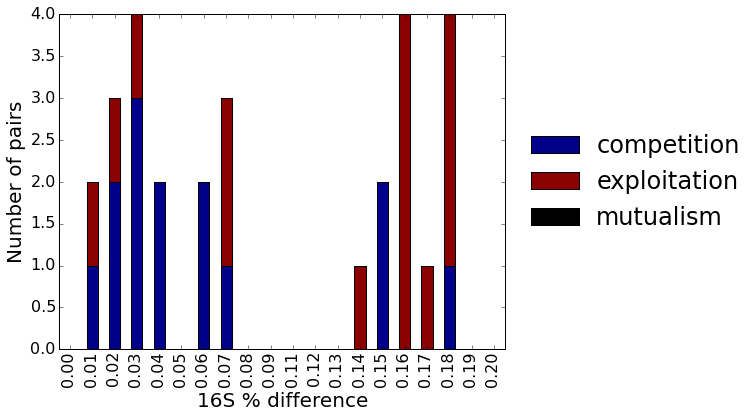

In [65]:
## relative yield vs phylo dist
bins = linspace(0,.2, 20)
ry_by_dist = pd.DataFrame(zeros((len(bins),3)), columns=['competition', 'exploitation', 'mutualism'])

for s1,s2 in combinations(species,2):
    o = pair_ry_qualitative.ix[s1,s2]
    f = frac_diff.ix[s1,s2]
    ind = where(bins<=f)[0][-1]
    ry_by_dist[o][ind] +=1

ry_frac_by_dist = ry_by_dist.apply(lambda x:1.*x/x.sum(), axis=1)
outcome_cmap = matplotlib.colors.ListedColormap(['DarkBlue','DarkRed', 'k'])

fig, ax = subplots(figsize=(8,6))
ry_by_dist.plot(kind='bar', stacked=True, legend=False, ax=ax, colormap=outcome_cmap)
ax.legend(bbox_to_anchor=(1.01, 0.5), loc=6, frameon=False)
xticks = ax.set_xticklabels(['%.2f'%b for b in bins])
ax.set_xlabel('16S % difference', size=20)
ax.set_ylabel('Number of pairs', size=20)

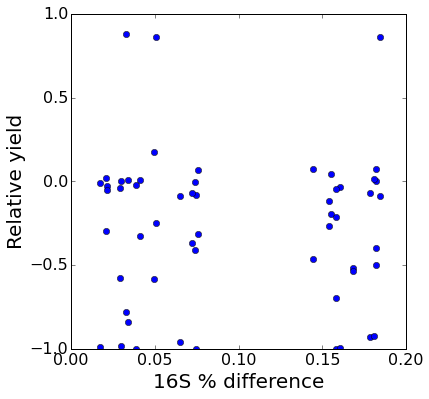

In [194]:
t = 5
ry_flat = r_[ pair_ry[t].values[tril_indices(8, k=-1)], pair_ry[t].values[triu_indices(8, k=1)] ]
dist_flat = r_[ frac_diff.values[tril_indices(8, k=-1)], frac_diff.values[triu_indices(8, k=1)] ]

fig, ax = subplots(figsize=(6,6))
ax.plot(dist_flat, ry_flat, 'o')
ax.set_ylim(-1,1)

from scipy import stats
stats.spearmanr(ry_flat, dist_flat)
ax.set_xlabel('16S % difference', size=20)
ax.set_ylabel('Relative yield', size=20)

In [65]:
## do mono culture params predict relative yield?
param_file = '2015-01-01.EXP_25-Pairwise_competition/params_lv_rows.txt'
logistic_params = pd.read_csv(param_file, index_col=0)
logistic_params.index = species
logistic_params

tau         r         k        err
Ea    2.523822  0.455114  0.146856   5.667649
Pa    3.653114  0.550650  0.105767   7.795284
Pch  19.952178  0.171285  0.065286  20.792418
Pci   5.560203  0.114129  0.007801   5.302813
Pf    0.000000  0.137238  0.056314  20.015729
Pp    0.000000  0.652300  0.154193   5.188304
Pv    3.796915  0.566098  0.101936  15.928922
Sm    1.281825  0.339006  0.110969   6.296708

#### Tradeoff between competitive ability and monculture growth rate 

In [108]:
tradeoffs = pd.DataFrame(nan, index=arange(28), 
                         columns=['Species 1', 'Species 2', r'r1 - r2', r'RY21 - RY12', 'r1', 'r2', 'RY21', 'RY12'])
j = 0
for i,(s1,s2) in enumerate(combinations(species,2)):
    r1, r2 = logistic_params.loc[s1, 'r'], logistic_params.loc[s2, 'r']
    dr = r1-r2
    ry1, ry2 = pair_ry.loc[5,s1,s2], pair_ry.loc[5,s2,s1]
    dry = ry1-ry2
#     if ry1 >0 or ry2>0:
#         continue
    if sign(dr) != sign(dry):
#         print s1, s2, '%.2f'%dr, '%.2f'%dry
        tradeoffs.iloc[j] = [s1, s2, dr, dry, r1, r2, ry1, ry2]
        j +=1
        
tradeoffs.dropna().to_csv('r_RY_tradeoffs.csv')

tradeoffs.dropna()

Species 1 Species 2   r1 - r2  RY21 - RY12        r1        r2      RY21  \
0         Ea       Pch  0.283829    -0.498528  0.455114  0.171285 -0.503660   
1         Ea       Pci  0.340985    -0.948800  0.455114  0.114129 -0.083806   
2         Ea        Pf  0.317876    -0.479594  0.455114  0.137238 -0.396960   
3         Pa        Pp -0.101649     0.139757  0.550650  0.652300 -0.122495   
4         Pa        Pv -0.015448     0.243644  0.550650  0.566098  0.045623   
5        Pch        Pp -0.481015     0.408302  0.171285  0.652300 -0.007488   
6        Pch        Pv -0.394813     0.387313  0.171285  0.566098  0.069401   
7        Pch        Sm -0.167721     0.296354  0.171285  0.339006 -0.071653   
8        Pci        Pf -0.023110     1.656618  0.114129  0.137238  0.876697   
9        Pci        Sm -0.224877     1.113658  0.114129  0.339006  0.864804   
10        Pf        Pp -0.515061     0.334997  0.137238  0.652300  0.030539   
11        Pf        Sm -0.201768     0.332365  0.137238  0.339006  0.004865   

        RY12  
0  -0.005132  
1   0.864993  
2   0.082634  
3  -0.262252  
4  -0.198021  
5  -0.415791  
6  -0.317913  
7  -0.368007  
8  -0.779921  
9  -0.248854  
10 -0.304458  
11 -0.327500

In [367]:
def classify_ry(ry, th=.05):
    if ry.max()<-th:
        return 'Inhibition'
    elif ry.min()>th:
        return 'Facilitation'
    else:
        return 'Weak'
    

t = 1
effect_by_r = pd.DataFrame(zeros((28,2)), columns=['Faster', 'Slower'])
ry_by_r = effect_by_r.copy()
for n,(s1,s2) in enumerate(combinations(species,2)):
    r1, r2 = logistic_params.loc[s1, 'r'], logistic_params.loc[s2, 'r']
    if r1 >= r2:
        i,j = s1, s2
    else:
        i,j = s2,s1
    ry_by_r.loc[n, 'Faster'] = pair_ry.loc[t,i,j]
    ry_by_r.loc[n, 'Slower'] = pair_ry.loc[t,j,i]
    ry_faster_range =  array([pair_ry_low.loc[t,i,j], pair_ry_high.loc[t,i,j]]) 
    ry_slower_range = array([pair_ry_low.loc[t,j,i], pair_ry_high.loc[t,j,i]])
    
    effect_by_r.loc[n, 'Faster'] = classify_ry(ry_faster_range)
    effect_by_r.loc[n, 'Slower'] = classify_ry(ry_slower_range)

# ts = 1,5
# fig, axs = subplots(1,2, figsize=(2*8,8))
# axs[0].pie()

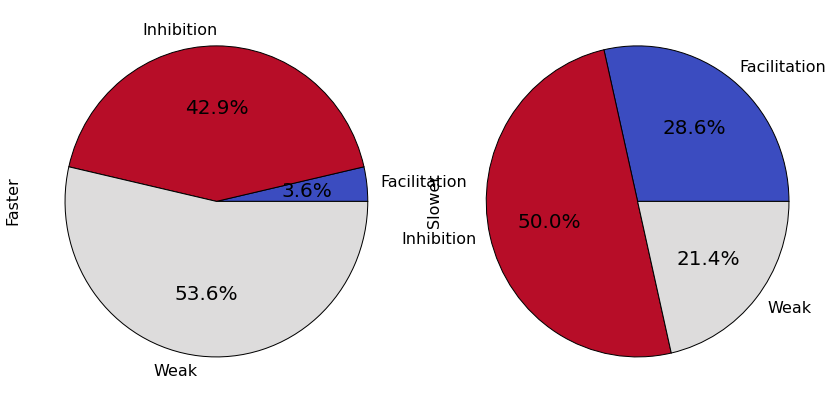

In [368]:
cs = [cm.coolwarm(x) for x in [0,.99,.5]]
effect_counts = effect_by_r.apply(lambda x:x.value_counts()).sort_index()
effect_counts.plot(kind='pie', subplots=True, figsize=(12,6), legend=False, 
                   autopct='%1.1f%%', colors=cs)
tight_layout()

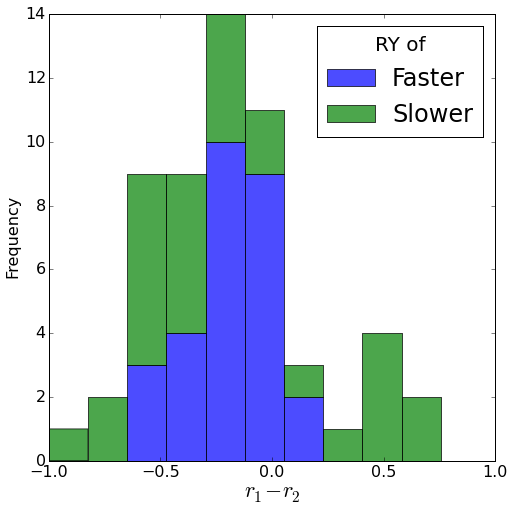

In [377]:
fig, ax = subplots(figsize=(8,8)) 
ry_by_r.plot(ax=ax, alpha=.7, kind='hist', stacked=True)
ax.legend(loc=0, title='RY of')
ax.set_xlim(-1,1)
ax.set_xlabel('$r_1 - r_2$', size=22)

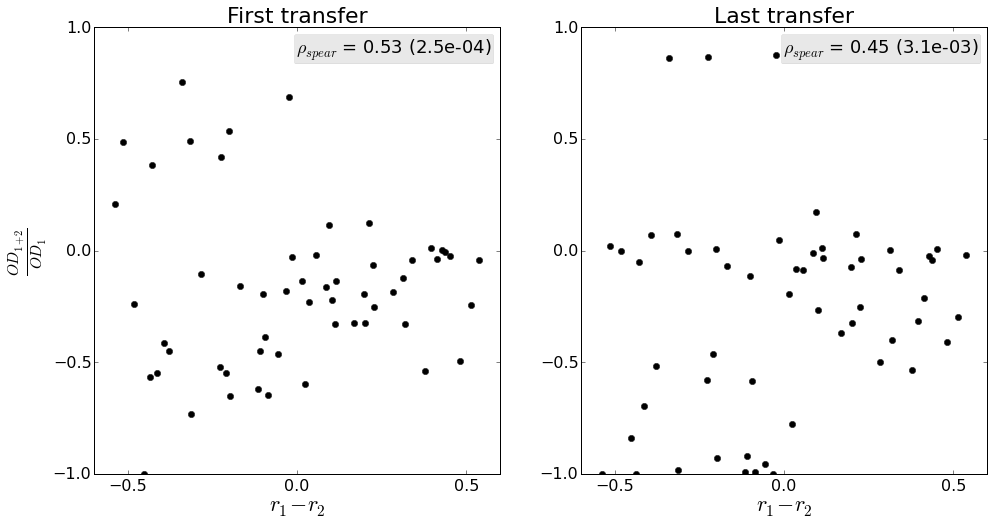

In [288]:
from itertools import permutations

ts = 1,5
fig, axs = subplots(1,2, figsize=(2*8,8))
dr = zeros(8*7)
RY = dr.copy()
for t,ax in zip(ts,axs):
    for i,(s1,s2) in enumerate(permutations(species,2)):
        r1, r2 = logistic_params.loc[s1, 'r'], logistic_params.loc[s2, 'r']
        dr[i] = r1-r2
        RY[i] = pair_ry.loc[t,s1,s2]

    ax.plot(dr, RY, 'ok')
    ax.set_ylim(-1,1)
    ax.set_xlabel('$r_1 - r_2$', size=22)
    ax.set_xticks([-.5,0,.5])

    ind = RY<0
    spear, pval = stats.spearmanr(dr[ind], RY[ind])
    ax.text(0.98, 0.98, r'$\rho_{spear}$ = %.2f (%.1e)'%(spear,pval),
             ha='right', va='top', size=18, transform=ax.transAxes,
             bbox=dict(facecolor='lightgray', alpha=0.5, lw=0.1, boxstyle='round,pad=.1'))

axs[0].set_title('First transfer', size=22)
axs[1].set_title('Last transfer', size=22)
axs[0].set_ylabel(r'$\frac{OD_{1+2}}{OD_1}$', size=22)

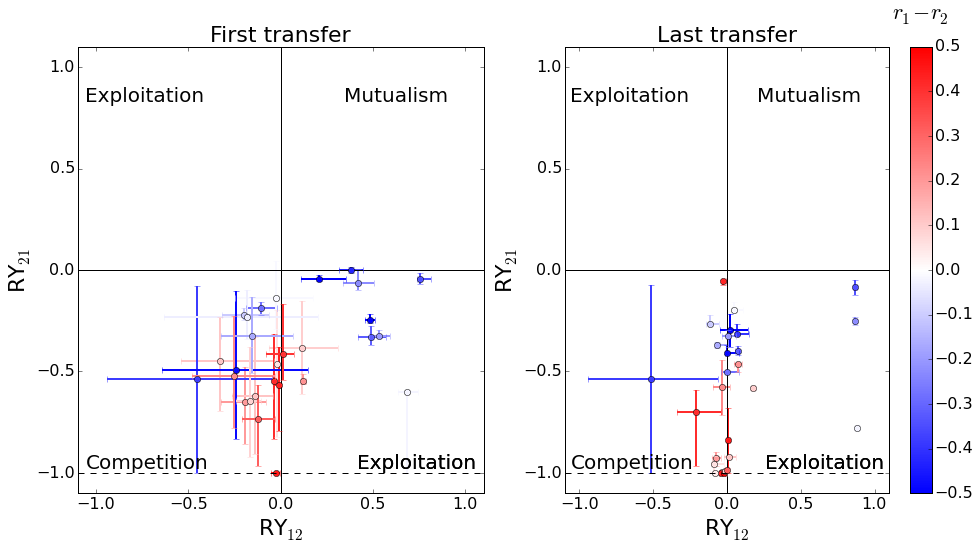

In [272]:
from pysurvey.plotting.Beautification import spine_placement

c = 'DarkGrey'
c2 = 'DarkRed'

norm = mpl.colors.Normalize(vmin=-.5, vmax=.5)
cmap = cm.bwr
m = cm.ScalarMappable(norm=norm, cmap=cmap)

def plot_RY(t,ax):
    for s1,s2 in combinations(species,2):
#         i,j = s1,s2
        if pair_ry.loc[t,s1,s2] > pair_ry.loc[t,s2,s1]:
            i,j = s1, s2
        else:
            i,j = s2,s1
        x, y = pair_ry.loc[t,i,j], pair_ry.loc[t,j,i]
    #     xerr, yerr = pair_ry_std.loc[i,j], pair_ry_std.loc[j,i]

        xerr =  zip( abs((x - array([pair_ry_low.loc[t,i,j], pair_ry_high.loc[t,i,j]]) )) )
        yerr =  zip( abs((y - array([pair_ry_low.loc[t,j,i], pair_ry_high.loc[t,j,i]]) )) )
        
        r1, r2 = logistic_params.loc[i, 'r'], logistic_params.loc[j, 'r']
        dr = r1-r2
        
        ax.errorbar(x,y, xerr=xerr, yerr=yerr, c=m.to_rgba(dr), fmt='o', elinewidth=2)


    limx = (-1.1,1.1)
    limy = (-1.1, 1.1)
    ax.set_xlim(limx)
    ax.set_ylim(limy)

    ax.set_xticks([-1,-.5,0,.5,1])


    ax.set_xlabel( 'RY$_{12}$', size=22)
    ax.set_ylabel( 'RY$_{21}$', size=22)
    ax.hlines(0, *limx)
    ax.vlines(0, *limy)

    ax.plot(limx, [-1,-1], 'k--')

    ax.text(.9,.9, 'Mutualism', ha='right', va='top')
    ax.text(-1.05, -1, 'Competition', ha='left', va='bottom')
    ax.text(1.05, -1, 'Exploitation', ha='right', va='bottom')
    ax.text(1.05, -1, 'Exploitation', ha='right', va='bottom')
    ax.text(-1.05, .9, 'Exploitation', ha='left', va='top')
    
    
fig, axs = subplots(1,2, figsize=(2*8,8))
plot_RY(1,axs[0])
plot_RY(5,axs[1])

axs[0].set_title('First transfer', size=22)
axs[1].set_title('Last transfer', size=22)

cax,kw = mpl.colorbar.make_axes(axs[1])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)
cax.set_title('$r_1 - r_2$', size=22, y=1.05)
cb.ax.set_yticks([-.5,0,.5])
cax

#### Intransitivities

In [72]:
## equilibrium fracs of the row species competing against the col species
fixed_points = pd.DataFrame(0, columns=species, index=species)
for i, v in outcomes_flat.iterrows():
    s1, s2, o, f = v.values
    fixed_points.loc[s1,s2] = f
    fixed_points.loc[s2,s1] = 1-f
fixed_points

Ea        Pa       Pch       Pci        Pf        Pp        Pv  \
Ea   0.000000  0.258180  0.326510  0.691489  0.470813  0.038636  0.047793   
Pa   0.741820  0.000000  0.488670  1.000000  0.767628  0.393642  0.521171   
Pch  0.673490  0.511330  0.000000  0.998996  1.000000  0.596401  0.651888   
Pci  0.308511  0.000000  0.001004  0.000000  0.889263  0.000000  0.004167   
Pf   0.529187  0.232372  0.000000  0.110737  0.000000  0.431037  0.329640   
Pp   0.961364  0.606358  0.403599  1.000000  0.568963  0.000000  0.997191   
Pv   0.952207  0.478829  0.348112  0.995833  0.670360  0.002809  0.000000   
Sm   0.003759  0.395890  0.475403  0.636151  0.571100  0.007716  0.292721   

           Sm  
Ea   0.996241  
Pa   0.604110  
Pch  0.524597  
Pci  0.363849  
Pf   0.428900  
Pp   0.992284  
Pv   0.707279  
Sm   0.000000

In [73]:
for s1,s2,s3 in combinations(species, 3):
    fp = array([fixed_points.loc[s1,s2], fixed_points.loc[s2,s3], fixed_points.loc[s3,s1]])
    n = len(where(fp>0.5)[0])
    if n==0:
        print s1,s2,s3, '\t', 1-fp
    elif n==3:
        print s1,s2,s3, '\t', fp

Ea Pci Pf 	[ 0.69148936  0.88926299  0.5291866 ]
Ea Pf Sm 	[ 0.5291866   0.57109974  0.9962406 ]


In [74]:
tmp = pair_ry + 1
fixed_points_ry = tmp/(tmp + tmp.T)
fixed_points_ry

Ea        Pa       Pch       Pci        Pf        Pp        Pv  \
Ea        NaN  0.156500  0.225053  0.056118  0.268914  0.040712  0.037734   
Pa   0.843500       NaN  0.489551  1.000000  0.725067  0.574022  0.622365   
Pch  0.774947  0.510449       NaN  0.976740  1.000000  0.730724  0.711682   
Pci  0.943882  0.000000  0.023260       NaN  0.992144  0.000000  0.107169   
Pf   0.731086  0.274933  0.000000  0.007856       NaN  0.671205  0.486169   
Pp   0.959288  0.425978  0.269276  1.000000  0.328795       NaN  0.996325   
Pv   0.962266  0.377635  0.288318  0.892831  0.513831  0.003675       NaN   
Sm   0.003265  0.240620  0.320272  0.040012  0.333564  0.007465  0.228508   

           Sm  
Ea   0.996735  
Pa   0.759380  
Pch  0.679728  
Pci  0.959988  
Pf   0.666436  
Pp   0.992535  
Pv   0.771492  
Sm        NaN

In [75]:
for s1,s2,s3 in combinations(species, 3):
    fp = array([fixed_points_ry.loc[s1,s2], fixed_points_ry.loc[s2,s3], fixed_points_ry.loc[s3,s1]])
    n = len(where(fp>0.5)[0])
    if n==0:
        print s1,s2,s3, '\t', 1-fp
    elif n==3:
        print s1,s2,s3, '\t', fp

Pci Pf Pp 	[ 0.9921436   0.67120487  1.        ]
Pf Pp Pv 	[ 0.67120487  0.99632545  0.51383053]


In [76]:
for s1,s2,s3 in combinations(species, 3):
    t = array([pair_ry.loc[s1,s2]-pair_ry.loc[s2,s1],
           pair_ry.loc[s2,s3]-pair_ry.loc[s3,s2],
           pair_ry.loc[s3,s1]-pair_ry.loc[s1,s3],
           ])
    
    n = len(where(t>0)[0])
    if n==0:
        print s1,s2,s3, '\t', t
    elif n==3:
        print s1,s2,s3, '\t', t

Pci Pf Pp 	[ 15.90145439   0.57375773   0.96752967]
Pf Pp Pv 	[ 0.57375773  0.9814429   0.05158063]


In [77]:
sps = ['Pci', 'Pf', 'Pp']
pair_ry.loc[sps,sps]

Pci         Pf        Pp
Pci       NaN  15.028377 -1.000000
Pf  -0.873077        NaN  0.124702
Pp  -0.032470  -0.449056       NaN

#### Species competitive rank

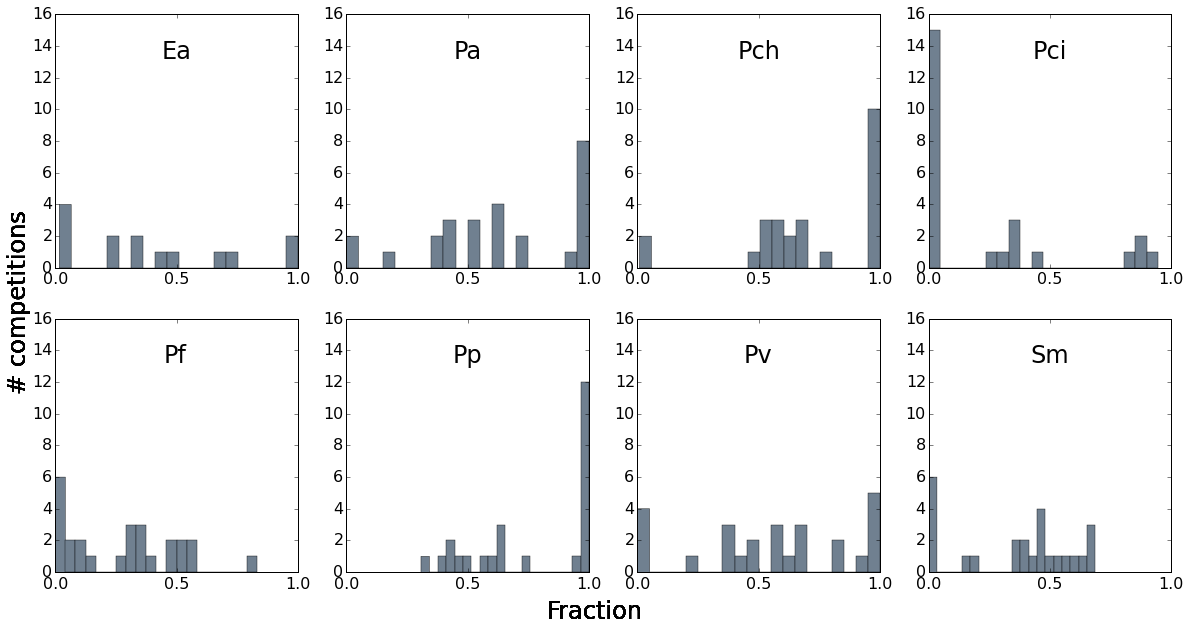

In [50]:

def get_species_fracs(fracs, i):
    zr  = pd.concat([ fracs.iloc[:i,i,i], fracs.iloc[i+1:,i,i] ])
    zc  = pd.concat([ fracs.iloc[i,:i,i], fracs.iloc[i,i+1:,i] ])
    z = pd.concat([zr,zc])
    return z


nr, nc = (2,4)
fig, axs = subplots(nr,nc, figsize=(nc*5,nr*5))    
for i, sp in enumerate(species):
    r, c = unravel_index(i, (nr, nc))
    species_fracs1 = get_species_fracs(pair_fracs_masked[1].iloc[-1], i)
    species_fracs2 = get_species_fracs(pair_fracs_masked[2].iloc[-1], i)
    species_fracs = pd.concat([species_fracs1, species_fracs2])
    ax = axs[r,c]
    species_fracs.hist(ax=ax, bins=20, alpha=1, fc='slategray', lw=.4)
#     species_fracs2.hist(ax=ax, bins=20, alpha=.7
    ax.text(0.5, .9, sp, ha='center', va='top', size=24, transform=ax.transAxes)
#     ax.set_title(sp, fontsize=24)
    ax.set_ylim(0,16)
    ax.set_xticks([0,0.5,1])
#     ax.set_yticks([0,2,4])
    ax.grid()
    
    fig.text(0.5, 0.07, 'Fraction', va='center', ha='center', size=24)
    fig.text(0.1, 0.5, '# competitions', va='center', ha='center', size=24, rotation=90)

In [7]:
param_file = '2015-01-01.EXP_25-Pairwise_competition/params_lv_rows.txt'
logistic_params = pd.read_csv(param_file, index_col=0)
logistic_params.index = species
logistic_params

tau         r         k        err
Ea    2.523822  0.455114  0.146856   5.667649
Pa    3.653114  0.550650  0.105767   7.795284
Pch  19.952178  0.171285  0.065286  20.792418
Pci   5.560203  0.114129  0.007801   5.302813
Pf    0.000000  0.137238  0.056314  20.015729
Pp    0.000000  0.652300  0.154193   5.188304
Pv    3.796915  0.566098  0.101936  15.928922
Sm    1.281825  0.339006  0.110969   6.296708

In [8]:
def update_stats(sp, f, n_competitions, n_survive, tot_frac):
    if f.sum(): #if there's data about the competition
        n_competitions[sp] += 1
        species_frac = f[sp]
        tot_frac[sp] += species_frac
        if species_frac>0:  # if species survived
            n_survive[sp] += 1

def get_stats(rep):
    for i,sp in enumerate(species):
        for j in range(8):
            if i==j: 
                continue
            else:
                f1 = pair_fracs_masked[rep].iloc[-1,i,j]
                f2 = pair_fracs_masked[rep].iloc[-1,j,i]
                update_stats(sp, f1, n_competitions[rep], n_survive[rep], tot_frac[rep])
                update_stats(sp, f2, n_competitions[rep], n_survive[rep], tot_frac[rep])
    
            
n_competitions = pd.DataFrame(zeros((8,2)), columns=[1,2],index=species)
n_survive = n_competitions.copy()
tot_frac  = n_competitions.copy()

for rep in [1,2]:
    get_stats(rep)

f_survive = n_survive.div(n_competitions)       
avg_frac  = tot_frac.div(n_competitions)                 

NameError: global name 'pair_fracs_masked' is not defined

In [9]:
species_props = pd.DataFrame(zeros((8,4)), index=species, columns=['r', 'k', 'f_survival', '<frac>'])
species_props['r'] = logistic_params['r']
species_props['k'] = logistic_params['k']

species_props['f_survival'] = f_survive.mean(axis=1)
species_props['<frac>'] = avg_frac.mean(axis=1)/f_survive.mean(axis=1) # <frac> \ survival
species_props['<frac>'] = avg_frac.mean(axis=1) # <frac>

species_props

NameError: name 'f_survive' is not defined

In [84]:
propr_spearman = species_props.corr('spearman')
propr_spearman

r         k  f_survival    <frac>
r           1.000000  0.785714    0.609938  0.738095
k           0.785714  1.000000    0.683130  0.571429
f_survival  0.609938  0.683130    1.000000  0.853913
<frac>      0.738095  0.571429    0.853913  1.000000

SpearmanrResult(correlation=-0.018974508175263145, pvalue=0.92365207546398609)

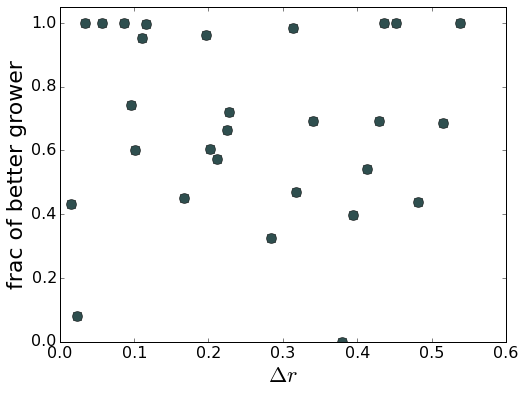

In [83]:
n = 28
r_diff = zeros(n)
k_diff = zeros(n)
frac_max = zeros(n)
for i, (s1,s2) in enumerate(combinations(species,2)):
    r1, r2 = species_props.loc[[s1,s2], 'r']
    k1, k2 = species_props.loc[[s1,s2], 'k']
    r_diff[i] = abs(r1-r2)
    k_diff[i] = abs(k1-k2)
    s = s1 if r1>r2 else s2
#     s = s1 if k1>k2 else s2
    frac_max[i] = masked_avg.loc[s1,s2, s]

x,y = r_diff, frac_max
fig, ax = subplots(figsize=(8,6))
ax.plot(x,y, 'o', ms=10, color='darkslategray')
ax.set_ylim(0, 1.05)
# ax.set_xlabel('$\Delta K$', size=22)
ax.set_xlabel('$\Delta r$', size=22)
ax.set_ylabel('frac of better grower', size=22)

stats.spearmanr(x,y)

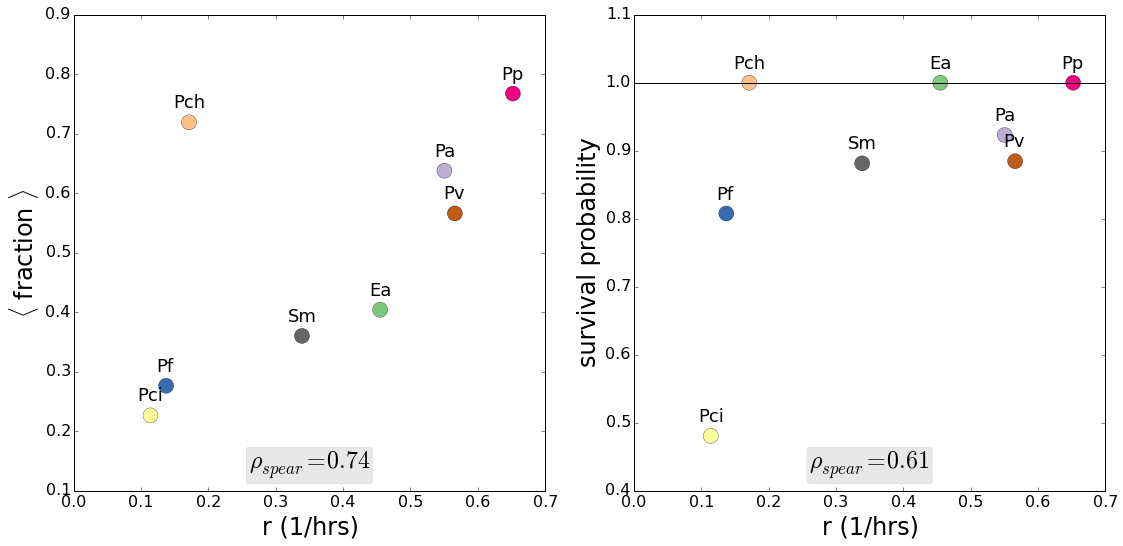

In [232]:
label_d = {
'r': 'r (1/hrs)',
'<frac>': r'$\langle$ fraction | survival $\rangle$',
'<frac>': r'$\langle$ fraction $\rangle$',
'f_survival': r'survival probability',
'k' : 'k (OD$_{600}$)'
}

fs = 24 
fig, axs = subplots(1,2, figsize=(2*8,8))
for i, pair in enumerate([('r', '<frac>'), ('r', 'f_survival')]):
    p1,p2 = pair
    ax = axs[i]
    x_vals = species_props[p1]
    y_vals = species_props[p2]
    ax.scatter(x_vals, y_vals, c=range(8), cmap=cm.Accent, s=15**2, lw=.3)

    for k, x in x_vals.iteritems():
        y = y_vals[k]
        ax.annotate(k, (x,y),
                    ha='center', va='bottom',
                    xytext=(0,10), textcoords='offset points',
                    family='sans-serif', fontsize=18, color='k')

    ax.text(0.5, 0.02, r'$\rho_{spear} = %.2f$'%propr_spearman[p1][p2],
             ha='center', va='bottom', size=24, transform=ax.transAxes,
             bbox=dict(facecolor='lightgray', alpha=0.5, lw=0.1, boxstyle='round,pad=.1'))


    ax.set_xlabel(label_d[p1], fontsize=fs)
    ax.set_ylabel(label_d[p2], fontsize=fs)

# lim = [0,.2]
# axs[0].plot([d]*2, lim, '--k', lw=2)
# axs[0].set_ylim(lim)

ax.set_xlim(0,.7)
ax.plot(ax.get_xlim(), [1,1], lw=1, color='k')

tight_layout()

### Trios

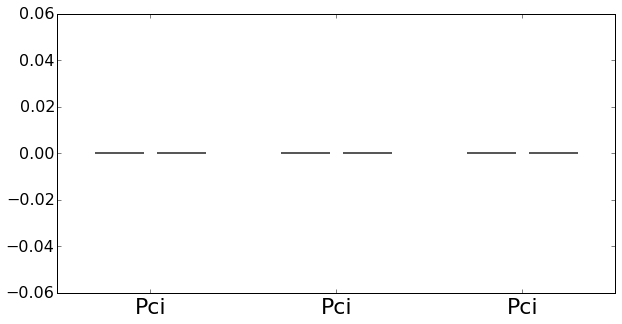

In [66]:
from pysurvey.plotting.Bars import multibar
from itertools import permutations

@interact(s1=(0,7), s2=(0,7), s3=(0,7))
def plot_trio(s1, s2, s3):
    sps = (s1,s2,s3)
    sps_names = [species[s] for s in sps]
    vals = pd.concat([last_fracs.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T

    lefts = arange(3)*3
    pos_t = repeat(lefts, 2)
    offset = 1
    pos = pos_t + [0, offset]*3
    centers = lefts + offset/2.

    cmap = cm.Accent
    fig, ax = subplots(figsize=(10,5))
    bars = multibar(pos, vals, cmap=cmap, ax=ax)

    ax.set_xticks(centers)
    ax.set_xticklabels(sps_names, size=22)

In [67]:
trio_layout = 0*last_counts.copy()
for p in range(8):
    for i in range(8):
        for j in range(8):
            trio_layout.iloc[p,i,j, [i,j,p]] = 1
            trio_layout.iloc[p,j,i, [i,j,p]] = 1
trio_layout = trio_layout==1

In [68]:
last_counts_masked = last_counts.copy()
last_fracs_masked = last_fracs.copy()
n,m,k = last_counts_masked.shape[:-1]
for p in range(n):
    for i in range(m):
        for j in range(k):
            ind = trio_layout.iloc[p,i,j]
            s_in  =  last_counts.iloc[p,i,j][ind].sum()
            s_out =  last_counts.iloc[p,i,j][~ind].sum()
            if (s_in==0) or (s_out>0):
                if p and j<8:
#                     print p,i,j
                    print species[p], species[i], species[j]
                last_counts_masked.iloc[p,i,j] = nan 
                last_fracs_masked.iloc[p,i,j] = nan 

Pa Pp Pf
Pch Pci Pf
Pch Pf Pa
Pch Pp Pa
Pch Pp Pf
Pch Pv Pf
Pch Sm Ea
Pch Sm Pch
Pch Sm Pci
Pch Sm Pp
Pci Pci Pci
Pci Pf Ea
Pp Pp Pci


In [69]:
import cPickle as pickle

last_fracs_masked_dict = {}
for j in  last_fracs_masked.labels:
    last_fracs_masked_dict[j] = last_fracs_masked[j]

f = open('2015-05-21.EXP_34-Trio_competition/last_fracs_masked.pick','w')

pickle.dump(last_fracs_masked_dict, f)
f.close()

In [70]:
for s1,s2 in combinations(species,2):
    o = outcomes.loc[s1,s2]
    if o in species:
        sps = [species.index(s) for s in [s1,s2]]
        loser_ind = species.index(s2) if o==s1 else species.index(s1)
        i,j = sps
        tmp = last_fracs_masked.iloc[:,i,j,loser_ind]
        vals = tmp.drop(tmp.index[sps])
        print s1,s2,o, len(where(vals>.05)[0])

Ea Sm Ea 2
Pa Pci Pa 0
Pch Pci Pch 0
Pch Pf Pch 2
Pci Pp Pp 0
Pci Pv Pv 0
Pp Pv Pp 2
Pp Sm Pp 2


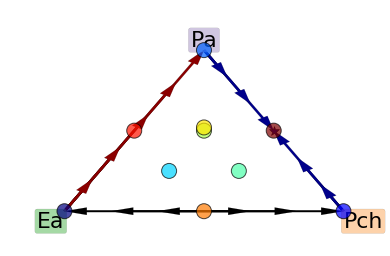

In [10]:


class TernPloter(object):
    
    def __init__(self, ax=None, scale=1, species_colors=None, net=None):
        self.ax   = ax
        self.scale = scale
        self.species_colors = species_colors
        self.net = net
        
        opt = {'head_width': 0.04, 'head_length': 0.08, 'width': 0.01,
                'length_includes_head': True, 'ec':'k', 'linewidth':.1}
        self.boundry_kwargs = {'dominance': dict(color='DarkRed', **opt),
                               'coexistence': dict(color='DarkBlue', **opt),
                               'bistability': dict(color='k', **opt),
                               'NA': dict(color='gray', linewidth=1),
                               }
        
    def get_barycentric_coords(self, frame):
        '''
        '''
        if frame.shape[1] !=3:
            raise ValueError, 'frame must have exactly 3 columns.'
        try:
            vals = frame.values
        except AttributeError:
            vals = frame

        scale = self.scale
        (a,b,c) = [vals[:,i] for i in range(3)]
        x = 0.5 * ( 2.*b+c ) / ( a+b+c )
        y = 0.5*sqrt(3) * c / (a+b+c)
        xy = scale*array([x,y]).T
        return pd.DataFrame(xy, columns=['x', 'y'])

    def get_vertices(self):
        vals = array([[1,0,0],
                      [0,1,0],
                      [0,0, 1]])
        return self.get_barycentric_coords(vals)
    
    
    def _remove_axis(self, e=.1):
        ax = self.ax
        lim = (-e, self.scale+e)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.axis('off')
    
    def plot_boundry(self, labels=None, **kwargs):
        if self.ax is None:
            fig, ax = subplots(figsize=(6,6))
            self.ax = ax
        verts = self.get_vertices()
        verts.loc[4] = verts.loc[0]
        kwargs.setdefault('lw',2)
        kwargs.setdefault('c','k')
        boundry = ax.plot(verts['x'], verts['y'], **kwargs)
        self._remove_axis()
        if labels is not None:
            self.label_vertices(labels)
        return boundry
    
#     def _plot_arrows(self, origin, target, fs=None, n=4, **kwargs):
#         ax = self.ax
#         if fs is None:
#             fs = linspace(0,1,n+1)
#         for i,f in enumerate(fs):
#             target_x = f*origin.loc['x'] + (1-f)*target.loc['x']
#             target_y = f*origin.loc['y'] + (1-f)*target.loc['y']
#             ax.annotate( '', 
#                 xy=(target_x,target_y), xycoords='data',        #target point
#                 xytext=origin, textcoords='data', #origin point
#                 arrowprops=dict( **kwargs)
# #                 arrowprops=dict(arrowstyle="->", **kwargs)
#                 )

    def _plot_arrows(self, origin, target, fs=None, n=4, **kwargs):
        ax = self.ax
        if fs is None:
            fs = linspace(0,1,n+1)[:-1]
        for i,f in enumerate(fs):
            target_x = f*origin.loc['x'] + (1-f)*target.loc['x']
            target_y = f*origin.loc['y'] + (1-f)*target.loc['y']
            ax.arrow(origin['x'], origin['y'], target_x-origin['x'], target_y-origin['y'], **kwargs)
    
    def plot_net_boundry(self, labels, label_vertices=True, labels_kwargs=dict()):
        if self.net is None:
            return self.plot_boundry(labels)
        else:
            net = self.net
        if self.ax is None:
            fig, ax = subplots(figsize=(6,6))
            self.ax = ax
        else:
            ax = self.ax
        verts = self.get_vertices()
        verts.index = labels
        for s1,s2 in net.edges():
            edge = net[s1][s2]
            o =  edge['outcome']
            if o in labels: #if dominance
                origin = s2 if o==s1 else s1
                target = o
                n = 5
                self._plot_arrows(verts.loc[origin], verts.loc[target], n=n, **self.boundry_kwargs['dominance'])
            elif o=='bistability':
                middle = verts.loc[[s1,s2]].mean()
                n = 3
                self._plot_arrows(middle, verts.loc[s1], n=n, **self.boundry_kwargs[o])
                self._plot_arrows(middle, verts.loc[s2], n=n, **self.boundry_kwargs[o])
            elif o=='coexistence':
                t = pd.DataFrame(zeros((1,3)), columns=labels)
                t[s1] = edge['fraction']
                t[s2] = 1-edge['fraction']
                fixed_point= self.get_barycentric_coords(t).loc[0]
                n = 3
                self._plot_arrows(verts.loc[s1], fixed_point, n=n, **self.boundry_kwargs[o])
                self._plot_arrows(verts.loc[s2], fixed_point, n=n, **self.boundry_kwargs[o])
                ax.plot(fixed_point['x'], fixed_point['y'], '*k', ms=10, c=self.boundry_kwargs[o]['color'])          
            else:
                ax.plot(verts.loc[(s1,s2), 'x'], verts.loc[(s1,s2), 'y'], **self.boundry_kwargs[o])
        if label_vertices:
            self.label_vertices(labels, **labels_kwargs)
        self._remove_axis()
        
    def label_vertices(self, labels, **kwargs):
        verts = self.get_vertices()
        ax = self.ax
        if self.species_colors is not None:
            bboxes=[dict(facecolor=self.species_colors[l], alpha=0.7, lw=0.1, boxstyle='round,pad=.1') for l in labels]
        else:
            bboxes = [None]*3
        vas = ['top', 'top', 'bottom']
        has = ['right', 'left', 'center']
        kwargs.setdefault('color','k')
        kwargs.setdefault('size', 'x-large')
        for i in range(3):
            ax.text(verts.iloc[i,0], verts.iloc[i,1], labels[i], va=vas[i], ha=has[i], 
                    bbox=bboxes[i], **kwargs)
    
    def plot(self, frame, plot_func='scatter', labels_kwargs=dict(), **kwargs):
        self.plot_net_boundry(frame.columns, labels_kwargs=labels_kwargs)
        xy = self.get_barycentric_coords(frame)
        func = getattr(self.ax, plot_func)
        out = func(xy['x'], xy['y'], zorder=10, **kwargs)
        return out
        
a = array([[1,0,0],
           [0,1,0],
           [0,0,1],
           [.5,.25,.25,],
           [.25,.5,.25,],
           [.25,.25,.5,],
           [.24,.24,.52,],
           [.5,.5,0],
           [.5,0,.5],
           [0,.5,.5],
           ])

net = nx.Graph()
# net.add_nodes_from(tmp.columns)
net.add_edge('Ea', 'Pa', outcome='Pa',)
net.add_edge('Ea', 'Pch', outcome='bistability',)
net.add_edge('Pch', 'Pa', outcome='coexistence', fraction=.5)

frame = pd.DataFrame(a, columns=['Ea','Pch','Pa'])

species_colors_d = {species[i]:species_colors[i] for i in range(8) }

fig, ax = subplots()
tp = TernPloter(scale=1, species_colors=species_colors_d, net=net, ax=ax)
# tp.plot_net_boundry(['Ea','Pch','Pa'], label_vertices=False)
labels_kwargs = {'size':22}
tp.plot(frame, marker='o', s=15**2, alpha=.7, c=array2colors(arange(a.shape[0]), cmap=cm.jet), 
        labels_kwargs=labels_kwargs)

In [89]:
trios2plot_sorted = []
for i,trio in trios2plot.iterrows():
    sps_names = trio.values
    for layout in sorted_layouts:
        match = filter(lambda l: all([s in l for s in sps_names]), layout)
        if match:
            trios2plot_sorted.append(match[0])
            continue

NameError: name 'trios2plot' is not defined

In [66]:
outpath = '2015-05-21.EXP_34-Trio_competition/'

trios2plot_sorted = (['Ea','Pa','Pf'],)
for sps_names in trios2plot_sorted:
    sps = [species.index(s) for s in sps_names]
    
    fig, ax = subplots(figsize=(6,6))
    vals = pd.concat([last_fracs_masked.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)
    
    cs = repeat([species_colors[s] for s in sps], 2)
    labels_kwargs = {'size':24}
    tp = TernPloter(species_colors=species_colors_d, net=net, ax=ax)
    tp.plot(vals, marker='o', lw=1, s=12**2, alpha=.7, c=cs, labels_kwargs=labels_kwargs)
    
    fname = outpath + 'trio_outcomes.' + '_'.join(sps_names) + '.png'
    fig.savefig(fname, dpi=300)
    fig.clear()

        Pch  Sm        Ea
1       NaN NaN       NaN
8  0.666667   0  0.333333
1  0.621053   0  0.378947
3  0.663366   0  0.336634
8       NaN NaN       NaN
3       NaN NaN       NaN


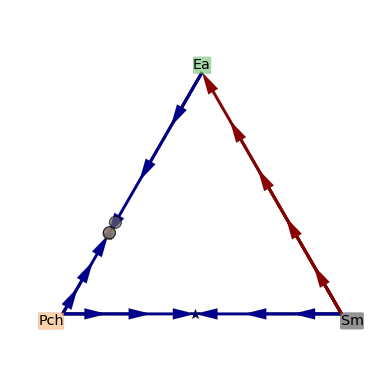

In [80]:
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

# @interact(s1=(0,7), s2=(0,7), s3=(0,7))
def plot_trio(s1, s2, s3):
    sps = (s1,s2,s3)
    sps_names = [species[s] for s in sps]
    vals = pd.concat([last_fracs_masked.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)
    print vals
    
    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net)
    tp.plot(vals, marker='o', lw=1, s=12**2, alpha=.7, c=cs)
    
plot_trio(2, 7, 0)

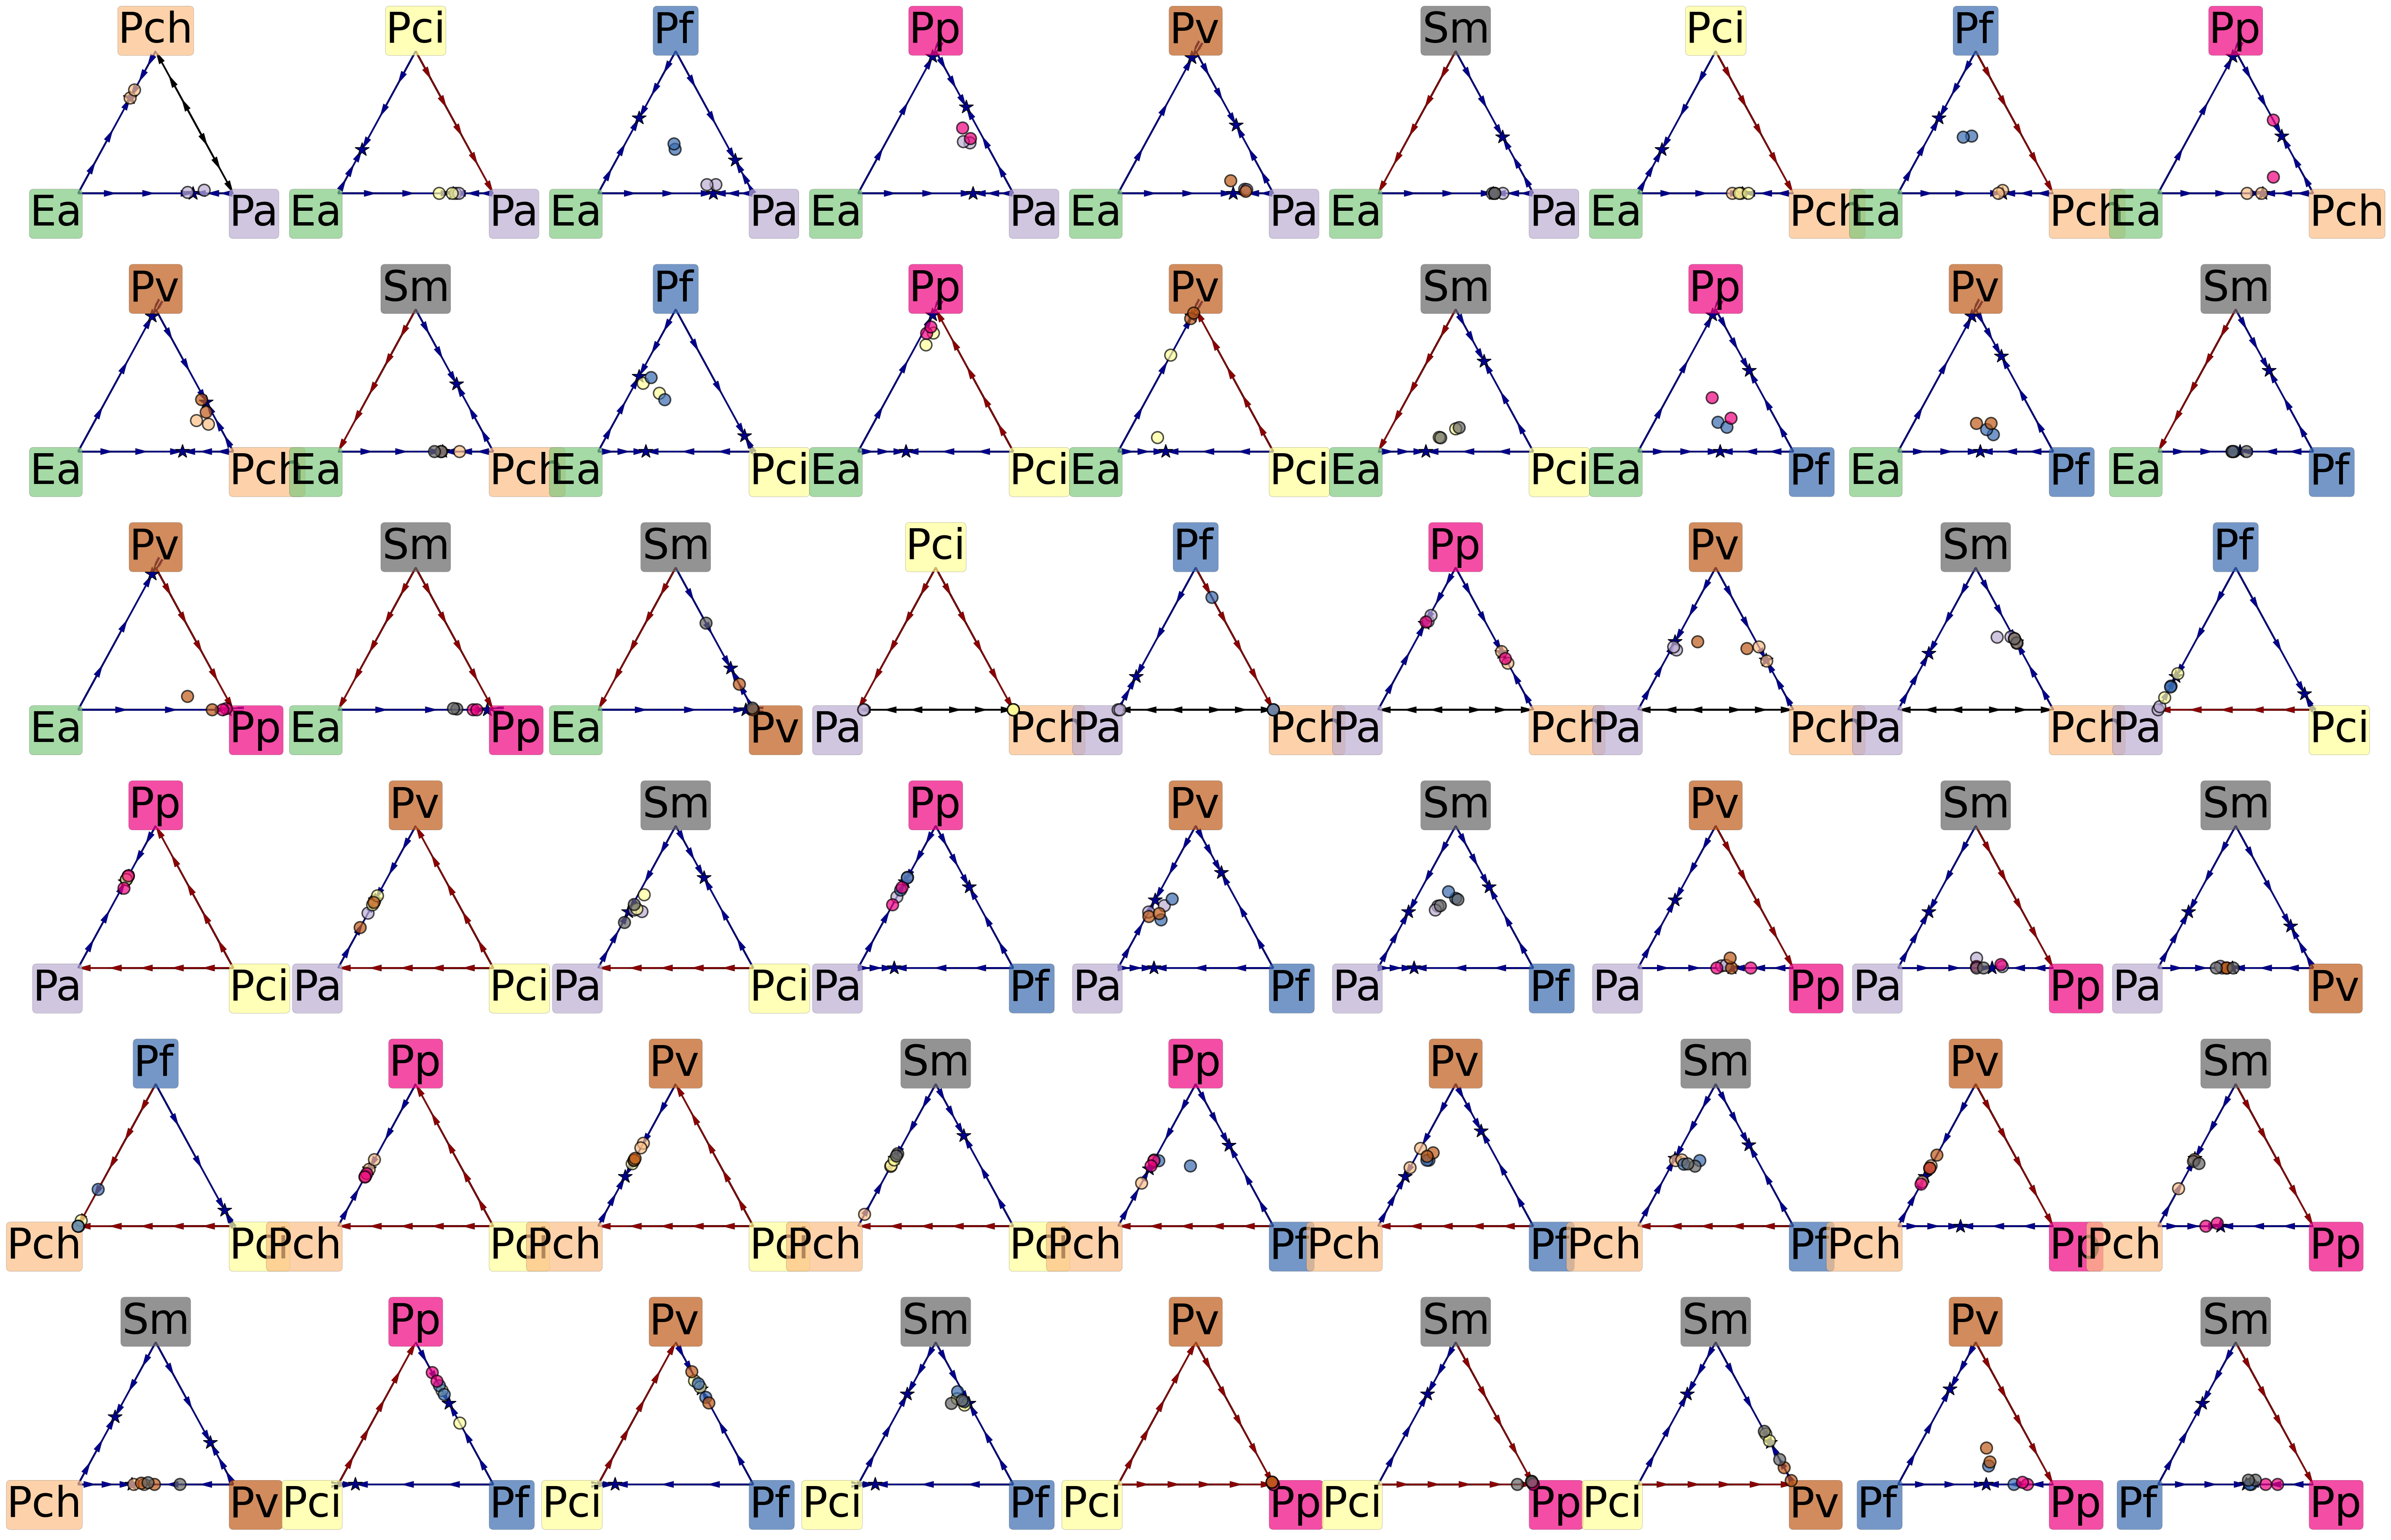

In [65]:
nr, nc = 6,9
# nr, nc = 2,2
w = 2.5
fig, axs = subplots(nr, nc, figsize=(nc*w, nr*w))
for ax, sps in zip(axs.flat, combinations(range(8), r=3)):
    sps_names = [species[s] for s in sps]
    vals = pd.concat([last_fracs.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)
    
    
    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net, ax=ax)
    tp.plot(vals, marker='o', lw=1, s=8**2, alpha=.7, c=cs)
# subplots_adjust(wspace=.5)
tight_layout()

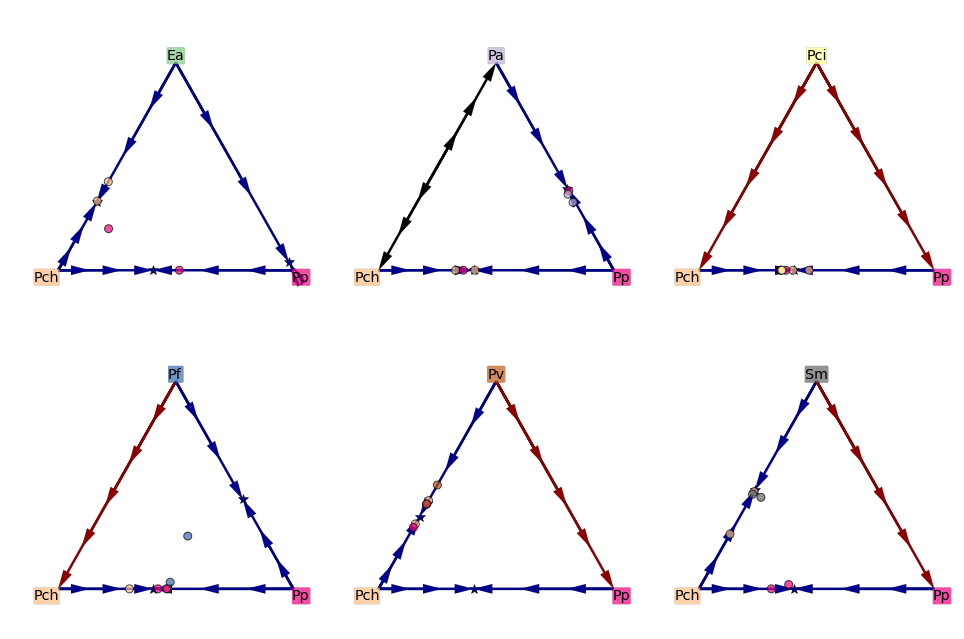

In [83]:
nr, nc = 2,3
w = 4.5
s1, s2 = (2,5)
others = set(range(8)) - set([s1,s2])
fig, axs = subplots(nr, nc, figsize=(nc*w, nr*w))
for ax, s3 in zip(axs.flat, others):
    sps = (s1,s2,s3)
    sps_names = [species[s] for s in sps]
    vals = pd.concat([last_fracs.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)
    
    
    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net, ax=ax)
    tp.plot(vals, marker='o', lw=1, s=8**2, alpha=.7, c=cs)
# subplots_adjust(wspace=.5)
tight_layout()

#### Classify Trios

In [97]:
def get_edges(net, nodes):
    edges = []
    for n1,n2 in combinations(nodes, 2):
        e = net[n1][n2]['outcome']
        if e==n1:
            e = 1
        elif e==n2:
            e = 2
        edges.append(e)
    return edges

def find_network_alignment(sps1, sps2, outcomes):
    tmp = outcomes.reindex(sps1,sps1)
    net1 = make_interaction_network(tmp, masked_avg)
    
    tmp  = outcomes.reindex(sps2,sps2)
    net2 = make_interaction_network(tmp, masked_avg)
    
    e1 = get_edges(net1, sps1)
    matches = []
    for s2 in permutations(sps2, 3):
        if e1 == get_edges(net2, s2):
            matches.append(s2)
    if not matches:
        return None
    
    asps1 = array(sps1)
    species_matches = [nonzero(asps1==array(m))[0].shape[0] for m in matches]
#     print matches
    return matches[argmax(species_matches)]

sps1 = ('Pp', 'Pch', 'Pa')
sps2 = ('Pp', 'Pch', 'Pa')
find_network_alignment(sps1, sps2, outcomes)

('Pp', 'Pch', 'Pa')

In [98]:
f_outcomes = n_outcomes/n_outcomes.sum()
outcomes_rand = outcomes.copy()
random_os = random.choice(['COX', 'BIS', 'DOM'], size=28, p=f_outcomes.values)

for i,(s1,s2) in enumerate(combinations(species,2)):
    o = random_os[i]
    if o=='DOM':
        o = s1 if rand()>0.5 else s2
    outcomes_rand.loc[s1,s2] = o
    outcomes_rand.loc[s2,s1] = o
outcomes_rand    

Ea   Pa  Pch  Pci   Pf   Pp   Pv   Sm
Ea    Ea  COX   Ea   Ea  COX  COX  COX  COX
Pa   COX   Pa  COX  Pci  COX   Pa  COX  COX
Pch   Ea  COX  Pch  COX  COX  Pch  COX  COX
Pci   Ea  Pci  COX  Pci  BIS   Pp  Pci  COX
Pf   COX  COX  COX  BIS   Pf   Pf   Pv  COX
Pp   COX   Pa  Pch   Pp   Pf   Pp   Pp   Sm
Pv   COX  COX  COX  Pci   Pv   Pp   Pv  COX
Sm   COX  COX  COX  COX  COX   Sm  COX   Sm

In [99]:
layouts = []
for sps in combinations(species, r=3):
    if not layouts:
        layouts.append([sps])
        continue
    match_found = False
    for layout in layouts:
        match = find_network_alignment(layout[0], sps, outcomes)
        if match:
            layout.append(match)
            match_found = True
            break
    if not match_found:
        layouts.append([sps])
sorted_layouts = sorted(layouts, key=len, reverse=True)
[len(l) for l in sorted_layouts]

[26, 15, 5, 4, 3, 1, 1, 1]

In [100]:
## rotate layouts to match Zeeman paper
j = 0
n = len(sorted_layouts[j])
for i in range(n):
    l = sorted_layouts[j][i]
    sorted_layouts[j][i] = (l[-1],) + l[:-1]

j = 3
n = len(sorted_layouts[j])
for i in range(n):
    l = sorted_layouts[j][i]
    sorted_layouts[j][i] =  l[1:] + (l[0],)    
    
j = 4
n = len(sorted_layouts[j])
for i in range(n):
    l = sorted_layouts[j][i]
    sorted_layouts[j][i] =  l[1:] + (l[0],)

In [101]:
trio_layouts_flat = pd.DataFrame( zeros((56,5)), columns=['species 1', 'species 2', 'species 3', 'layout', 'outcome'] )*nan
# for i,trio in enumerate(combinations(species, 3)):
#     sp1,sp2, sp3 = trio
n = 0
for i,layout in enumerate(sorted_layouts):
    for trio in layout:
        sp1, sp2, sp3 = trio
        trio_layouts_flat.iloc[n,:4] = [sp1,sp2,sp3,i+1]
        n+=1
        
#     o = outcomes.loc[sp1,sp2]
#     f1 = masked_avg.ix[sp1,sp2,sp1]
#     f2 = masked_avg.ix[sp2,sp1,sp1]
#     f = pd.Series([f1,f2]).mean()
#     outcomes_flat.ix[i] = [sp1, sp2, o, f]

trio_layouts_flat.to_csv('2015-05-21.EXP_34-Trio_competition/trio_layouts_flat.txt', index=False, float_format='%d')

In [102]:
## get the set of unique layouts
## convert to generic (species 1,2,3)
## and save
for i,layout in enumerate(sorted_layouts[:2]):
    sps_names = layout[0]
    sps = [species.index(s) for s in sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    print tmp

     Pci   Ea   Pa
Pci  Pci  COX   Pa
Ea   COX   Ea  COX
Pa    Pa  COX   Pa
     Ea   Pa   Pf
Ea   Ea  COX  COX
Pa  COX   Pa  COX
Pf  COX  COX   Pf


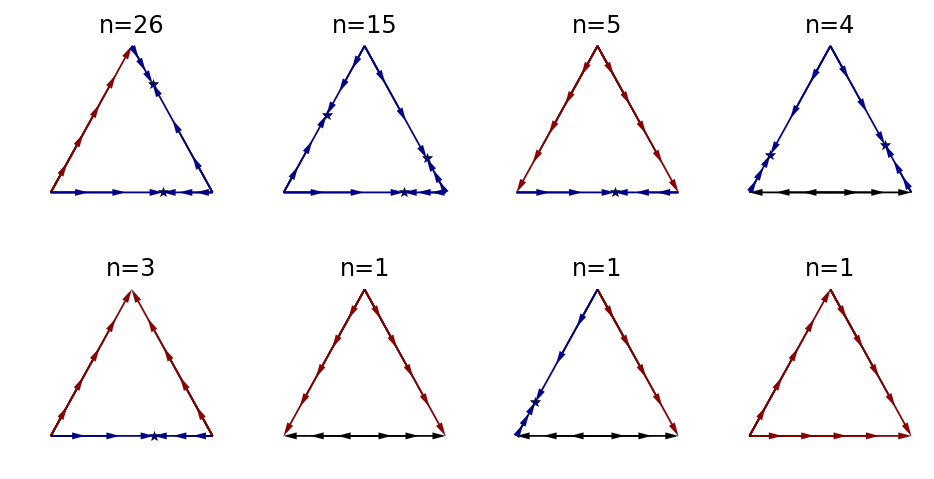

In [103]:
nr, nc = 2,4
w = 4
fig, axs = subplots(nr, nc, figsize=(nc*w, nr*w))
for i,layout in enumerate(sorted_layouts):
    r,c = unravel_index(i, (nr,nc))
    ax = axs[r,c]
    ind = 0 if i not in [2,4] else 1
    sps_names = layout[ind]
    sps = [species.index(s) for s in sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    vals = pd.concat([last_fracs.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    net = make_interaction_network(tmp, masked_avg)

    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net, ax=ax)
    tp.plot_net_boundry(sps_names, label_vertices=False)
#     tp.plot(vals, marker='o', lw=1, s=8**2, alpha=.7, c=cs)
    t = ax.set_title('n=%d'%len(layout), size=24)
    t.set_y(.85) 

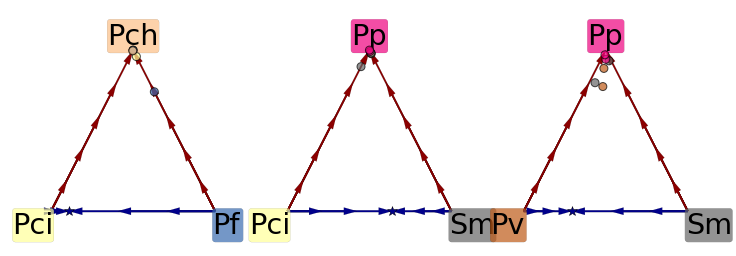

In [107]:
def plot_layout(layout):
    nl = len(layout)
    nr, rem = divmod(nl, max_cols)
    if rem>0: nr+=1
    nc = max_cols if nr>1 else rem
    
    fig, axs = subplots(nr,nc,figsize=(nc*w,nr*w), squeeze=False)
    for i, sps_names in enumerate(layout):
        r,c = unravel_index(i, (nr,nc))
        ax = axs[r,c]
        sps = [species.index(s) for s in sps_names]
        tmp = outcomes.reindex(sps_names,sps_names)
        vals = pd.concat([last_fracs.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
        net = make_interaction_network(tmp, masked_avg)
        cs = repeat([species_colors[s] for s in sps], 2)
        tp = TernPloter(species_colors=species_colors_d, net=net, ax=ax)
        tp.plot(vals, marker='o', lw=1, s=8**2, alpha=.7, c=cs)
    for ax in axs.flat:
        ax.axis('off')
  
n = len(layouts)
max_cols = 6
w = 4


def plot_layout_wrapper(l):
    layout = sorted_layouts[l]
    plot_layout(layout)
    
plot_layout_wrapper(4)

          Ea        Pa        Pv
Ea       NaN -0.736702 -0.959588
Pa  0.420353       NaN  0.116571
Pv  0.019135 -0.320838       NaN


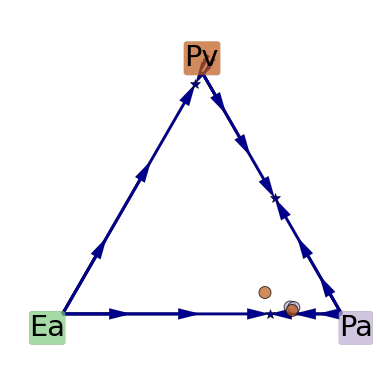

In [167]:
l = 1
layout = sorted_layouts[l]
n = len(layout)
@interact(i=(0,n-1))
def plot_trio(i):
    sps_names = layout[i]
    sps = [species.index(s) for s in sps_names]
    vals = pd.concat([last_fracs_masked.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)
#     print vals
    print pair_ry.iloc[sps,sps]
    
    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net)
    tp.plot(vals, marker='o', lw=1, s=12**2, alpha=.7, c=cs)

#### Quantitative predictions

- alpha values for time series
- triangles normalized to carrying capacity

In [11]:
import scipy.integrate as spi
from scipy.optimize import brute

def LV_fun(t, x, r, k, A):
    dx = r*x*(1-A.dot(x)/k)
    return dx

def LV_jac(t, x, r, k, A):
    R = c_[r,r]
    X = c_[x,x]
    K = c_[k,k]
    d = r*(1-A.dot(x)/k)
    J = -R*X*A/k + diag(d)
    return J

def integrate(fun, y0, t, args, jac=None):
    ode =  spi.ode(fun, jac)
    # BDF method suited to stiff systems of ODEs
    ode.set_integrator('vode', nsteps=500, method='bdf')
    ode.set_initial_value(y0,t[0])
    ode.set_f_params(*args)
    ode.set_jac_params(*args)

    nt = len(t)
    ys = [y0]
    for i in range(1, nt):
        t_step = t[i] - t[i-1]
        ode.integrate(ode.t + t_step)
        ys.append(ode.y)
    return array(ys)

def batch_simulate(derivative, x0, t_trans, n_trans, dil, nt_transfer=100, 
                   args=(), jac=None):
    '''
    
    derivative : callable
        Derivative function. 
    x0 : array
        Initial condition
    t_trans : float
        Length of each transfer.
    n_trans : int
        Number of transfers.
    dil : float
        Dilution factor.
    nt_transfer : int
        number of time points per transfer
    args : tuple
        Additional params passed to derivatives function.
    '''
    t_transfer = linspace(0,t_trans, nt_transfer)
    t = array([t_transfer+t_transfer[-1]*i for i in range(n_trans)]).flatten()
    x = zeros((len(t), len(x0)))
    for i in range(n_trans):
        xi = integrate(derivative, x0, t_transfer, args, jac=jac)
#         xi = odeint(derivative, x0, t_transfer, args=args)
        x[nt_transfer*i:nt_transfer*(i+1) ,:] = xi
        x0 = xi[-1]/float(dil)
    return x,t


def get_transfer_densities(x, nt_transfer, when='end'):
    if when=='end':
        return x[nt_transfer-1::nt_transfer]
    else:
        return x[::nt_transfer]

def objective_serial(params, y_obs, r, k, t_trans, dil, nt_transfer=10):
    '''
    y_obs should be 3d array with axis corresponding to (experiments, times, species)
    '''
    n_exp, n_t, n_s = y_obs.shape
    n_trans = n_t-1
    A = array([[1, params[0]],
               [params[1], 1]])
    args = (r,k,A)
    err = 0
    for e in range(n_exp):
        y0 = y_obs[e,0]
        x,t = batch_simulate(LV_fun, y0/dil, t_trans, n_trans, dil, nt_transfer, args=args, jac=LV_jac)
        tmp = r_[array([y0]), get_transfer_densities(x,nt_transfer)]
        y_fit = tmp
#         tmp = ((y_obs[e,1:]-y_fit[1:])**2)
        tmp = (((y_obs[e,1:]-y_fit[1:])/y_obs[e,1:])**2)
#         tmp = log(y_obs[e,1:]/y_fit[1:])**2
        tmp[isnan(tmp)] = 0
        tmp[isinf(tmp)] = 0
        tmp[tmp>100] = 100
        err2 = tmp.sum() 
#         print err2
        err += err2**0.5
    return err


def fit_LV(y_obs, args):
    amin = -2
    amax = 2
    ranges=((amin, amax), (amin, amax))

    args = (y_obs,) + args 
    sol = brute(objective_serial, ranges=ranges, args=args, Ns=20, disp=True)
    return sol

In [123]:
i,j = 2,5
y_obs = array([
        pair_partial_OD[1].iloc[:,i,j, [i,j]].T.values,
        pair_partial_OD[2].iloc[:,i,j, [i,j]].T.values,
        pair_partial_OD[1].iloc[:,j,i, [i,j]].T.values,
        pair_partial_OD[2].iloc[:,j,i, [i,j]].T.values,
        ])
r = species_props['r'].iloc[[i,j]].values
k = species_props['k'].iloc[[i,j]].values
args = (r,k,t_trans, dil)
sol = fit_LV(y_obs, args)
sol

Optimization terminated successfully.
         Current function value: 7.144662
         Iterations: 66
         Function evaluations: 133


array([ 0.02224409,  5.90909501])

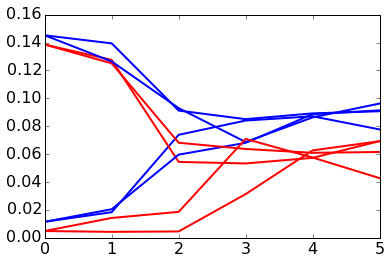

In [125]:
fig, ax = subplots()
ax.set_color_cycle(['b','r'])
for y in y_obs:
    ax.plot(y, lw=2)

In [109]:
nt_transfer = 10
t_trans = 48
n_trans = 6
dil = 1500.

sps = arange(8)
sps_names = [species[i] for i in sps]
n = len(sps)

alpha = pd.DataFrame(diag([1]*n), index=sps_names, columns=sps_names)
afile = '2015-05-21.EXP_34-Trio_competition/LV_alpha.csv'
alpha_previous = pd.read_csv(afile, index_col=0)
alpha.update(alpha_previous)

for i,j in combinations(sps,2):
    s1,s2 = species[i], species[j]
    if alpha.loc[s1,s2] != 0:
        continue
    y_obs = array([
            pair_partial_OD[1].iloc[:,i,j, [i,j]].T.values,
            pair_partial_OD[2].iloc[:,i,j, [i,j]].T.values,
            pair_partial_OD[1].iloc[:,j,i, [i,j]].T.values,
            pair_partial_OD[2].iloc[:,j,i, [i,j]].T.values,
            ])
    r = species_props['r'].iloc[[i,j]].values
    k = species_props['k'].iloc[[i,j]].values
    args = (r,k,t_trans, dil)
    sol = fit_LV(y_obs, args)
    alpha.loc[s1,s2] = sol[0]
    alpha.loc[s2,s1] = sol[1]
    print i,j, sol
    
afile = '2015-05-21.EXP_34-Trio_competition/LV_alpha.csv'
alpha.to_csv(afile)
alpha

Ea        Pa        Pch        Pci         Pf        Pp        Pv  \
Ea   1.000000  1.149186   1.488190   0.989089   2.019716  0.829897  1.303003   
Pa   0.375193  1.000000  23.768432   7.145496  31.018232  0.556414  0.767487   
Pch -0.261445  0.264764   1.000000 -14.025300  -0.357646  0.022244 -0.051771   
Pci -0.291594  0.029002   0.032590   1.000000  -3.571994 -0.016379 -0.032914   
Pf  -0.281530 -0.066902  -0.453253   2.461776   1.000000 -0.145258 -0.173637   
Pp   0.958500  1.192989   5.909095   4.624043   2.085957  1.000000  1.239388   
Pv   0.705677  0.754493   0.833198  -0.734440   0.213437  0.654043  1.000000   
Sm   0.688352  0.642138   0.870148   1.464002   0.995854  0.644511  0.946495   

           Sm  
Ea   1.033617  
Pa   0.492860  
Pch -0.204195  
Pci -0.109943  
Pf  -0.326668  
Pp   1.520278  
Pv   1.165946  
Sm   1.000000

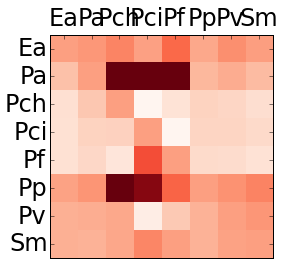

In [110]:
plot_heat_map(alpha, vmin=-1, vmax=5)

In [62]:
from scipy.spatial.distance import squareform

In [63]:
percentile(squareform(alpha, checks=False), [25,50,75])

array([-0.11877162,  0.66195076,  1.25529145])

In [14]:
def predict_LV(sps, dil=1500, t_trans=48, n_trans=6, nt_transfer=10, y0s=None):
    n = len(sps)
    sps_names = [species[i] for i in sps]
    r = species_props['r'].loc[sps_names].values
    k = species_props['k'].loc[sps_names].values

    A = alpha.loc[sps_names, sps_names].values

    sim_args = (r, k, A)
    
    if y0s is None:
        f0 = fracs0.iloc[list(sps)].values
        tmp = .05*ones((n,n)) + diag([1 - .05*n]*n)
        tmp*=f0
        y0s = .15*apply_along_axis(lambda x:x/x.sum(), 1, tmp)
        y0s = array([[0.1, .45,.45],
                     [.45,.1,.45],
                     [.45,.45,.1]])
    y_fit = []
    for y0 in y0s:
        x,tt = batch_simulate(LV_fun, y0/dil, t_trans, n_trans, dil, nt_transfer, args=sim_args)
        tmp = r_[array([y0]), get_transfer_densities(x,nt_transfer)]
        y_fit.append(tmp)
    return array(y_fit), y0

@interact(i=(0,7), j=(0,7), k=(0,8))
def plot_fit(i,j,k):
    if k==8:
        sps = (i,j)
    else:
        sps = (i,j,k)
    sps_names = [species[i] for i in sps]
    y_fit, y0 = predict_LV(sps, n_trans=20)

    fig, ax = subplots(figsize=(10,6))
    cs = [species_colors[k] for k in sps]
    ax.set_color_cycle(cs)
    for y in y_fit:
        lines = ax.plot(y, lw=3)
    ax.legend(lines,sps_names, loc=0)
    # ax.set_yscale('log')
    # print y_fit[-1]/y_fit[-1].sum()

NameError: global name 'alpha' is not defined

In [15]:
from TernPlot import TernPloter, make_interaction_network

y0s = array([[0.9, .05,.05],
             [.05,.9,.05],
             [.05,.05,.9],
             [.1, .45, .45],
             [.45,.1,.45],
             [.45,.45,.1],
             [1./3]*3,
             [2./3, 1./6, 1./6],
             [1./6, 2./3, 1./6],
             [1./6, 1./6, 2./3],
             ])

n = 5
fs = linspace(0,1,3)


delta = 1./48*log(1500)
t_trans = 10

label_vertices = False

i,j,k = 0,1,5
# @interact(i=(0,7), j=(0,7), k=(0,7), t_trans=(1,30,2))
def plot_rio_tern(i,j,k, t_trans):
    sps = (i,j,k)
    sps_names = [species[i] for i in sps]
    
    dil = exp(delta*t_trans)
    print dil
    y_fit, y0 = predict_LV(sps, n_trans=50, y0s=y0s, dil=dil, t_trans=t_trans)
    vals = pd.Panel(y_fit, minor_axis=sps_names)
    print vals

    cs = [species_colors[sp] for sp in sps]
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)

    fig, ax = subplots(figsize=(6,6))

    tp = TernPloter(ax=ax, species_colors=species_colors_d, net=net)
#     tp.plot(vals.iloc[:,0].T, marker='o', lw=1, s=12**2, alpha=.3, c='k', label_vertices=label_vertices)
    tp.plot(vals.iloc[:,-1].T, marker='o', lw=1, s=12**2, alpha=1, c='gray', label_vertices=label_vertices)
#     tp.plot(vals.loc[5,:, sps], marker='o', lw=1, s=12**2, alpha=1, c='k')
    for j in range(vals.shape[0]):
        v = vals.iloc[j]
        v[v<0] = 0
        av = pd.concat([v[:3], v[3::10]])
        tp.plot(av, alpha=1, color='k', plot_func='arrow_path', lw=0, fs=[0.1], label_vertices=label_vertices)
        tp.plot(v, alpha=1, color='k', plot_func='plot', lw=1, fs=[0.1], label_vertices=label_vertices)
        

plot_rio_tern(7,6, 5, 2)

1.35624183245


NameError: global name 'alpha' is not defined

0.5 9.00719925474e+14 0.2


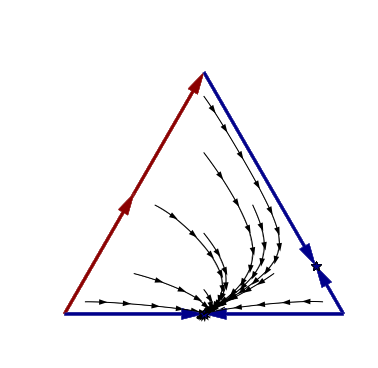

In [44]:

r = ones(3)
k = ones(3)
A = array([
[1, .2, .3],
[.6, 1, .3],
[.1, .5, 1]
])


# A = array([
# [1, .2, .3],
# [.6, 1, .3],
# [.9, .5, 1]
# ])

A = array([
[1, .5, 1.3],
[.5, 1, .3],
[0, .5, 1]
])

A = array([
[1, .1, 1.1],
[.1, 1, .2],
[0.9, .8, 1]
])

sim_args = (r, k, A)


net = nx.Graph()
# net.add_nodes_from(tmp.columns)
f12 = (1-A[0,1])/(2-A[0,1]-A[1,0])
f13 = (1-A[0,2])/(2-A[0,2]-A[2,0])
f23 = 1-(1-A[1,2])/(2-A[1,2]-A[2,1])

print f12, f13, f23

net.add_edge('A', 'C', outcome='A')
net.add_edge('A', 'B', outcome='coexistence', fraction=f23)
net.add_edge('B', 'C', outcome='coexistence', fraction=f12)

y0s = array([[0.9, .05,.05],
             [.05,.9,.05],
             [.05,.05,.9],
             [.1, .45, .45],
             [.45,.1,.45],
             [.45,.45,.1],
             [1./3]*3,
             [2./3, 1./6, 1./6],
             [1./6, 2./3, 1./6],
             [1./6, 1./6, 2./3],
             ])

t = linspace(0,20, 100)





fig, ax = subplots(figsize=(6,6))
colors_d = {'A':species_colors_d['Pp'], 'B':species_colors_d['Pv'], 'C':species_colors_d['Pch']}
colors_d = {'A':species_colors_d['Pp'], 'B':species_colors_d['Pv'], 'C':species_colors_d['Pch']}
tp = TernPloter(ax=ax, species_colors=colors_d, net=net)

label_vertices = False

# tp.plot_net_boundry(labels=['C','B','A'])

for y0 in y0s:
    y = integrate(LV_fun, y0, t, sim_args)
    v = pd.DataFrame(y, columns=['C','B','A'])
    tp.plot(v, alpha=1, color='k', plot_func='plot', lw=1, fs=[0.1], label_vertices=label_vertices)
    
    
    av = pd.concat([v[:3], v[3::10]])
    av = v[::5]
    tp.plot(av, alpha=1, color='k', plot_func='arrow_path', lw=0, fs=[0.1], label_vertices=label_vertices)

0.25 9.00719925474e+14 0.4


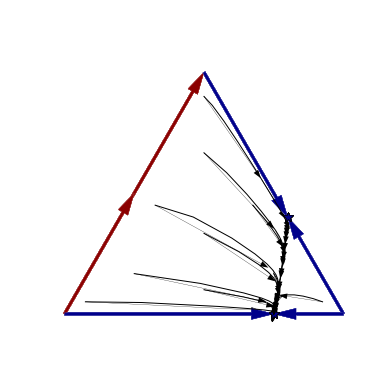

In [48]:

r = ones(3)
k = ones(3)
A = array([
[1, .2, .3],
[.6, 1, .3],
[.1, .5, 1]
])


A = array([
[1, .2, .3],
[.6, 1, .3],
[.9, .5, 1]
])

# A = array([
# [1, .5, 1.3],
# [.5, 1, .3],
# [0, .5, 1]
# ])

A = array([
[1, .7, 1.1],
[.1, 1, .7],
[0.9, .8, 1]
])

sim_args = (r, k, A)


net = nx.Graph()
# net.add_nodes_from(tmp.columns)
f12 = (1-A[0,1])/(2-A[0,1]-A[1,0])
f13 = (1-A[0,2])/(2-A[0,2]-A[2,0])
f23 = 1-(1-A[1,2])/(2-A[1,2]-A[2,1])

print f12, f13, f23

net.add_edge('A', 'C', outcome='A')
net.add_edge('A', 'B', outcome='coexistence', fraction=f23)
net.add_edge('B', 'C', outcome='coexistence', fraction=f12)

y0s = array([[0.9, .05,.05],
             [.05,.9,.05],
             [.05,.05,.9],
             [.1, .45, .45],
             [.45,.1,.45],
             [.45,.45,.1],
             [1./3]*3,
             [2./3, 1./6, 1./6],
             [1./6, 2./3, 1./6],
             [1./6, 1./6, 2./3],
             ])

t = linspace(0,120, 50)





fig, ax = subplots(figsize=(6,6))
colors_d = {'A':species_colors_d['Pp'], 'B':species_colors_d['Pv'], 'C':species_colors_d['Pch']}
colors_d = {'A':species_colors_d['Pp'], 'B':species_colors_d['Pv'], 'C':species_colors_d['Pch']}
tp = TernPloter(ax=ax, species_colors=colors_d, net=net)

label_vertices = False

# tp.plot_net_boundry(labels=['C','B','A'])

for y0 in y0s:
    y = integrate(LV_fun, y0, t, sim_args)
    v = pd.DataFrame(y, columns=['C','B','A'])
    tp.plot(v, alpha=1, color='k', plot_func='plot', lw=1, fs=[0.1], label_vertices=label_vertices)
    
    
    av = pd.concat([v[:3], v[3::10]])
    av = v[::5]
    tp.plot(av, alpha=1, color='k', plot_func='arrow_path', lw=0, fs=[0.1], label_vertices=label_vertices)

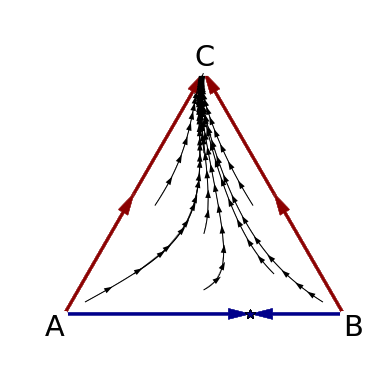

In [20]:

r = ones(3)
k = ones(3)
A = array([
[1, 0.5, 1.1],
[0, 1, 1.3],
[.1, .5, 1]
])


sim_args = (r, k, A)


net = nx.Graph()
# net.add_nodes_from(tmp.columns)
f12 = (1-A[0,1])/(2-A[0,1]-A[1,0])
f13 = (1-A[0,2])/(2-A[0,2]-A[2,0])
f23 = 1-(1-A[1,2])/(2-A[1,2]-A[2,1])
net.add_edge('A', 'B', outcome='coexistence', fraction=f12)
net.add_edge('A', 'C', outcome='C')
net.add_edge('B', 'C', outcome='C')

y0s = array([[0.9, .05,.05],
             [.05,.9,.05],
             [.05,.05,.9],
             [.1, .45, .45],
             [.45,.1,.45],
             [.45,.45,.1],
             [1./3]*3,
             [2./3, 1./6, 1./6],
             [1./6, 2./3, 1./6],
             [1./6, 1./6, 2./3],
             ])

t = linspace(0,20, 100)





fig, ax = subplots(figsize=(6,6))
tp = TernPloter(ax=ax, species_colors={'A':'w','B':'w','C':'w'}, net=net)

label_vertices = True

for y0 in y0s:
    y = integrate(LV_fun, y0, t, sim_args)
    v = pd.DataFrame(y, columns=['A','B','C'])
    tp.plot(v, alpha=1, color='k', plot_func='plot', lw=1, fs=[0.1], label_vertices=label_vertices)
    
    
    av = pd.concat([v[:3], v[3::10]])
    av = v[::5]
    tp.plot(av, alpha=1, color='k', plot_func='arrow_path', lw=0, fs=[0.1], label_vertices=label_vertices)

[ 0.00780069  0.10576662  0.11096933  0.14685604  0.10193583  0.1541929 ]


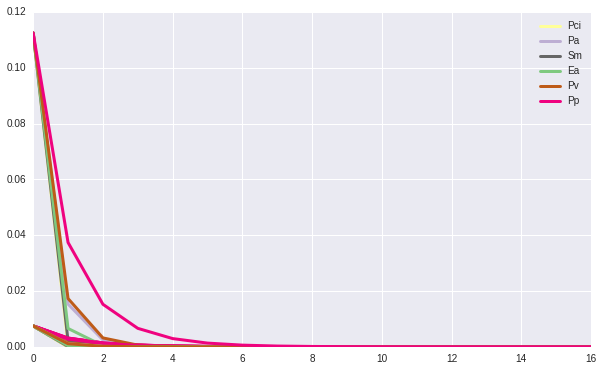

In [93]:
sps = arange(4)
sps = permutation(arange(8))[:6]
# sps = [0,1,2,3,6,7]
n = len(sps)
sps_names = [species[i] for i in sps]
r = species_props['r'].loc[sps_names].values
k = species_props['k'].loc[sps_names].values
print k
A = alpha.loc[sps_names, sps_names].values

sim_args = (r, k, A)

y0s = .05*ones((n,n)) + diag([1 - .05*n]*n)
y0s *= .15

fig, ax = subplots(figsize=(10,6))
cs = [species_colors[s] for s in sps]
ax.set_color_cycle(cs)
for y0 in y0s:
    x,tt = batch_simulate(LV_fun, y0/dil, t_trans, n_trans+10, dil, nt_transfer, args=sim_args)
    y_fit = r_[array([y0]), get_transfer_densities(x,nt_transfer)]
    ax.plot(y_fit, lw=3)
ax.legend(sps_names, loc=0)
# ax.set_yscale('log')
# print y_fit[-1]/y_fit[-1].sum()

In [121]:
## make quantitative predictions
trio_predict = {}
for sps in permutations(range(8), 3):
    y_fit, y0 = predict_LV(sps, n_trans=6)
    trio_predict[sps] = y_fit[:,-1]

In [122]:
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

@interact(s1=(0,7), s2=(0,7), s3=(0,7))
def plot_trio(s1, s2, s3):
    sps = (s1,s2,s3)
    sps_names = [species[s] for s in sps]
    vals = pd.concat([last_fracs_masked.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)
    print vals
    
    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net)
    tp.plot(vals, marker='o', lw=1, s=12**2, alpha=.7, c=cs)
    
    cs = [species_colors[s] for s in sps]
    tmp = trio_predict[sps]
    pred = pd.DataFrame(tmp, columns=sps_names)
#     tp.plot(pred, marker='o', lw=1, s=12**2, alpha=.7, c='k')
    tp.plot(pred, marker='8', s=15**2, facecolors='none', lw=3, edgecolors=cs)

ValueError: The truth value of a Panel is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Relative Yield

In [145]:
trio_ry = pd.Panel(zeros((8,8,8)), items=species, major_axis=species, minor_axis=species)
trio_ry_LV = trio_ry.copy()
trio_ry_low = trio_ry.copy()
trio_ry_high = trio_ry.copy()

for i in range(8):
    for j in range(8):
        for k in range(8):
            try:
                R, R_std = get_RY(i,j,k)
                R_LV, R_std_LV = get_RY(i,j,k, simulated=True)
            except:
                print i,j,k
            R_low, R_high = R_std
            trio_ry.iloc[k,i,j] = R
            trio_ry_LV.iloc[k,i,j] = R_LV
            trio_ry_low.iloc[k,i,j] = R_low
            trio_ry_high.iloc[k,i,j] = R_high
trio_ry

0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 2 1
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 3 1
0 3 2
0 3 4
0 3 5
0 3 6
0 3 7
0 4 1
0 4 2
0 4 3
0 4 5
0 4 6
0 4 7
0 5 1
0 5 2
0 5 3
0 5 4
0 5 6
0 5 7
0 6 1
0 6 2
0 6 3
0 6 4
0 6 5
0 6 7
0 7 1
0 7 2
0 7 3
0 7 4
0 7 5
0 7 6
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 7
1 2 0
1 2 3
1 2 4
1 2 5
1 2 6
1 2 7
1 3 0
1 3 2
1 3 4
1 3 5
1 3 6
1 3 7
1 4 0
1 4 2
1 4 3
1 4 5
1 4 6
1 4 7
1 5 0
1 5 2
1 5 3
1 5 4
1 5 6
1 5 7
1 6 0
1 6 2
1 6 3
1 6 4
1 6 5
1 6 7
1 7 0
1 7 2
1 7 3
1 7 4
1 7 5
1 7 6
2 0 1
2 0 3
2 0 4
2 0 5
2 0 6
2 0 7
2 1 0
2 1 3
2 1 4
2 1 5
2 1 6
2 1 7
2 3 0
2 3 1
2 3 4
2 3 5
2 3 6
2 3 7
2 4 0
2 4 1
2 4 3
2 4 5
2 4 6
2 4 7
2 5 0
2 5 1
2 5 3
2 5 4
2 5 6
2 5 7
2 6 0
2 6 1
2 6 3
2 6 4
2 6 5
2 6 7
2 7 0
2 7 1
2 7 3
2 7 4
2 7 5
2 7 6
3 0 1
3 0 2
3 0 4
3 0 5
3 0 6
3 0 7
3 1 0
3 1 2
3 1 4
3 1 5
3 1 6
3 1 7
3 2 0
3 2 1
3 2 4
3 2 5
3 2 6
3 2 7
3 4 0
3 4 1
3 4 2
3 4 5
3 4 6
3 4 7
3 5 0
3 5 1
3 5 2
3 5 4
3 5 6
3 5 7
3 6 0
3 6 1
3 6 2
3 6 4
3 6 5
3 6 7
3 7 0
3 7 1
3 7 2
3 7 4
3 7 

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 8 (major_axis) x 8 (minor_axis)
Items axis: Ea to Sm
Major_axis axis: Ea to Sm
Minor_axis axis: Ea to Sm

In [103]:
sign_changes = trio_ry.copy()
# sign_changes_LV = sign_changes.copy()
n = 8
for i in range(n):
    for j in range(n):
        pair_vals = (pair_ry.iloc[i,j], pair_ry_low.iloc[i,j], pair_ry_high.iloc[i,j])
#         print pair_vals
        pair_signs = map(sign, pair_vals)
        unique_pair_signs = unique(pair_signs)
#         if i==4 and j==1:  print i,j, pair_sign
        if unique_pair_signs.shape[0] == 1:
            pair_sign = unique_pair_signs[0]
            for k in range(8):
                trio_vals = (trio_ry.iloc[k,i,j], trio_ry_low.iloc[k,i,j], trio_ry_high.iloc[k,i,j])
                trio_signs = map(sign, trio_vals)
                unique_trio_signs = unique(trio_signs)
                if unique_trio_signs.shape[0] == 1:
                    trio_sign = unique_trio_signs[0]
                    if pair_sign != trio_sign and trio_sign:
                        sign_changes.iloc[k,i,j] = 1
                    else:
                        sign_changes.iloc[k,i,j] = 0
                else:
                    sign_changes.iloc[k,i,j] = 0
        else:
            for k in range(8):
                if k not in [i,j]:
                    sign_changes.iloc[k,i,j] = 0
            
        

In [104]:
ss3,ss1,ss2 = where(sign_changes==1)
n_sign_change = len(ss1)
print n_sign_change, 100.*n_sign_change/(56*6) #percent sign changes

26 7.7380952381


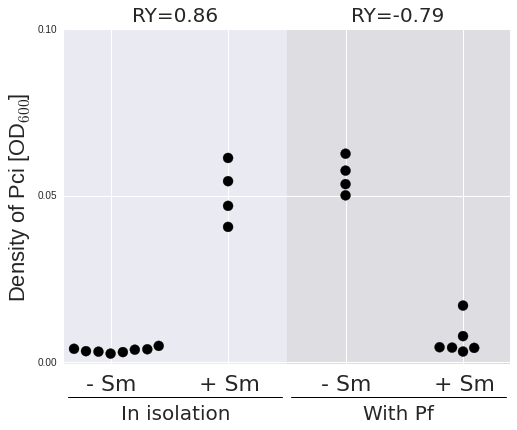

In [105]:
n = 0
@interact(n=(0,len(ss1)-1))
def plot_RY_dif(n):
    s1,s2,s3 = zip(ss1,ss2,ss3)[n]
#     print s1,s2,s3
    wo_iso, w_iso = _get_ODs_for_RY(s1,s2,None)
    wo_com, w_com = _get_ODs_for_RY(s1,s2,s3)

    R_iso = pair_ry.iloc[s1,s2]
    R_com = trio_ry.iloc[s3, s1,s2]
#     print R_iso, R_com

    sp1, sp2, sp3 = species[s1], species[s2], species[s3]
    labels = ['- %s'%sp2, '+ %s'%sp2]*2
    fig, ax = subplots(figsize=(8,6))
    bs, ax = beeswarm([wo_iso, w_iso, wo_com, w_com], 
                      positions=[0,1,2,3], labels=labels,
                      s=10**2, ax=ax)

    xlbls = ax.get_xticklabels()
    setp(xlbls, size=22, y=-.01)#, backgroundcolor='r')

    ax.axvspan(1.5,3.5, alpha=.5, color='lightgray', zorder=-10)

    ax.set_ylabel('Density of %s [OD$_{600}$]'%sp1, size=22)



    ax.text(0.25, 1.01, 'RY=%.2f'%(R_iso),  size=20, 
            transform=ax.transAxes, ha='center', va='bottom')


    ax.text(0.75, 1.01, 'RY=%.2f'%(R_com),  size=20, 
            transform=ax.transAxes, ha='center', va='bottom')

    e = .01
    ax.plot([0+e,.5-e], [-.1]*2, 'k', lw=1, transform=ax.transAxes, clip_on=False)
    ax.text(0.25, -.12, 'In isolation',  size=20, 
            transform=ax.transAxes, ha='center', va='top')

    ax.plot([.5+e,1-e], [-.1]*2, 'k', lw=1, transform=ax.transAxes, clip_on=False)
    ax.text(0.75, -.12, 'With %s'%sp3,  size=20, 
            transform=ax.transAxes, ha='center', va='top')
    
    ax.set_yticks([0,.05,.1])

(-0.75, 13.75)

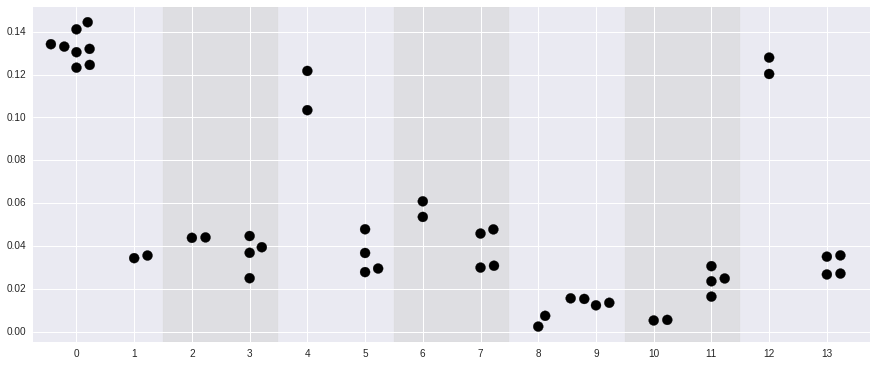

In [106]:
## beeswarm with all additional species
s1,s2 = 0,1
n = 8
others = filter(lambda x: x not in [s1,s2], range(n))
wo = []
w = []
ods = []
for s3 in [None] + others:
    wo, w = _get_ODs_for_RY(s1,s2,s3)
    ods.append(wo)
    ods.append(w)

n = len(ods)
gap = .0
gaps = zeros(n)
gaps[2::2] += gap
pos = arange(n) + gaps.cumsum()

fig, ax = subplots(figsize=(15,6))
bs, ax = beeswarm(ods, positions=pos,
                  s=10**2, ax=ax)

for i in range(n)[1::4]:
    if i+2 >= n:
        break
    x1 = pos[i] + gap/2 + .5
    x2 = pos[i+2] + gap/2 + .5
    ax.axvspan(x1,x2, alpha=.5, color='lightgray', zorder=-10)
    
ax.set_xlim(pos[0]-.75, pos[-1]+.75)

6


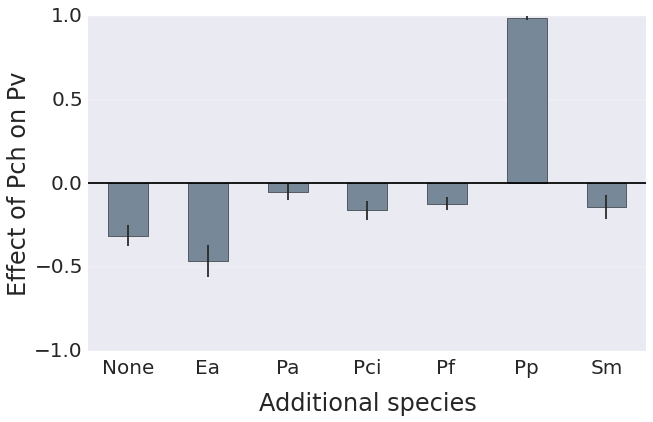

In [107]:
## RY with all additional species
s1,s2 = 6,2
others = filter(lambda x: x not in [s1,s2], range(8))
other_sps = [species[i] for i in others]
n = len(others)
print n
R = pd.Series(zeros(n+1), index=['None'] + other_sps)
R_low = R.copy()
R_high = R.copy()
R['None'] = pair_ry.iloc[s1,s2]
R_low['None'] = pair_ry_low.iloc[s1,s2]
R_high['None'] = pair_ry_high.iloc[s1,s2]

for s3 in others:
    R[species[s3]] = trio_ry.iloc[s3, s1,s2]
    R_low[species[s3]] = trio_ry_low.iloc[s3, s1,s2]
    R_high[species[s3]] = trio_ry_high.iloc[s3, s1,s2]

yerr = [R-R_low, R_high-R]
# yerr = [rand(n+1), rand(n+1)]

fig, ax = subplots(figsize=(10,6))
cmap=cm.RdBu
R.plot(kind='bar', rot=0, ax=ax, fontsize=20, grid=False, color='LightSlateGray', lw=0.5,
       yerr=yerr)


l = 1.
ax.set_ylim(-l, l)
ax.set_yticks([-l, -l/2, 0, l/2, l])

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.tick_params(bottom='off') # don't put tick labels at the top

# xlbl = ax.set_xlabel('Additional species', fontsize=24)
ax.text(.5, -.12, 'Additional species', fontsize=24, 
        ha='center', va='top', transform=ax.transAxes)


# ax.set_ylabel('Relative Yield', fontsize=24)

ax.set_ylabel('Effect of %s on %s'%(species[s2], species[s1]), fontsize=24 )

ax.hlines(0, *ax.get_xlim())
ax.grid(axis='y', ls='-', lw=.3, zorder=-10)

# n = len(ods)
# gap = .0
# gaps = zeros(n)
# gaps[2::2] += gap
# pos = arange(n) + gaps.cumsum()

# fig, ax = subplots(figsize=(15,6))
# bs, ax = beeswarm(ods, positions=pos,
#                   s=10**2, ax=ax)

# for i in range(n)[1::4]:
#     if i+2 >= n:
#         break
#     x1 = pos[i] + gap/2 + .5
#     x2 = pos[i+2] + gap/2 + .5
#     ax.axvspan(x1,x2, alpha=.5, color='lightgray', zorder=-10)
    
# ax.set_xlim(pos[0]-.75, pos[-1]+.75)

0.331191175245


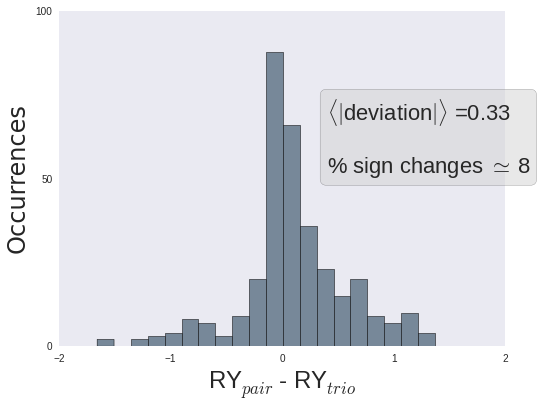

In [108]:
## Deviation between direct and indirect
ry_deviation = trio_ry.subtract(pair_ry)
# ry_deviation = trio_ry.div(pair_ry)
# ry_deviation = (trio_ry.subtract(pair_ry)).div(pair_ry)
# ry_deviation = (trio_ry.subtract(pair_ry)).div(trio_ry.add(pair_ry))
ry_deviation_flat = ry_deviation.to_frame(filter_observations=False).unstack().unstack()
fig, ax = subplots(figsize=(8,6))
ry_deviation_flat.hist(bins=20, ax=ax,  color='LightSlateGray', lw=0.5,)
m = ry_deviation_flat.abs().mean()
print m
ax.set_xlim(-2,2)
ax.set_xlabel('RY$_{pair}$ - RY$_{trio}$', fontsize=24)
ax.set_ylabel('Occurrences', fontsize=24)
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([0, 50, 100])
ax.grid()

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.tick_params(bottom='off') # don't put tick labels at the top

t = r'$\langle |$deviation$ | \rangle$ =%.2f' %m
t+= '\n\n'
t+= '% sign changes $\simeq$ 8' 
ax.text(.4,50 , t,  size=22,
        ha='left', va='bottom', ma='left',
         bbox=dict(facecolor='lightgrey', alpha=0.5, boxstyle='round'))

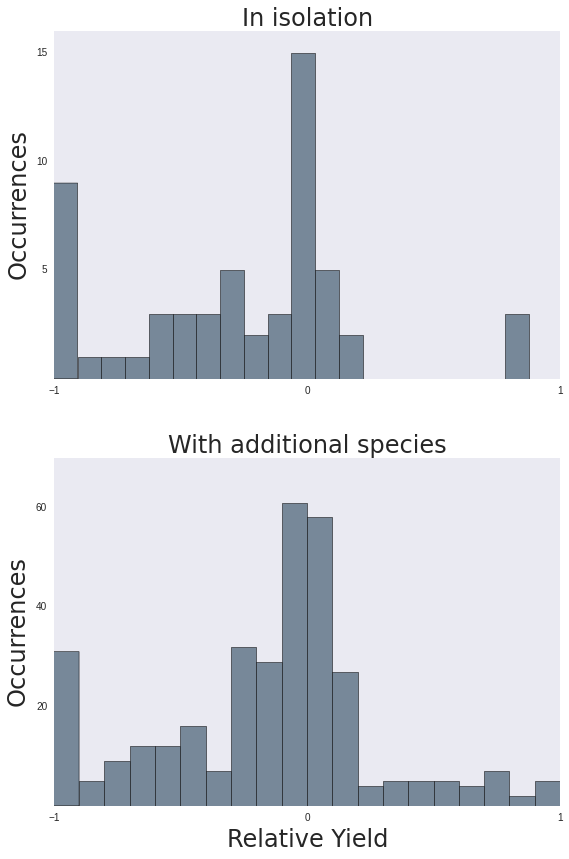

In [109]:
trio_ry_flat = trio_ry.to_frame(filter_observations=False).unstack().unstack()
pair_ry_flat = pair_ry.unstack()


fig, axs = subplots(2,1, figsize=(8,6*2))
# pair_ry_flat.hist(bins=20, ax=ax,  color='LightSlateGray', lw=0.5,)
pair_ry_flat.hist(bins=20, ax=axs[0],  color='LightSlateGray', lw=0.5, normed=False, rwidth=1)
trio_ry_flat.hist(bins=20, ax=axs[1],  color='LightSlateGray', lw=0.5, normed=False, rwidth=1)

# axs[0].text(.7, .5, 'In isolation', ha='left', va='center', transform=axs[0].transAxes, size=24)
axs[0].set_title('In isolation', size=24)
axs[1].set_title('With additional species', size=24)

axs[-1].set_xlabel('Relative Yield', fontsize=24)
# fig.text(-.01, .5, 'Occurrences', rotation=90, fontsize=24, va='center')

axs[0].set_yticks([5, 10, 15])
axs[1].set_yticks([20, 40, 60])

for ax in axs:
    ax.set_xlim(-1,1)
    ax.set_ylabel('Occurrences', fontsize=24)
    ax.set_xticks([-1, 0, 1])
    # ax.set_yticks([0, 50, 100])
    ax.grid()

    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    ax.tick_params(bottom='off') # don't put tick labels at the top

    
tight_layout(h_pad=4)    
    
# t = r'$\langle |$deviation$ | \rangle$ =%.2f' %m
# t+= '\n\n'
# t+= '% sign changes $\simeq$ 8' 
# ax.text(.4,50 , t,  size=22,
#         ha='left', va='bottom', ma='left',
#          bbox=dict(facecolor='lightgrey', alpha=0.5, boxstyle='round'))

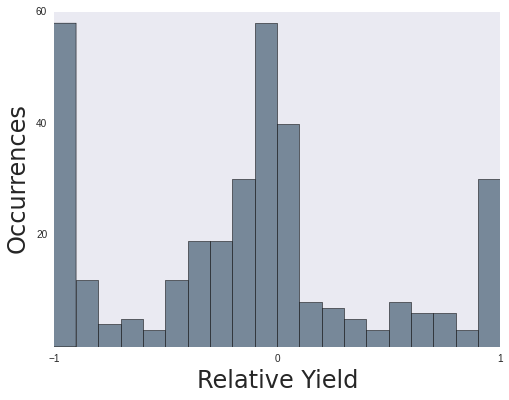

In [110]:
# ry_deviation = trio_ry_LV.subtract(pair_ry)
# ry_deviation_flat = ry_deviation.to_frame(filter_observations=False).unstack().unstack()

trio_ry_LV_flat = trio_ry_LV.to_frame(filter_observations=False).unstack().unstack()

fig, ax = subplots(figsize=(8,6))
trio_ry_LV_flat.hist(bins=20, ax=ax,  color='LightSlateGray', lw=0.5,)
ax.set_xlim(-1,1)
ax.set_xlabel('Relative Yield', fontsize=24)
ax.set_ylabel('Occurrences', fontsize=24)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([20, 40, 60])
# ax.set_yticks([0, 50, 100])
ax.grid()

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.tick_params(bottom='off') # don't put tick labels at the top

In [111]:
trio_ry.median(axis=0)

Ea        Pa       Pch       Pci        Pf        Pp        Pv  \
Ea        NaN -0.153001 -0.057815  0.019102  0.023868 -0.338012 -0.393264   
Pa   0.120440       NaN -0.517411 -0.026438 -0.030205 -0.127354  0.068345   
Pch  0.027279 -0.460269       NaN  0.006062 -0.093827 -0.019437  0.050741   
Pci  0.016084 -0.547175 -0.623386       NaN -0.071015 -0.516992 -0.547428   
Pf   0.296246 -0.391162 -0.582160 -0.050350       NaN -0.069219  0.068179   
Pp  -0.208314 -0.249273 -0.592648 -0.007787 -0.228565       NaN -0.044988   
Pv  -0.193625 -0.215807 -0.130894  0.014683  0.013622 -0.879493       NaN   
Sm  -0.825970 -0.140455 -0.090218  0.022969 -0.109081 -0.815495 -0.739338   

           Sm  
Ea  -0.029930  
Pa   0.038485  
Pch  0.003715  
Pci -0.100797  
Pf   0.277111  
Pp  -0.050976  
Pv  -0.000170  
Sm        NaN

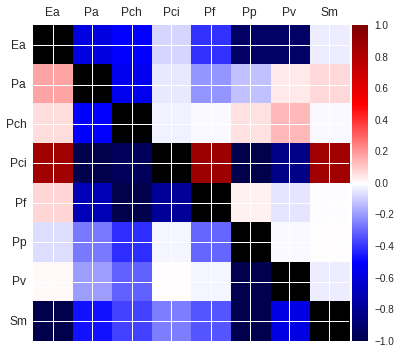

In [112]:
cmap=cm.seismic
cmap.set_bad('k')
vmin = -1
vmax = 1

fig, ax = subplots(figsize=(6,6))

plot_heat_map(pair_ry, ax=ax, vmin=vmin, vmax=vmax, cmap=cm.seismic, show_colorbar=True)

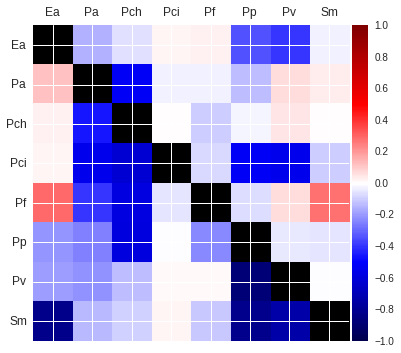

In [113]:
cmap=cm.seismic
cmap.set_bad('k')
vmin = -1
vmax = 1

fig, ax = subplots(figsize=(6,6))

plot_heat_map(trio_ry.median(axis=0), ax=ax, vmin=vmin, vmax=vmax, cmap=cm.seismic, show_colorbar=True)

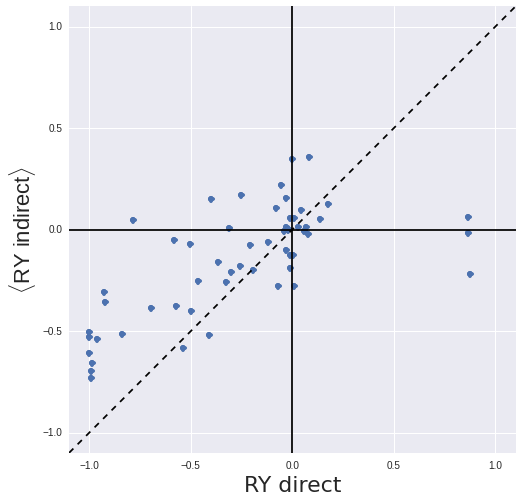

In [114]:
fig, ax = subplots(figsize=(8,8))

x = pair_ry.unstack()
y = trio_ry.mean(axis=0).unstack()
ax.plot(x,y, 'o')
lim = (-1.1, 1.1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.plot(lim,lim, '--k')
ax.plot(lim,[0,0], '-k')
ax.plot([0,0], lim, '-k')

ax.set_xlabel('RY direct', size=22)
ax.set_ylabel(r'$\langle$RY indirect$\rangle$', size=22)

NameError: name 'pair_ry_std' is not defined

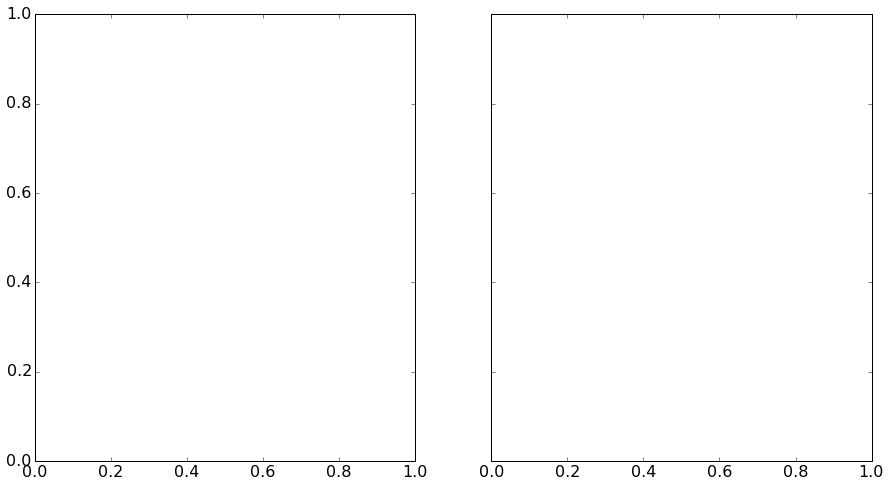

In [87]:
from pysurvey.plotting.Beautification import spine_placement

c = 'DarkGrey'
c2 = 'DarkRed'

fig,(ax,ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,8))
# fig, ax = subplots(1,1, figsize=(8,8))
for s1,s2 in combinations(species,2):
    if pair_ry.loc[s1,s2] > pair_ry.loc[s2,s1]:
        i,j = s1, s2
    else:
        i,j = s2,s1
    x, y = pair_ry.loc[i,j], pair_ry.loc[j,i]
    xerr, yerr = pair_ry_std.loc[i,j], pair_ry_std.loc[j,i]
#     xerr, [[pair_ry_low.loc[i,j]], [pair_ry_high.loc[i,j]]]
#     yerr = [[pair_ry_low.loc[j,i]], [pair_ry_high.loc[j,i]]]
    ax.errorbar(x,y, xerr=xerr, yerr=yerr, c=c, fmt='o', elinewidth=2)
    ax2.errorbar(x,y, xerr=xerr, yerr=yerr, c=c, fmt='o', elinewidth=2)
    

lim1 = (-1.1,1.1)
lim2 = (11.5, 16.5)
limy = (-1.1, .1)
ax.set_xlim(lim1)
ax2.set_xlim(lim2)
ax.set_ylim(limy)

ax.set_xticks([-1,-.5,0,.5,1])
ax2.set_xticks([12,14,16])

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labeltop='off') # don't put tick labels at the top
ax2.yaxis.tick_right()

# ax.text(1.2, 0, 'RY$_{12}$', ha='left', va='center', size=22)
# ax.text(0, 1.2, 'RY$_{21}$', ha='center', va='bottom', size=22)
# spine_placement(ax)
    
ax.set_xlabel( 'RY$_{12}$', size=22)
ax.set_ylabel( 'RY$_{21}$', size=22)
ax.hlines(0, *lim1)
ax2.hlines(0, *lim2)
ax.vlines(0, *limy)

ax.plot(lim1, [-1,-1], 'k--')
ax2.plot(lim2, [-1,-1], 'k--')

# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace=0.1)

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d),(-d,+d), **kwargs) # top-left diagonal
ax.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-left diagonal

kwargs.update(transform=ax2.transAxes) # switch to the bottom axes
ax2.plot((-d,d),(-d,+d), **kwargs) # top-right diagonal
ax2.plot((-d,d),(1-d,1+d), **kwargs) # bottom-right diagonal

In [116]:
last_rel_yield = last_partial_OD.apply(lambda x:x/k_med, axis=3)
last_rel_yield

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 8 (labels) x 8 (items) x 10 (major_axis) x 8 (minor_axis)
Labels axis: 1 to 8
Items axis: A to H
Major_axis axis: 1 to 10
Minor_axis axis: Ea to Sm

In [119]:
def make_interaction_network(outcomes, normalized_fracs=False, directed=False):
    if directed:
        net = nx.DiGraph()
    else:
        net = nx.Graph()
    net.add_nodes_from(outcomes.columns)
    for s1,s2 in combinations(net.nodes(), 2):
        o = outcomes.ix[s1,s2]
        if not isinstance(o, str):
            net.add_edge(s1, s2, outcome='NA',)
        elif o=='COX':
            if not normalized_fracs:
                f1 = masked_avg.ix[s1,s2,s1]
                f2 = masked_avg.ix[s2,s1,s1]
            else:
                f1 = pairs_rel_yield.ix[s1,s2,s1]/(pairs_rel_yield.ix[s1,s2,s1] + pairs_rel_yield.ix[s1,s2,s2])
                f2 = pairs_rel_yield.ix[s2,s1,s1]/(pairs_rel_yield.ix[s2,s1,s1] + pairs_rel_yield.ix[s2,s1,s2])
            frac = pd.Series([f1,f2]).mean()
            net.add_edge(s1, s2, outcome='coexistence', fraction=frac)
        elif o=='BIS': 
            net.add_edge(s1, s2, outcome='bistability',)
        else:
            winner = o
            loser  = s1 if s1!=o else s2
            net.add_edge(loser, winner, outcome=o,)
    return net

In [120]:
species_colors_d = {species[i]:species_colors[i] for i in range(8) }

@interact(s1=(0,7), s2=(0,7), s3=(0,7))
def plot_trio(s1, s2, s3):
    sps = (s1,s2,s3)
    sps_names = [species[s] for s in sps]
    vals = pd.concat([last_fracs_masked.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    net1 = make_interaction_network(tmp)
    net2 = make_interaction_network(tmp, True)
    print vals
    
    nr, nc = 1,2
    fig, axs = subplots(nr,nc,figsize=(nc*w,nr*w))
    cs = repeat([species_colors[s] for s in sps], 2)
    ax = axs[0]
    tp = TernPloter(species_colors=species_colors_d, net=net1, ax=ax)
    tp.plot(vals, marker='o', lw=1, s=12**2, alpha=.7, c=cs)
    
    ax = axs[1]
    tp = TernPloter(species_colors=species_colors_d, net=net2, ax=ax)
    tp.plot(vals, marker='o', lw=1, s=12**2, alpha=.7, c=cs)

NameError: global name 'pairs_rel_yield' is not defined

In [199]:
pairs_rel_yield = pair_ry + 1
def get_alphas(s1,s2, ry):
#     x1, x2 = pd.concat((pairs_rel_yield.iloc[s1,s2, [s1,s2]], pairs_rel_yield.iloc[s2,s1, [s1,s2]]), axis=1).mean(axis=1)
    x1, x2 = ry.iloc[s1,s2], ry.iloc[s2,s1]
    a12 = (1-x1)/x2
    a21 = (1-x2)/x1
    return array([a12,a21])

def get_SS_fracs(a, k):
    x_ss = (1-a)/(1-a.prod())
    t= x_ss*k
    f_ss = t/t.sum()
    return f_ss

s1, s2 = 3,4
k = k_med[[s1,s2]]
a = get_alphas(s1,s2)
print a
print get_SS_fracs(a,k)
pair_fracs_masked[2].iloc[-1, s2, s1, [s1,s2]]

TypeError: get_alphas() takes exactly 3 arguments (2 given)

('Ea', 'Pa', 'Pp')


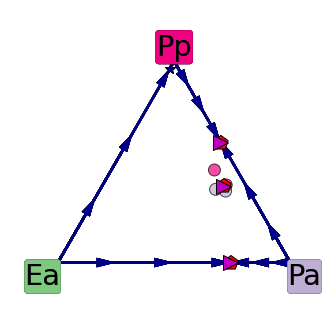

In [343]:
sps_names = sorted_layouts[1][7]
n = len(sorted_layouts[1])

def make_A(sps, ry):
    A = diag(ones(3))
    for i in range(2):
        s1 = sps[i]
        for j in range(i+1,3):
            s2 = sps[j]
            a12, a21 = get_alphas(s1,s2, ry)
            A[i,j] = a12
            A[j,i] = a21
    return A

def get_ss(A, k=None):
    x_ss = linalg.solve(A, ones(3))
    ind = where(x_ss>0)[0]
    A = A[ind][:,ind]
    n = A.shape[0]
    if n<3:
        x_ss = linalg.solve(A, ones(2))
    if k is not None:
        t = x_ss*k[ind]
        f_ss = zeros(3)
        f_ss[ind] = t/t.sum()
        return f_ss
    else:
        return x_ss


@interact(i=(0,n-1))
def plot(i):
    sps_names = sorted_layouts[1][i]
    print sps_names
    sps = array([species.index(s) for s in sps_names])
    
    vals = pd.concat([last_fracs_masked.iloc[s[0],s[1],s[2]] for s in permutations(sps, r=3)], axis=1).T.loc[:, sps_names]
    tmp = outcomes.reindex(sps_names,sps_names)
    net = make_interaction_network(tmp, masked_avg)

    fig, ax = subplots(figsize=(5,5))
    cs = repeat([species_colors[s] for s in sps], 2)
    tp = TernPloter(species_colors=species_colors_d, net=net, ax=ax)
    tp.plot(vals, marker='o', lw=1, s=12**2, alpha=.7, c=cs)
    
    for ry in (pair_ry, pair_ry_low, pair_ry_high):
#     for ry in (pair_ry,):
        A = make_A(sps, ry + 1)
        A[A>1] = 1-1e-2
        f_ss = get_ss(A, k_med[sps])
        predicted = pd.DataFrame([f_ss], columns=sps_names)
        tp.plot(predicted, marker='p', lw=1, s=15**2, c='r')
        
        x_ss = integrate(LV_fun, [.5,.5,.5], arange(1000), (2*ones(3), ones(3), A))[-1,:] *  k_med[sps]
        f_ss = x_ss/x_ss.sum()
        predicted = pd.DataFrame([f_ss], columns=sps_names)
        tp.plot(predicted, marker='>', lw=1, s=15**2, c='m')

In [ ]:
from FlowCytometryTools import 